genenral notes or findings:
- All series were found to be I(1), i.e. stationary after first differencing.

# Setup

In [228]:
# relevent libraries

# install.packages("quantmod")
# install.packages("fredr")
# install.packages("ggfortify")
# install.packages('urca')
# install.packages("tseries")
# install.packages("forecast")
# install.packages("dynlm")
# install.packages("stargazer")
# install.packages("pracma")
# install.packages("dLagM")
# install.packages("gets")
# install.packages("car")
# install.packages("lmtest")
# install.packages("vars")
# install.packages("tseries")
# install.packages("strucchange")
# install.packages("graphics")
# install.packages("grDevices")
# install.packages("tsDyn")
options(warn=-1)

In [274]:
library(xts)
library(zoo)
library(ggplot2)
library(ggfortify)
library(urca)
library(forecast)
library(dynlm)

In [230]:
data <- read.csv('dataset.csv')

head(data)

tail(data)

Date   Europe.Brent.Spot.Price.FOB..Dollars.per.Barrel.
1 Jan-00 25.51                                           
2 Feb-00 27.78                                           
3 Mar-00 27.49                                           
4 Apr-00 22.76                                           
5 May-00 27.74                                           
6 Jun-00 29.80                                           
  OECD.petroleum.and.other.liquids.stocks..millions.barrels.
1 3768.49                                                   
2 3744.30                                                   
3 3731.37                                                   
4 3770.59                                                   
5 3789.75                                                   
6 3820.62                                                   
  OPEC.petroleum.and.other.liquids.production..thousand.barrels.per.day.
1 26941.60                                                              
2 27750.36                                                              
3 27681.75                                                              
4 28524.33                                                              
5 29072.75                                                              
6 28638.75                                                              
  Baltic.Dry.Index..BADI.
1 1319                   
2 1531                   
3 1660                   
4 1628                   
5 1566                   
6 1616

Date   Europe.Brent.Spot.Price.FOB..Dollars.per.Barrel.
302 Feb-25 75.44                                           
303 Mar-25 72.73                                           
304 Apr-25 68.13                                           
305 May-25 64.45                                           
306 Jun-25 71.44                                           
307 Jul-25 71.04                                           
    OECD.petroleum.and.other.liquids.stocks..millions.barrels.
302 3960.87                                                   
303 3973.23                                                   
304 3974.88                                                   
305 4017.69                                                   
306 4007.86                                                   
307 4034.37                                                   
    OPEC.petroleum.and.other.liquids.production..thousand.barrels.per.day.
302 32866.91                                                              
303 33123.56                                                              
304 32955.89                                                              
305 33427.88                                                              
306 33855.89                                                              
307 33622.66                                                              
    Baltic.Dry.Index..BADI.
302 1229                   
303 1598                   
304 1386                   
305 1418                   
306 1489                   
307 2003

In [231]:
# convert "Jan-90" to yearmon (monthly format)
d1 <- as.yearmon(data[,1], format = "%b-%y")

# convert to xts
Brent <- xts(data[,2], order.by = d1) # date-indexed series (Crude Oil Prices: Brent - Europe)

# we have no missing values on Brent, but we omit just in case
Brent = na.omit(Brent)              

In [232]:
# we repeat the same process for the other series
Oil_Stocks <- xts(data[,3], order.by = d1)
Oil_Stocks = na.omit(Oil_Stocks)

OPEC <- xts(data[,4], order.by = d1)
OPEC = na.omit(OPEC)

BDI <- xts(data[,5], order.by = d1)
BDI = na.omit(BDI)

In [233]:
head(Brent)
tail(Brent)

          [,1]
Jan 2000 25.51
Feb 2000 27.78
Mar 2000 27.49
Apr 2000 22.76
May 2000 27.74
Jun 2000 29.80

          [,1]
Feb 2025 75.44
Mar 2025 72.73
Apr 2025 68.13
May 2025 64.45
Jun 2025 71.44
Jul 2025 71.04

Data goes from Jan 2000 to Dec 2024

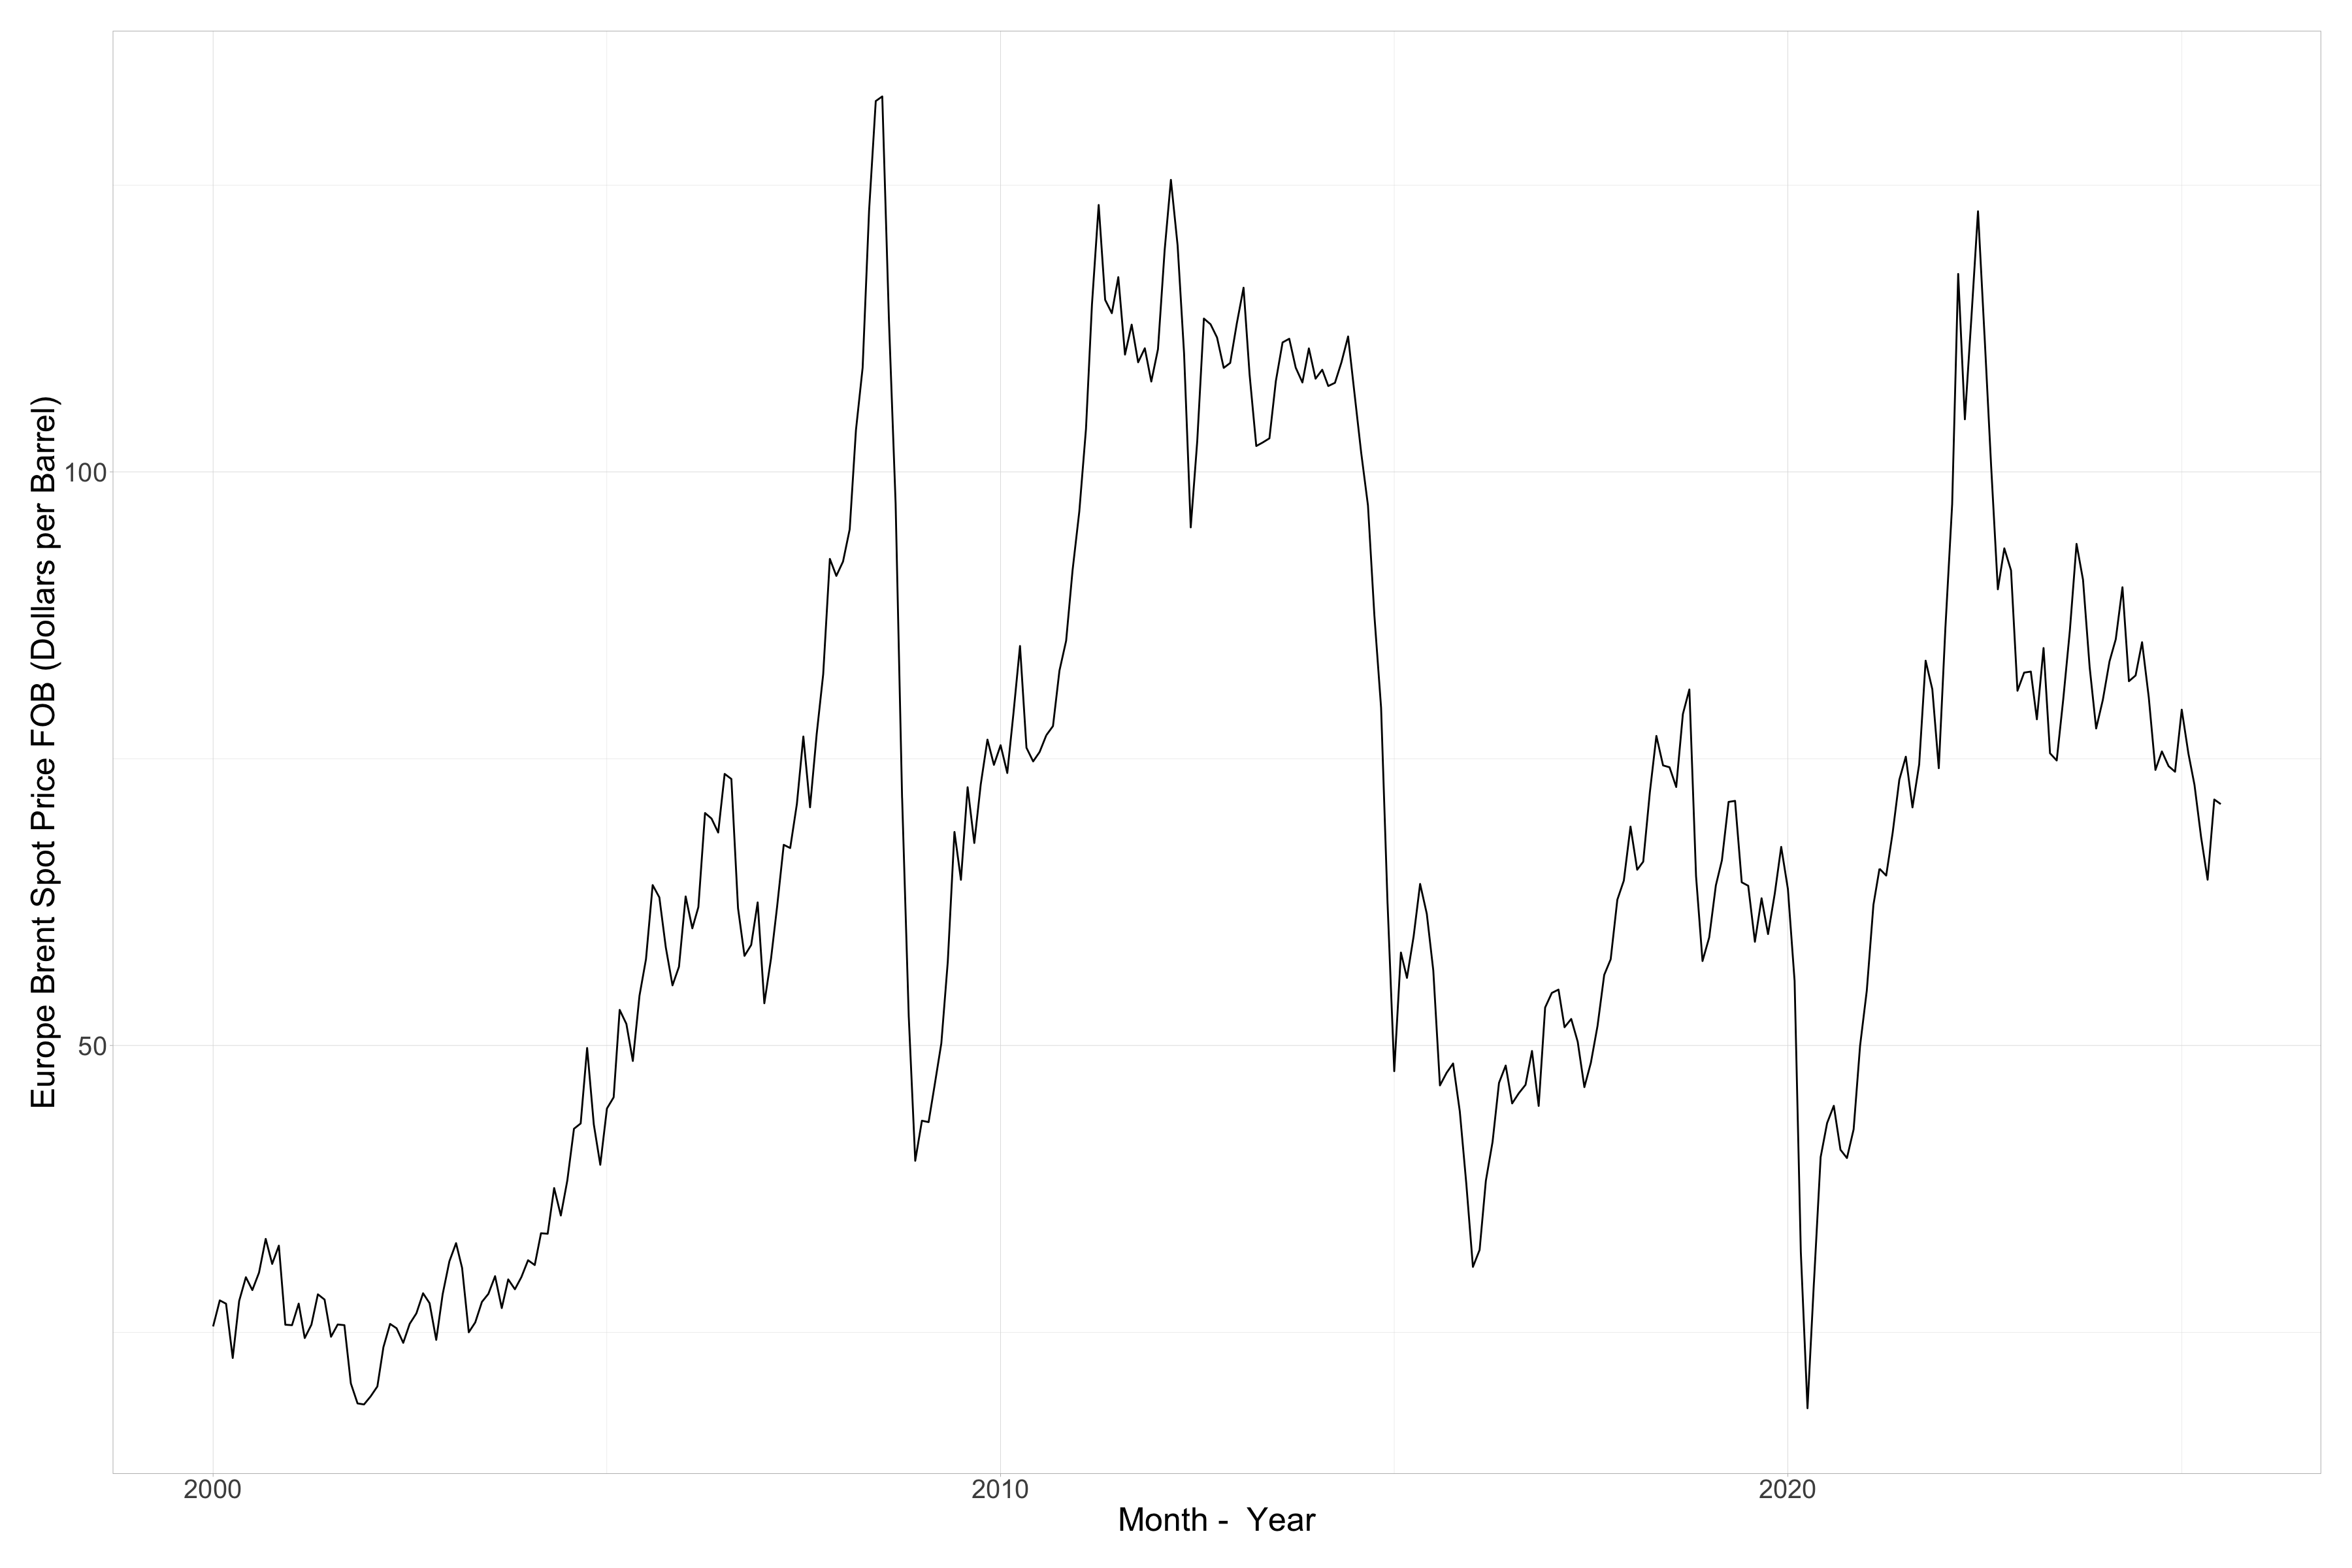

In [234]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(Brent, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Europe Brent Spot Price FOB (Dollars per Barrel)")
fig

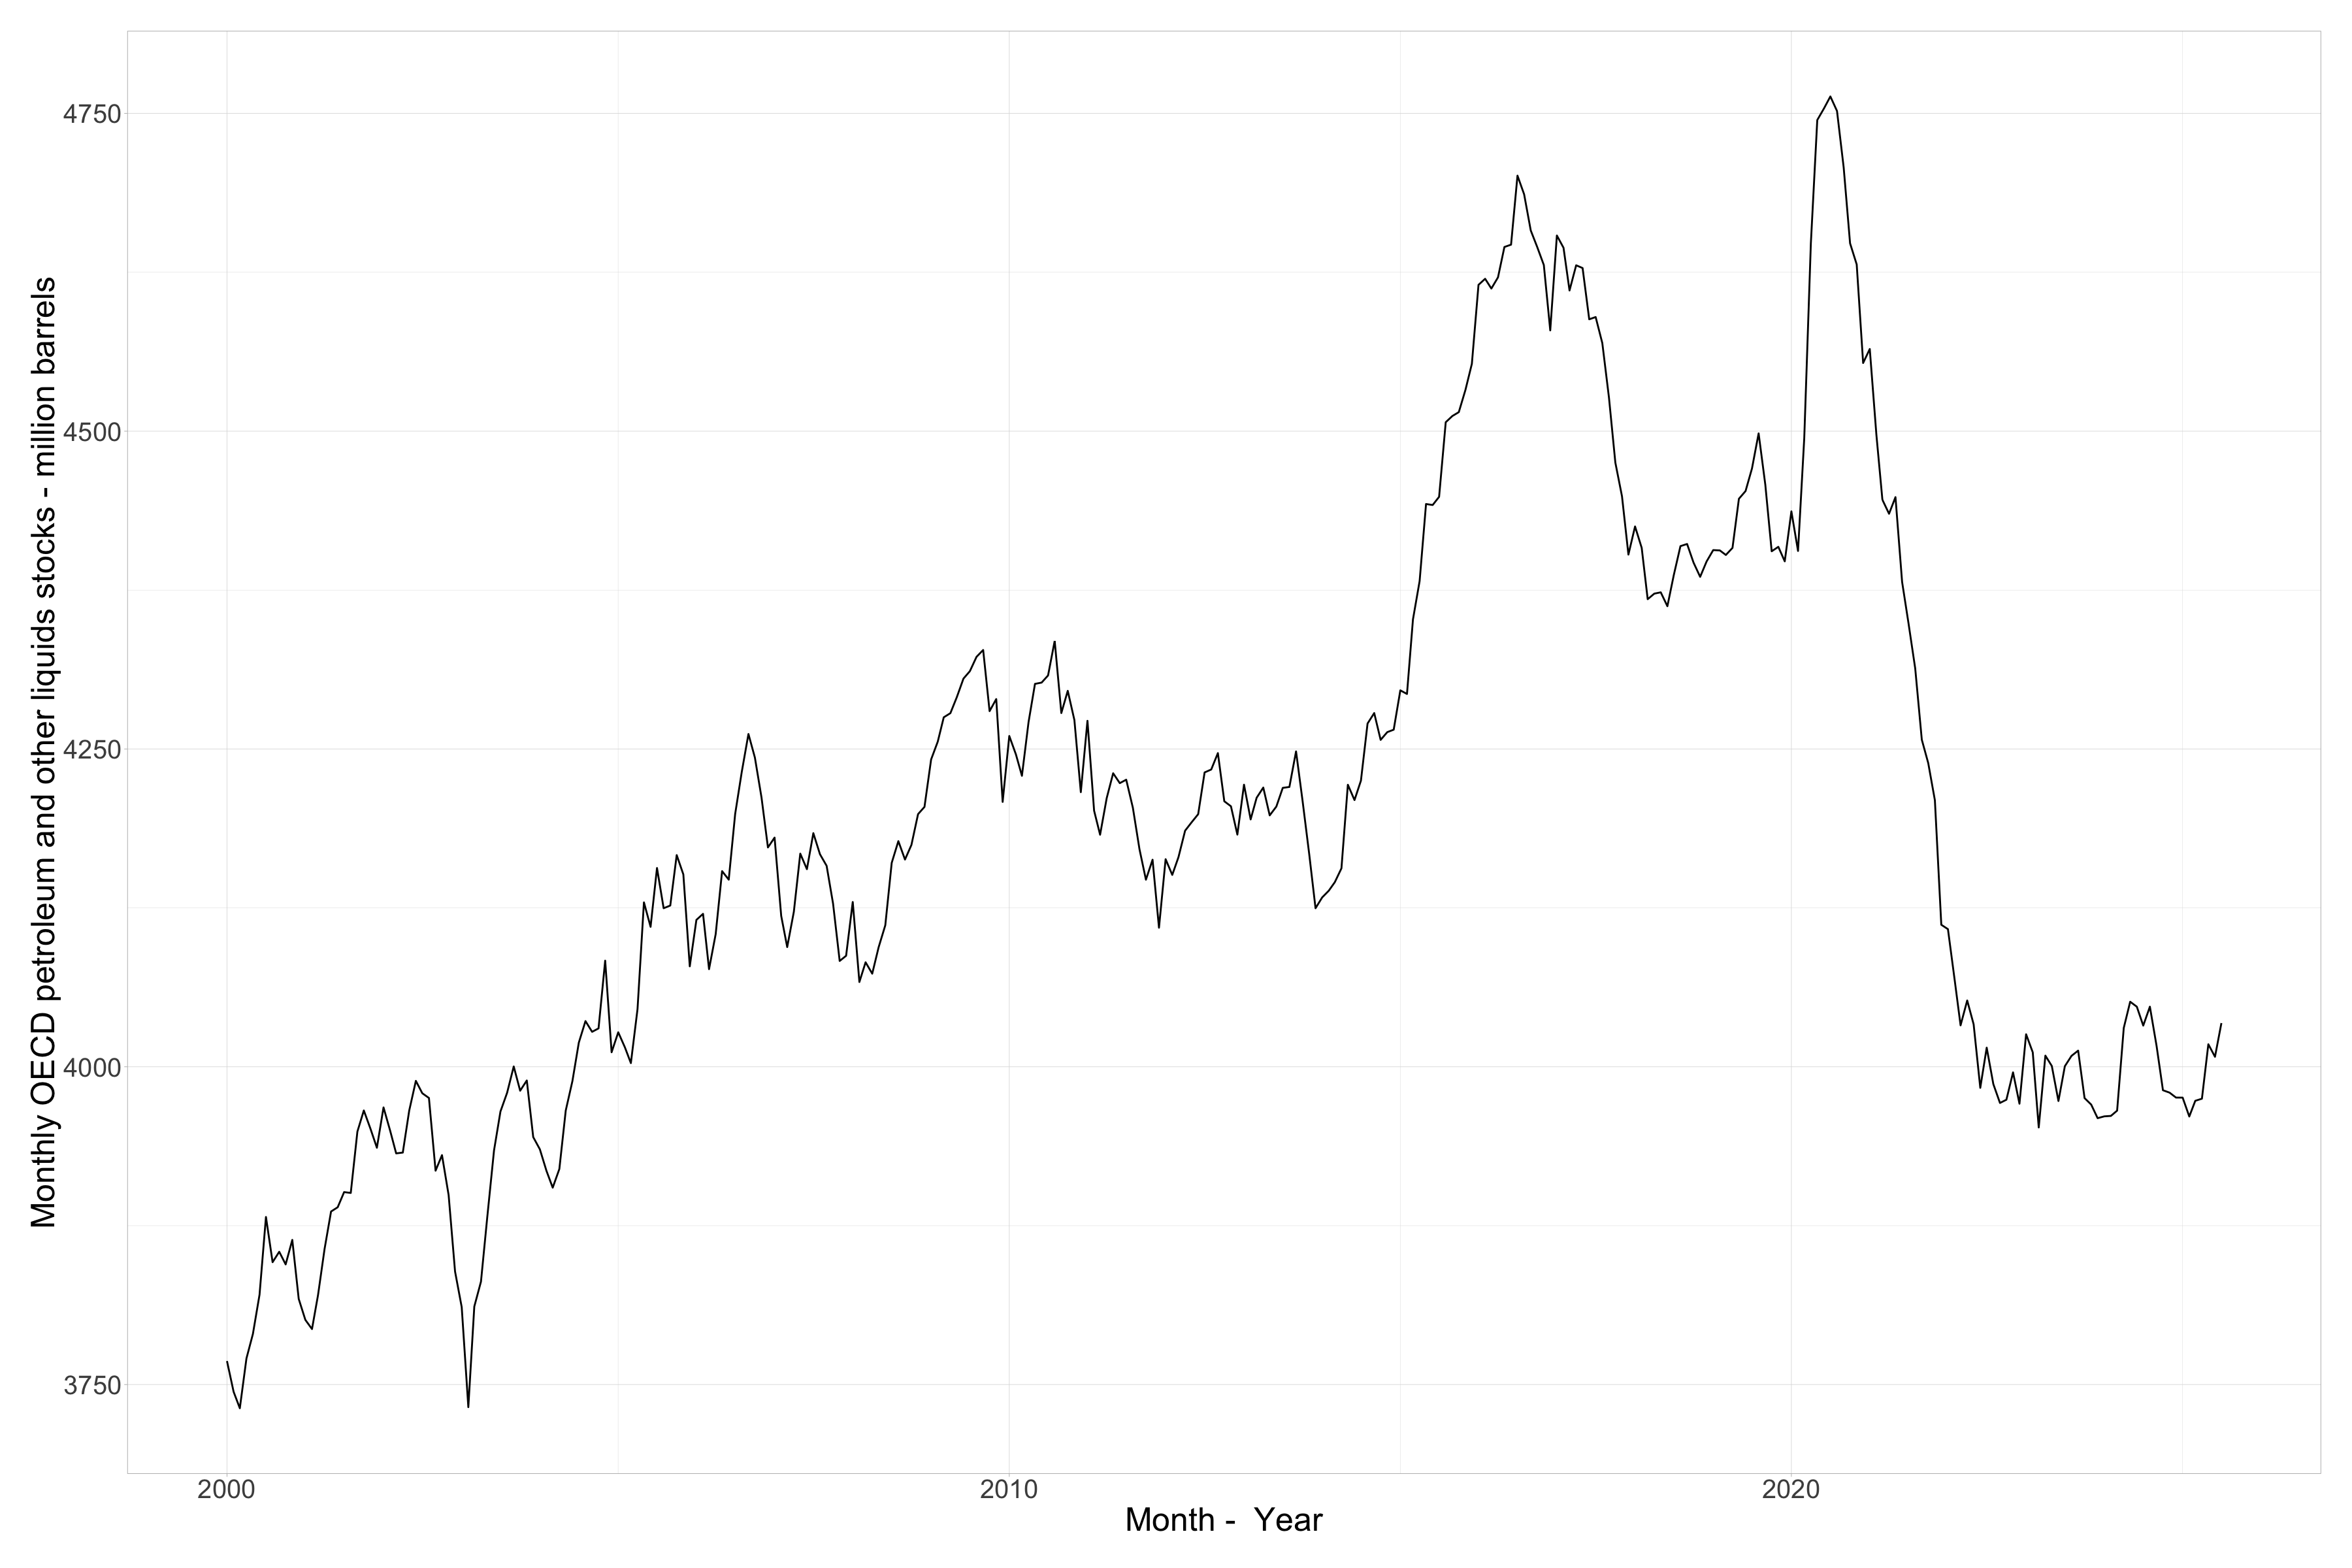

In [235]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(Oil_Stocks, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Monthly OECD petroleum and other liquids stocks - million barrels")
fig

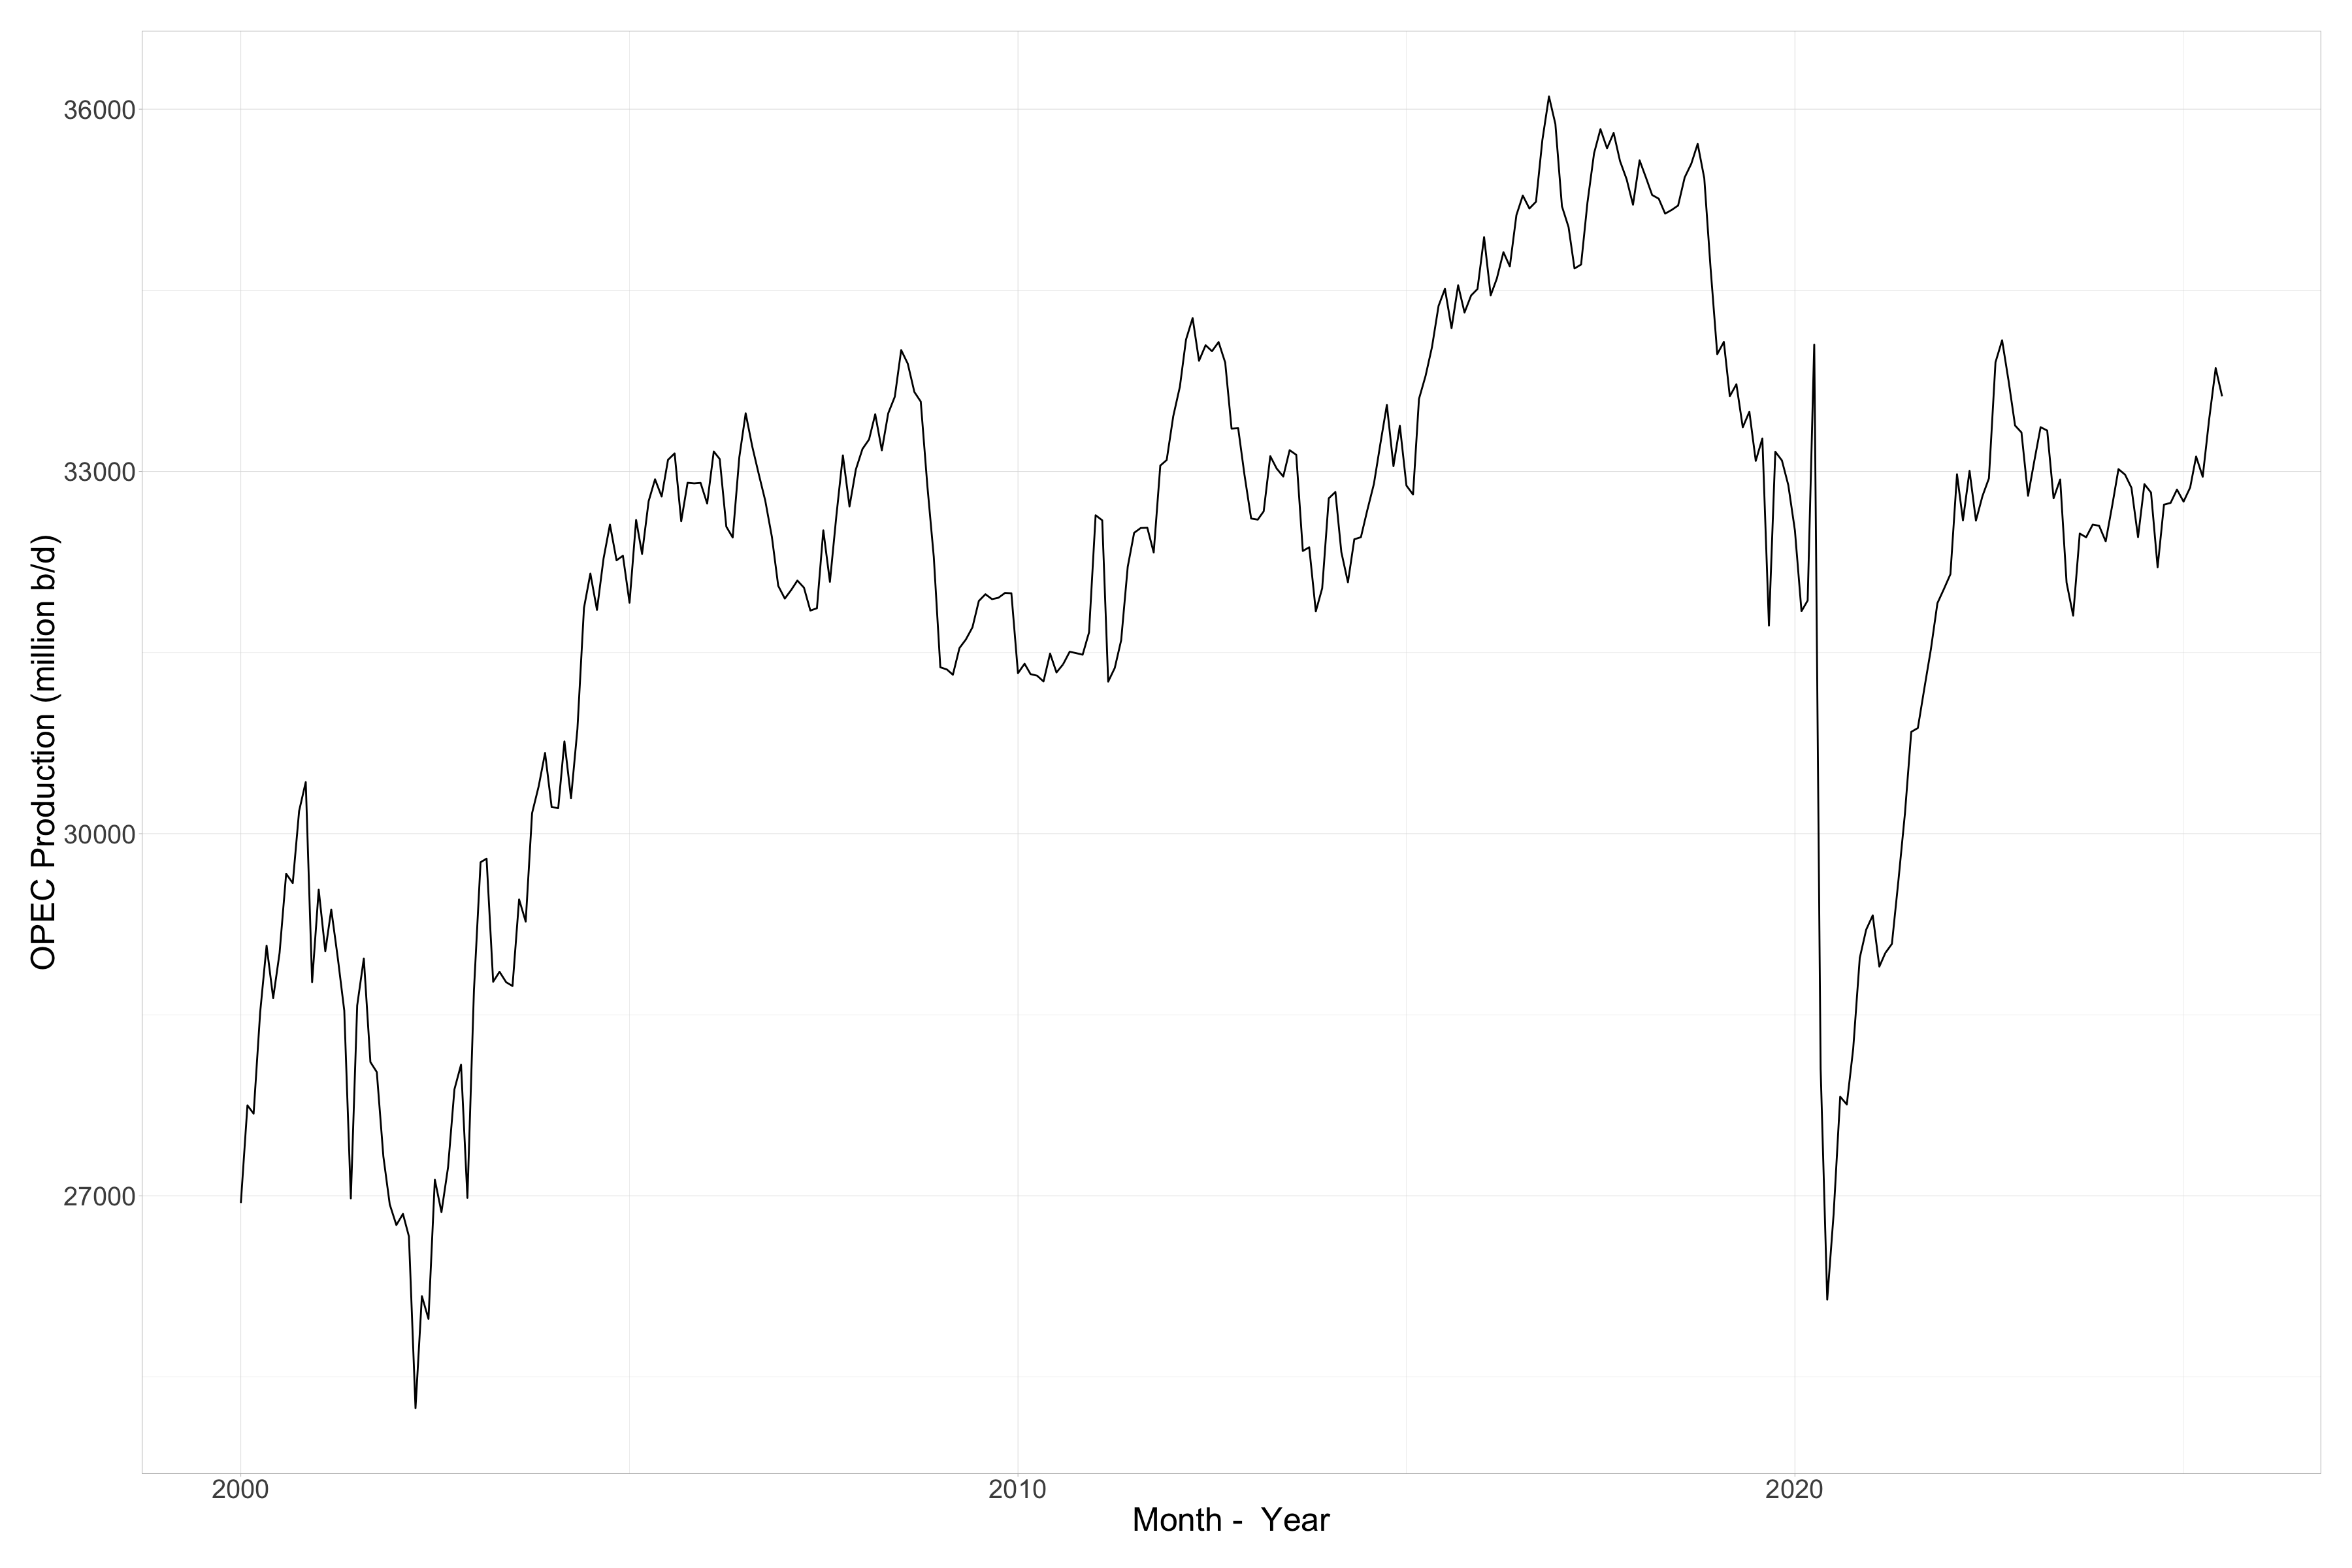

In [236]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(OPEC, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "OPEC Production (million b/d)")
fig

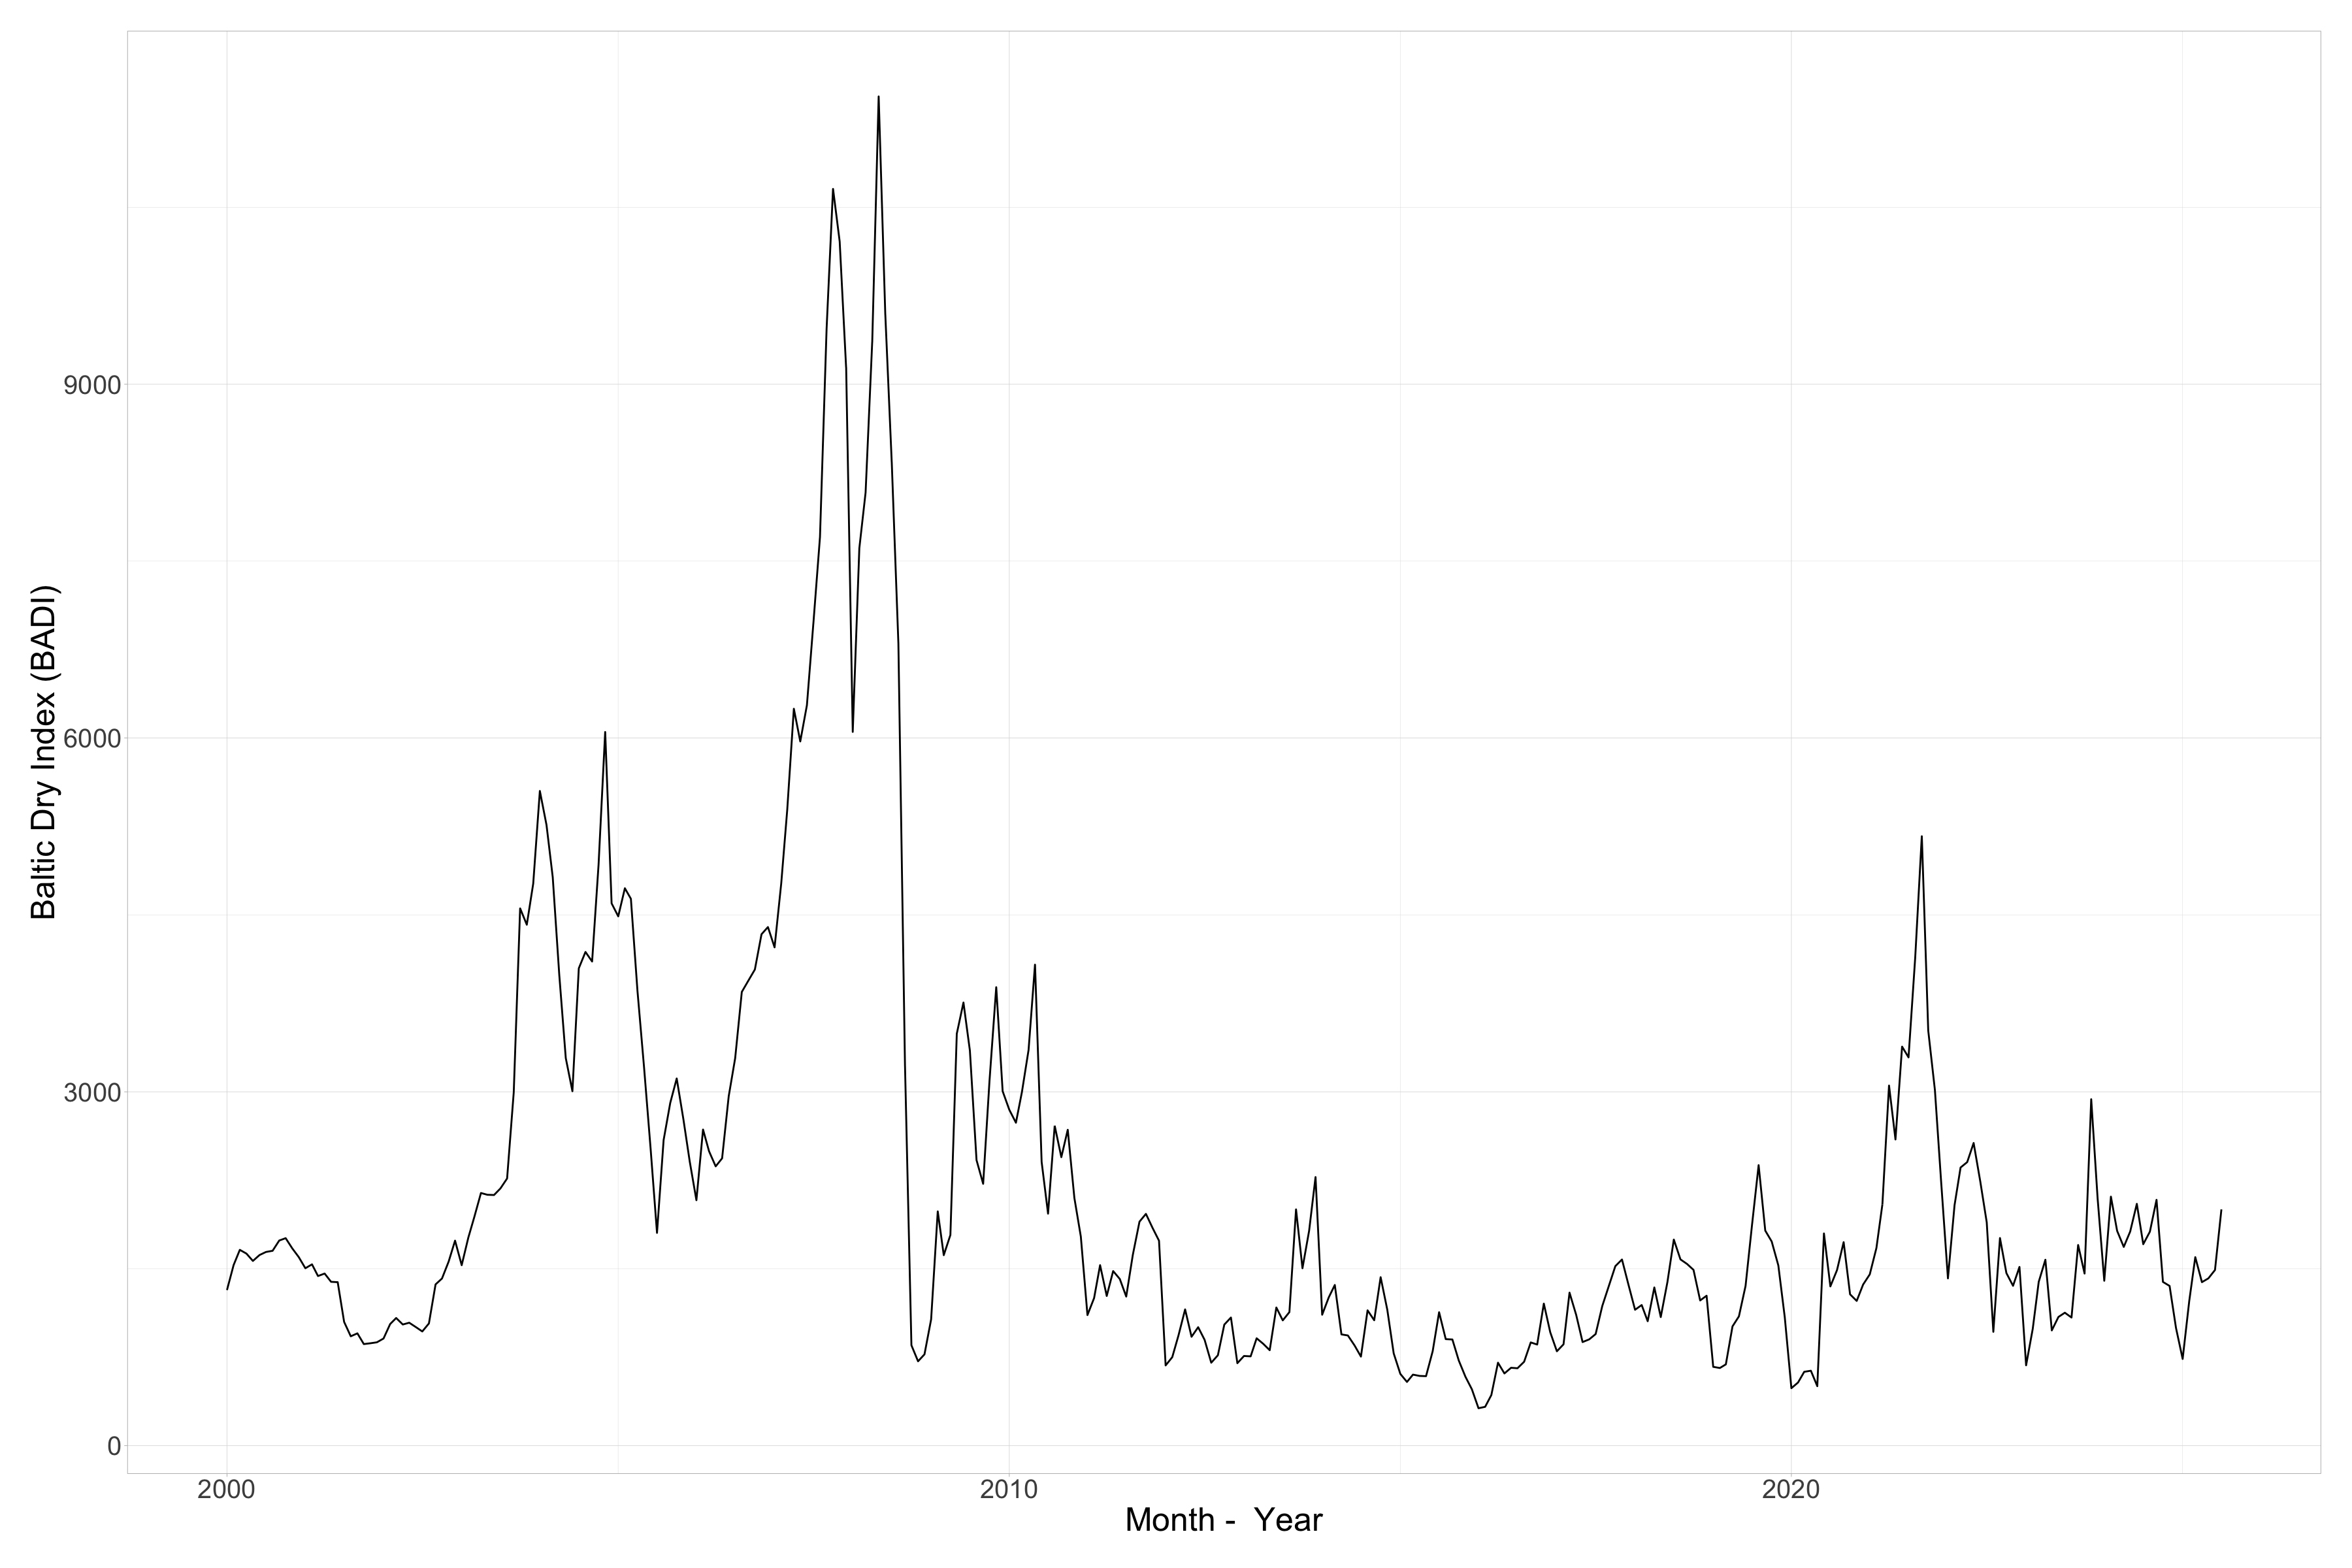

In [237]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(BDI, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Baltic Dry Index (BADI)")
fig

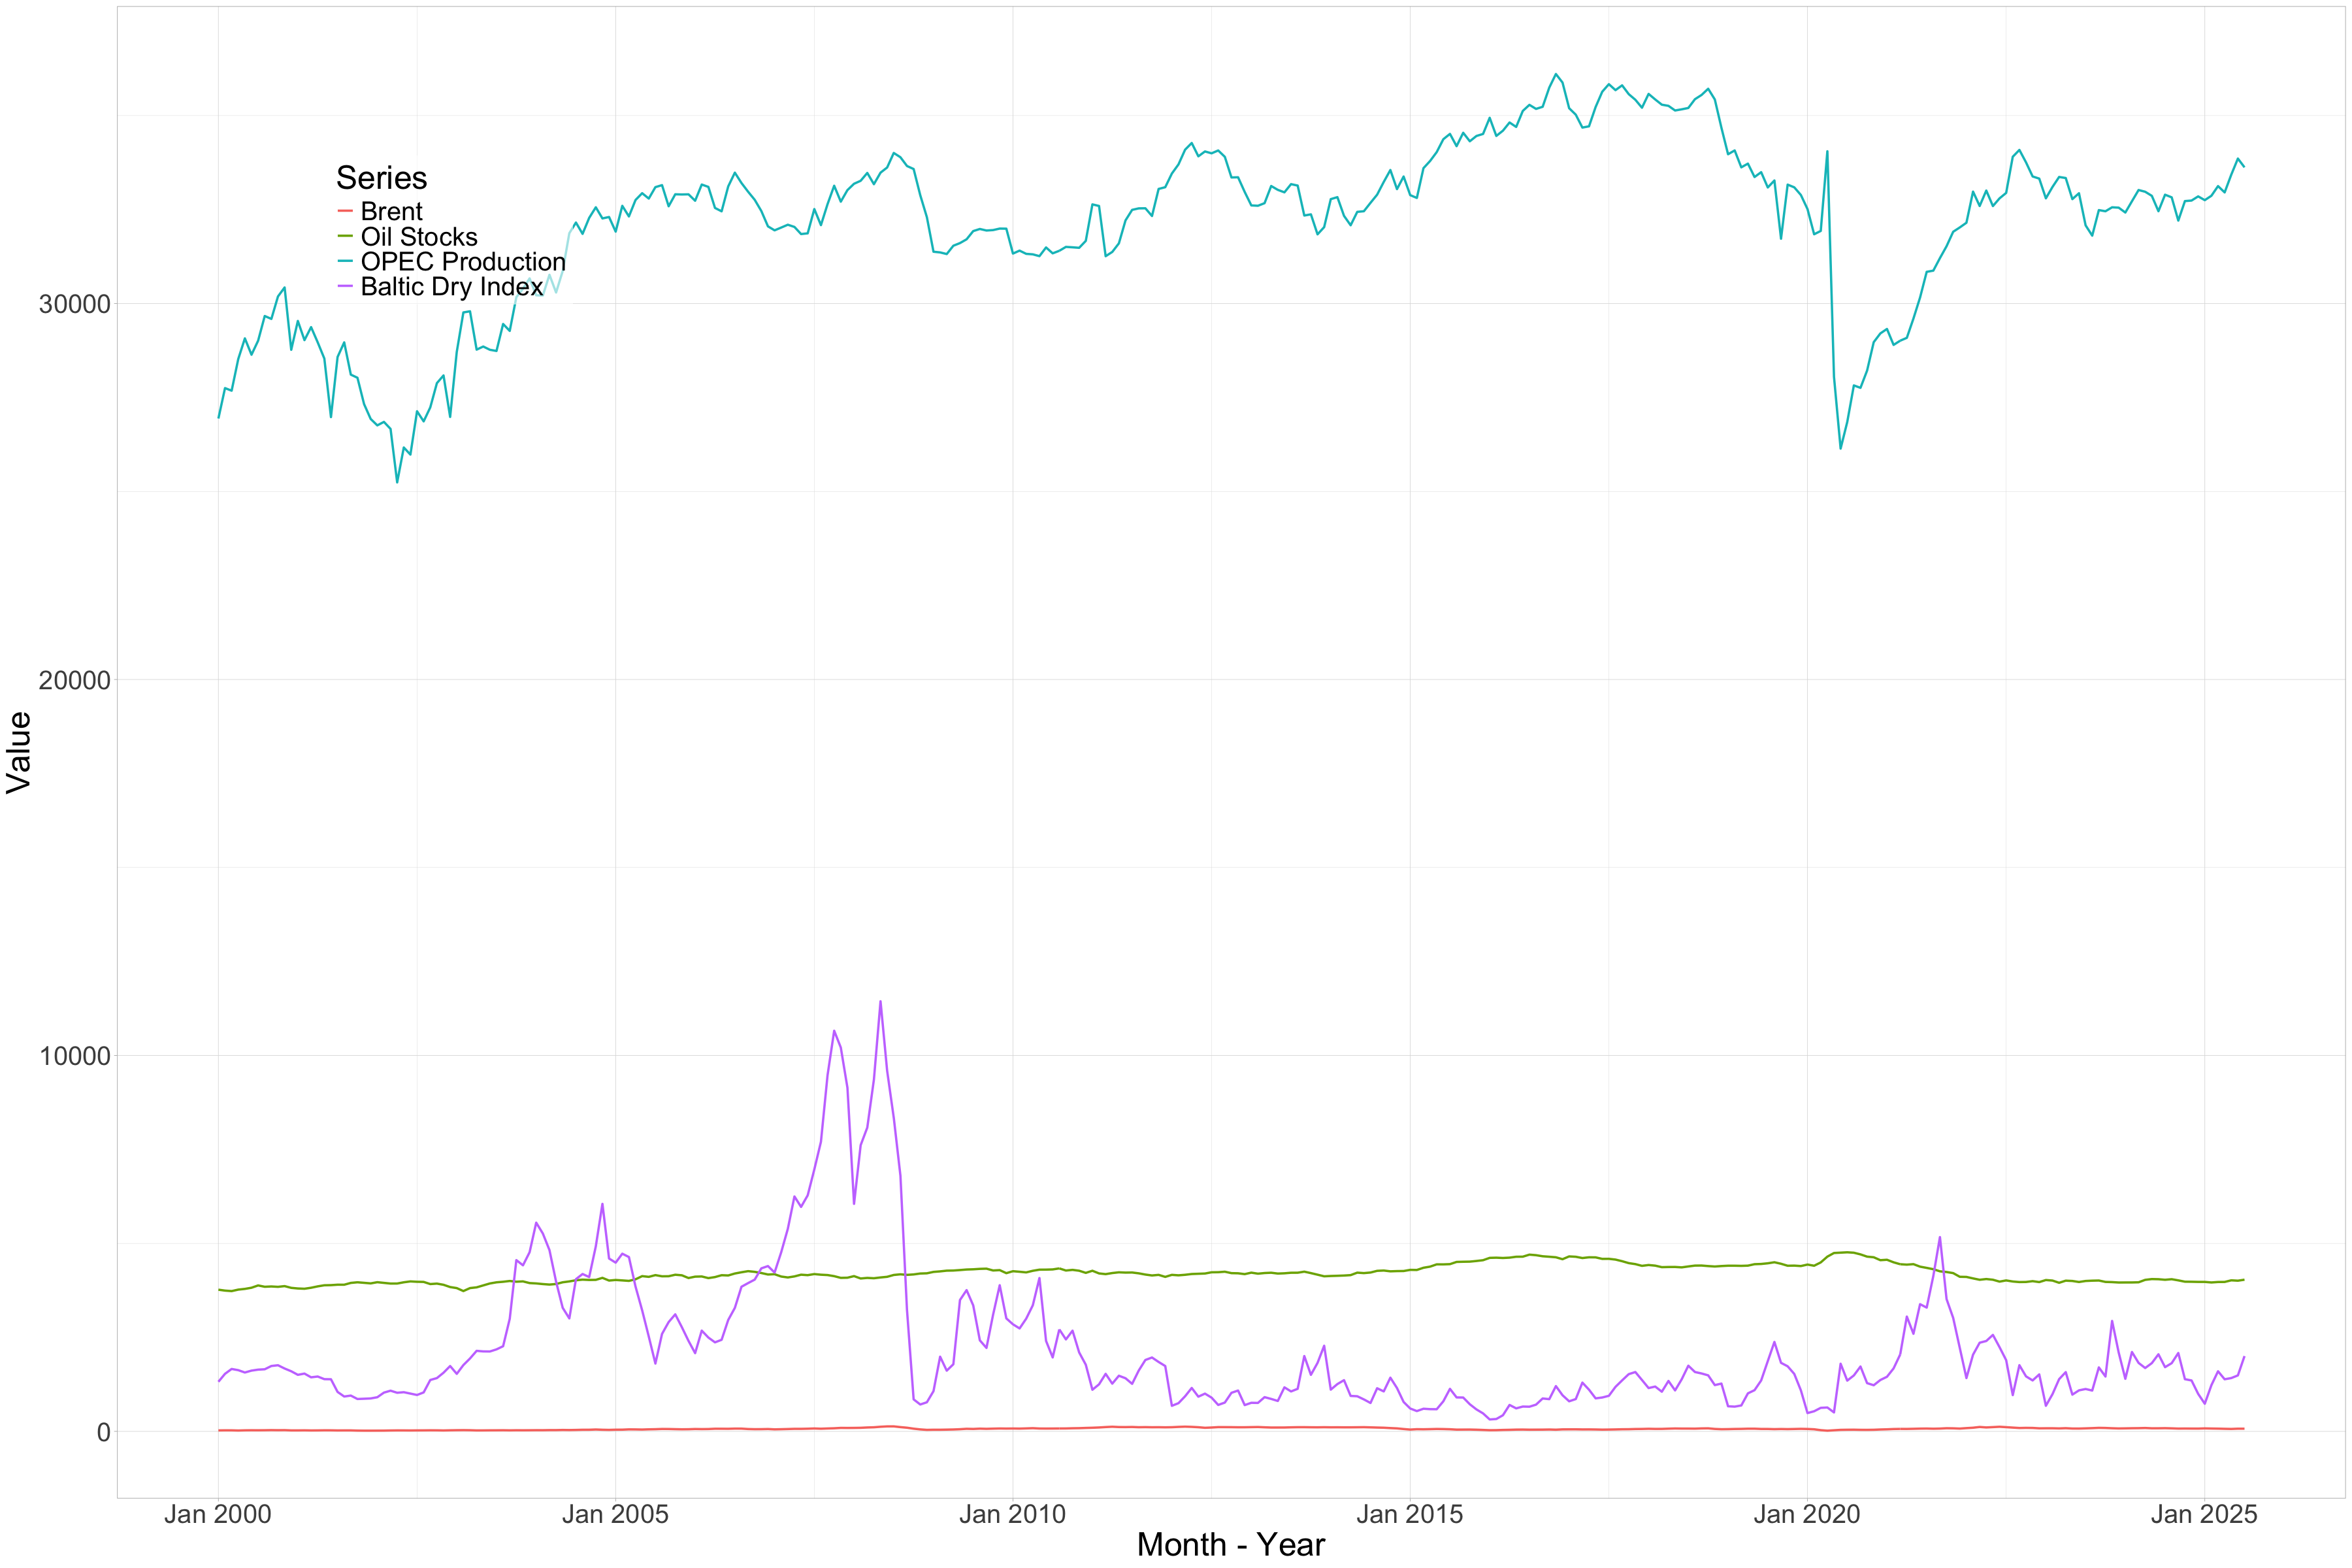

In [238]:
all_series <- merge(Brent, Oil_Stocks, OPEC, BDI)
colnames(all_series) <- c("Brent", "Oil Stocks", "OPEC Production", "Baltic Dry Index")

df_long <- fortify(all_series, melt = TRUE)
colnames(df_long) <- c("Date", "Series", "Value")

options(repr.plot.width = 30, repr.plot.height = 20)

fig <- ggplot(df_long, aes(x = Date, y = Value, colour = Series)) +
  geom_line(size = 1) +
  theme_light() +
  theme(
    # aspect.ratio = 1,
    plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm"),
    text = element_text(size = 30),
    legend.position = c(0.15, 0.85),
    legend.background = element_rect(fill = alpha("white", 0.6)),
    legend.key = element_rect(fill = NA)
  ) +
  labs(
    x = "Month - Year",
    y = "Value",
    colour = "Series"
  )

fig


# ADF Testing of Brent Oil Prices

In [239]:
summary(ur.df(Brent, type='trend', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.8510  -3.9287   0.5318   3.7783  17.5111 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.9474222  1.1602365   2.540  0.01163 *  
z.lag.1     -0.0420926  0.0140151  -3.003  0.00292 ** 
tt           0.0009449  0.0046182   0.205  0.83803    
z.diff.lag   0.3294378  0.0570430   5.775 2.09e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.918 on 272 degrees of freedom
Multiple R-squared:  0.1273,	Adjusted R-squared:  0.1177 
F-statistic: 13.23 on 3 and 272 DF,  p-value: 4.347e-08


Value of test-statistic is: -3.0034 3.1402 4.6622 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.98 -3.42 -3

We cannot reject the null hypothesis that the constant and deterministic trend are jointly zero because $\varphi_2=3.14<4.71$.

optional: (We also cannot reject that the deterministic trend is zero because $\varphi_3=4.66<6.30$.)

Therefore we re-run the ADF test with specification = "none" (no constant, no determistic trend).

In [240]:
summary(ur.df(Brent, type='none', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.933  -3.252   1.206   4.184  17.121 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.003582   0.004756  -0.753    0.452    
z.diff.lag  0.315117   0.057417   5.488 9.25e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.992 on 274 degrees of freedom
Multiple R-squared:  0.0996,	Adjusted R-squared:  0.09302 
F-statistic: 15.15 on 2 and 274 DF,  p-value: 5.727e-07


Value of test-statistic is: -0.7532 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


We cannot reject the null that there exists a unit root at the 5pct significance level since $\tau_1=-0.7334>-1.95$.

Therefore we difference the series. Chatgpt why we also take the log:

We log the Brent crude oil price series because crude oil prices exhibit strong multiplicative volatility: they move in percentages rather than fixed amounts, and large level increases create proportionally larger fluctuations. Taking the logarithm stabilizes the variance, making the series more homoskedastic and better aligned with the linear assumptions of ARIMA and ADL models. Log-transforming also converts differences into approximate percentage changes, so the series becomes interpretable as monthly returns, which are typically stationary even when price levels are not. This improves model performance, reduces the influence of extreme outliers, and produces more reliable forecasts compared with using raw price levels.


1. Oil prices are strictly positive and highly volatile → logs stabilize variance

Brent has:

multiplicative shocks (prices jump by percentages, not by fixed amounts)

strong heteroskedasticity

explosive episodes (2008, COVID crash, 2022 spike)

Taking logs makes the series behave more like a linear, additive process, which is exactly what ARIMA/ADL/VAR models assume.

Without logging:

large spikes dominate the model

residuals become heteroskedastic

parameters can be unstable

forecasts become scale-dependent

This is all bad.

In [241]:
Brent_log <- log(Brent)
dBrent_log = diff(Brent_log)

# diff() always produces an NA in the first observation (there is no lagged value for t=1).
dBrent_log  <- na.omit(dBrent_log)

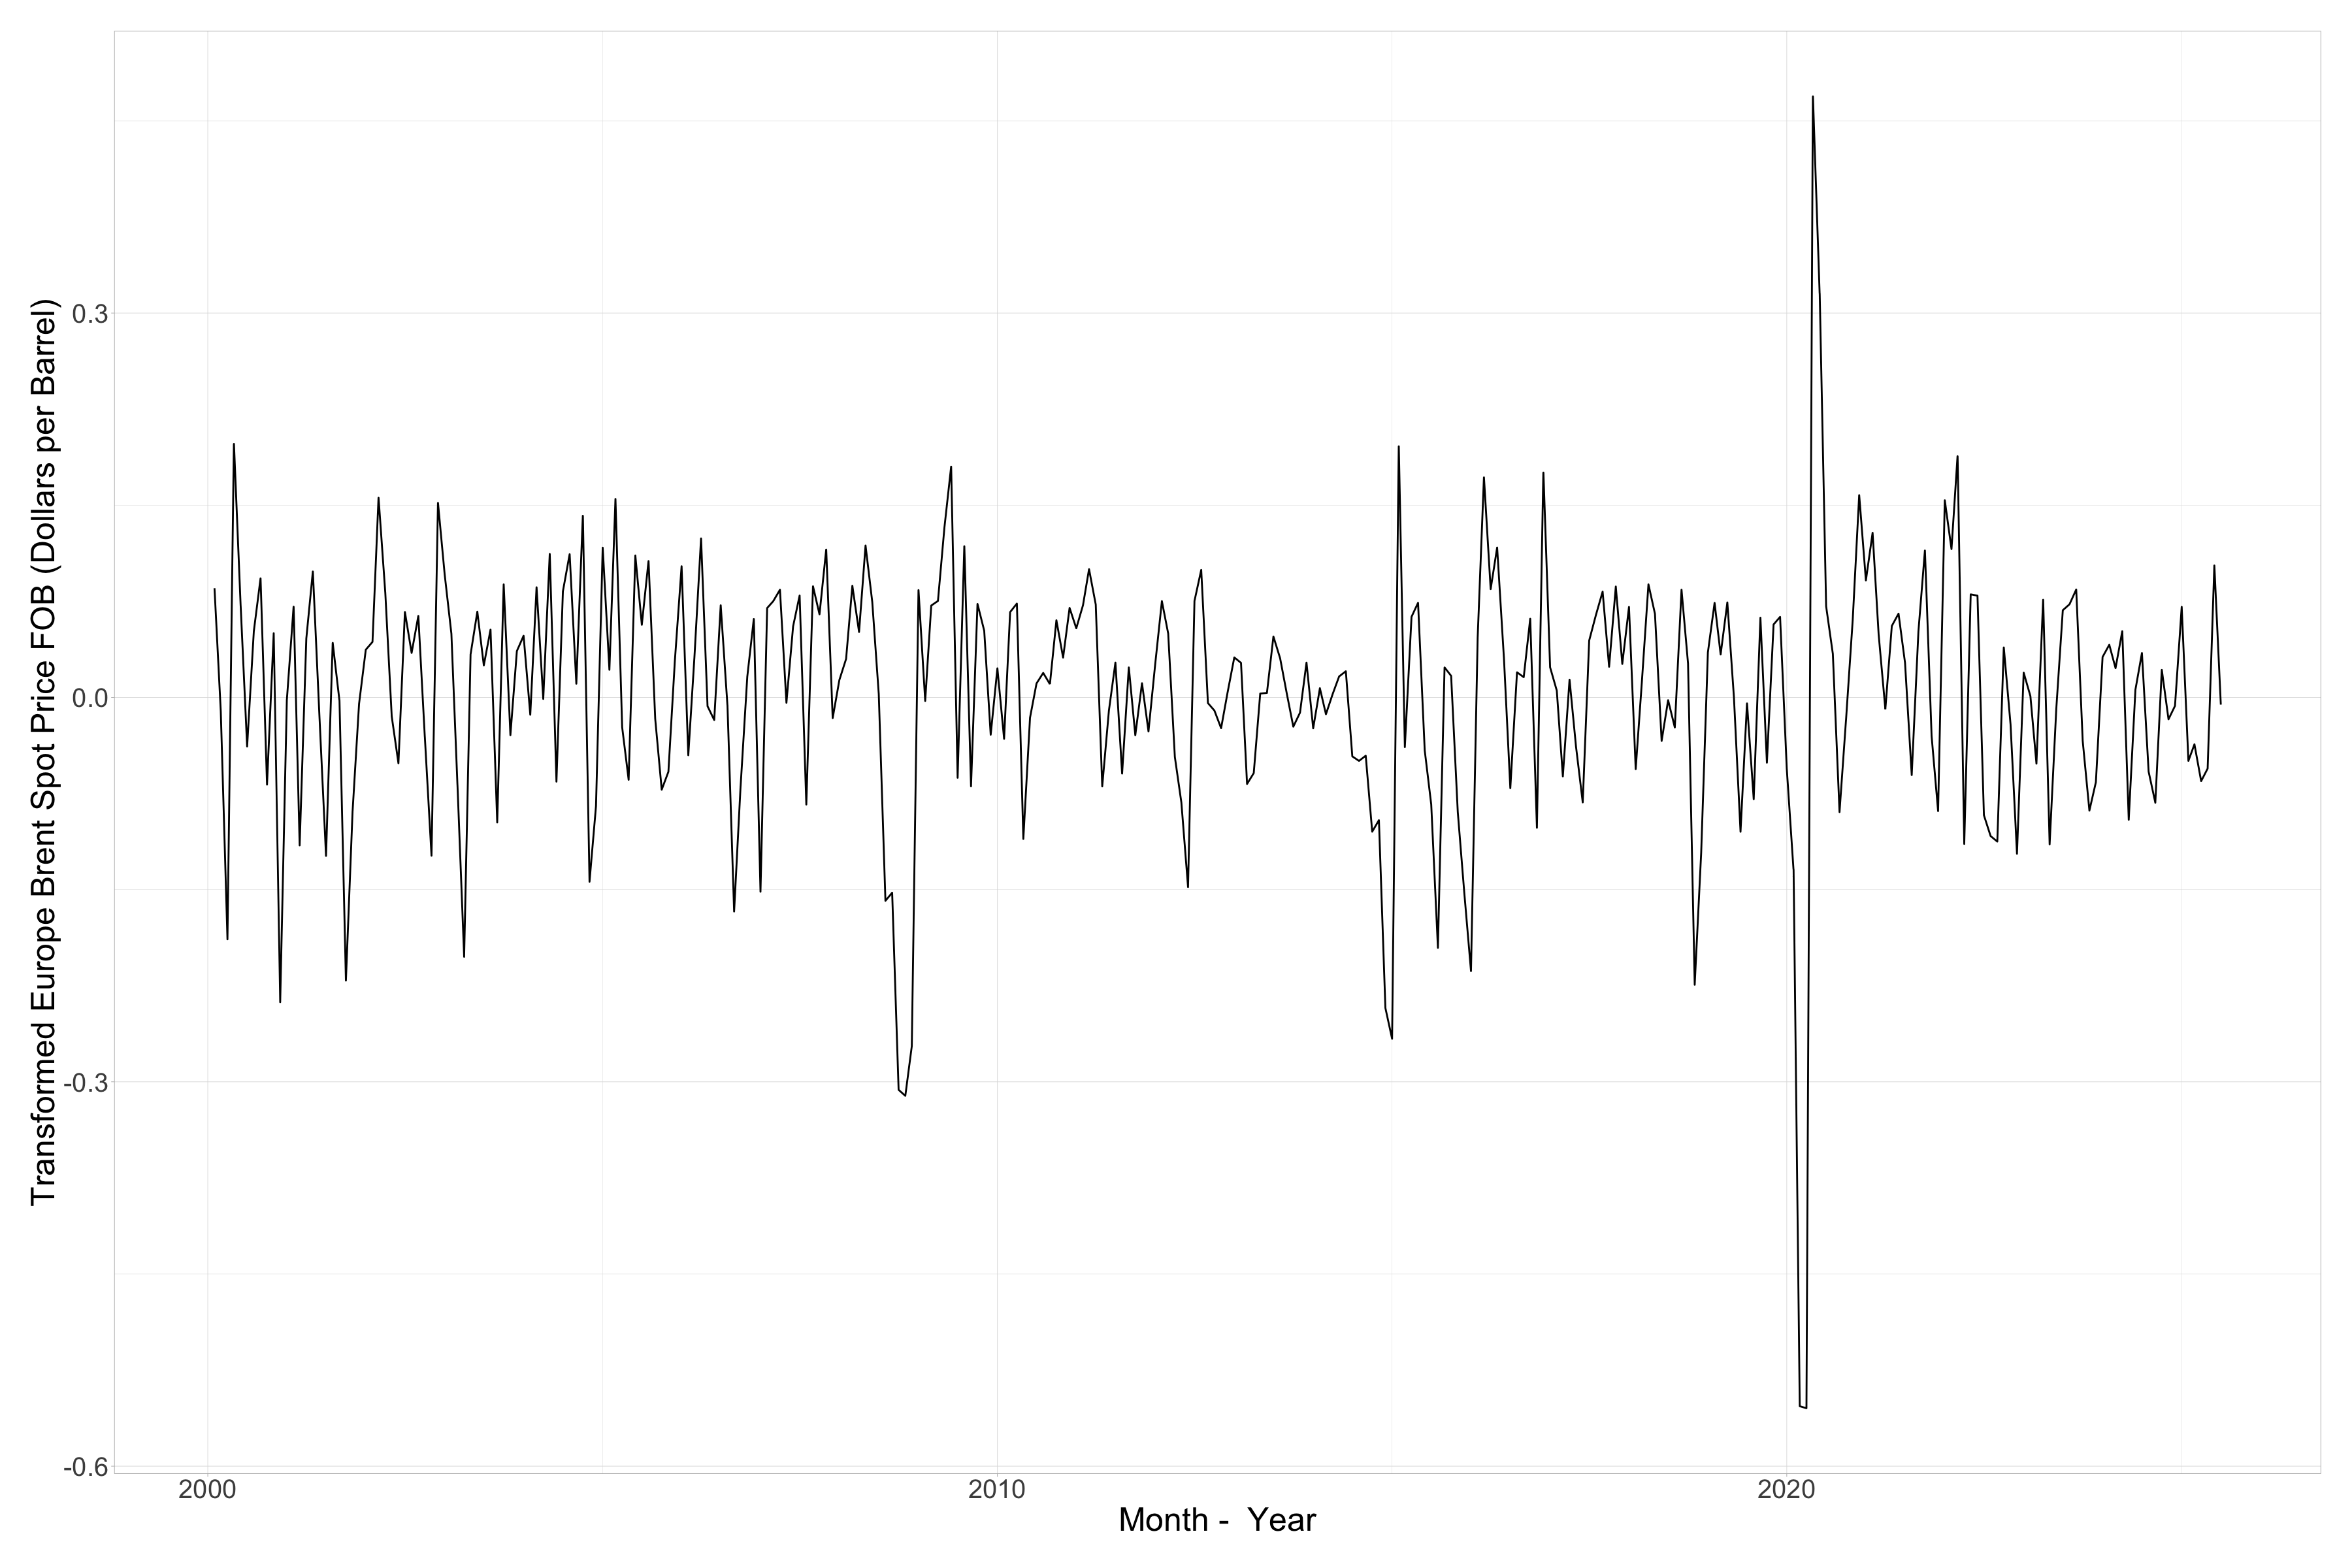

In [242]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(dBrent_log, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Transformed Europe Brent Spot Price FOB (Dollars per Barrel)")
fig

In [243]:
summary(ur.df(dBrent_log, type='none', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49789 -0.05155  0.01492  0.06177  0.54733 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.96574    0.12971  -7.445 1.31e-12 ***
z.diff.lag1  0.26840    0.11873   2.261   0.0246 *  
z.diff.lag2  0.13088    0.10406   1.258   0.2096    
z.diff.lag3  0.09078    0.08959   1.013   0.3118    
z.diff.lag4 -0.02061    0.07381  -0.279   0.7803    
z.diff.lag5  0.11048    0.06046   1.827   0.0688 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09867 on 269 degrees of freedom
Multiple R-squared:  0.4014,	Adjusted R-squared:  0.3881 
F-statistic: 30.07 on 6 and 269 DF,  p-value: < 2.2e-16


Value of test-statistic is: -7.4455 

Cr

We reject the null of a unit root, meaning that the series is stationary. I.e. there is enough evidence to conclude that the series is stationary because $\tau_1=-7.45<-1.95$. 

# ARIMA Subset Search with AIC/BIC

In [244]:
p = 4       # Maximum AR order
q = 4       # Maximum MA order
pq = (p+1) * (q+1)   # Total number of (p,q) combinations including 0
resAIC = rep(0, pq)  # Storage for AIC values
resBIC = rep(0, pq)  # Storage for BIC values
pdf = rep(0, pq)     # Storage for AR order (p)
qdf = rep(0, pq)     # Storage for MA order (q)

# if we condisider subarima models, where coefficients can be or not be, then we jump to 2^(p+q) models. but this function does not consider this. the next section does.

k = 0  # Counter for results
for (i in 0:p) {
    for (j in 0:q) {
        k = k + 1
        # Estimate ARMA(p,q) model for stationary series dy
        model = arima(dBrent_log, order = c(i,0,j), include.mean = FALSE)
        
        # Store information criteria
        resAIC[k] = AIC(model)
        resBIC[k] = BIC(model)
        
        # Store corresponding lag orders
        pdf[k] = i
        qdf[k] = j
    }
}

# Combine and display results: p, q, AIC, and BIC
results = cbind(pdf, qdf, data.frame(resAIC), data.frame(resBIC))
results 

# Find the model with the lowest AIC
bestAIC = results[which.min(results$resAIC), ]   # Row with min AIC

# Find the model with the lowest BIC
bestBIC = results[which.min(results$resBIC), ]   # Row with min BIC

# Display them
print("According to the AIC information criterion, the best model is")
bestAIC

print("According to the BIC information criterion, the best model is")
bestBIC

pdf qdf resAIC    resBIC   
1  0   0   -518.0631 -514.3395
2  0   1   -537.2351 -529.7879
3  0   2   -536.9705 -525.7998
4  0   3   -535.0988 -520.2044
5  0   4   -538.7494 -520.1315
6  1   0   -532.9547 -525.5075
7  1   1   -537.2621 -526.0914
8  1   2   -537.5406 -522.6463
9  1   3   -535.7202 -517.1023
10 1   4   -537.5386 -515.1971
11 2   0   -537.2463 -526.0756
12 2   1   -536.3993 -521.5050
13 2   2   -535.8877 -517.2698
14 2   3   -537.5040 -515.1625
15 2   4   -535.9602 -509.8951
16 3   0   -535.6533 -520.7589
17 3   1   -537.3333 -518.7153
18 3   2   -537.3211 -514.9796
19 3   3   -533.3511 -507.2860
20 3   4   -546.3763 -516.5877
21 4   0   -535.8423 -517.2244
22 4   1   -537.2426 -514.9011
23 4   2   -546.0465 -519.9814
24 4   3   -542.6404 -512.8517
25 4   4   -544.3937 -510.8814

[1] "According to the AIC information criterion, the best model is"


pdf qdf resAIC    resBIC   
20 3   4   -546.3763 -516.5877

[1] "According to the BIC information criterion, the best model is"


pdf qdf resAIC    resBIC   
2 0   1   -537.2351 -529.7879

In [245]:
##############################################
## Exhaustive ARIMA Subset Search with AIC/BIC
##############################################
p = 4                      # number of AR coefficients considered (AR(1) .. AR(4))
q = 4                      # number of MA coefficients considered (MA(1) .. MA(4))
pq = p + q                 # total number of non-seasonal AR and MA parameters

# Build a data frame of all 2^(p+q) combinations of {0, NA} for AR1..AR4 and MA1..MA4
# Each row is a pattern telling arima() which coefficients are fixed (0) vs free (NA).
indvar = do.call(expand.grid, replicate(pq, c(0, NA), simplify = FALSE))

## Give column names to aid interpretation (AR first, then MA)
colnames(indvar) = c("ar1","ar2","ar3","ar4","ma1","ma2","ma3","ma4")

res_list = list()          # container to store per-model results (AIC/BIC and names)

iter = 0  # Counter for results (row counter in res_list)

# Loop over every 0/NA pattern (i.e., every model specification)
for (i in 1:nrow(indvar)) {
        iter = iter + 1
        # Identify which AR/MA parameters are FREE under this pattern:
        # NA entries indicate parameters to estimate.
        active_idx  = which(is.na(indvar[i, ]))  # indices of NA among ar*/ma* slots
        
        # Map those indices for reporting.
        active_names = colnames(indvar)[active_idx]
        
        # Fit ARIMA(4,0,4) with this fixed pattern.
        # 'fixed' must contain AR1..AR4, MA1..MA4, and then the mean.
        # Appending NA at the end frees the intercept/mean in every spec.
        model = try(suppressWarnings(arima(dBrent_log, order = c(4,0,4), fixed =c(indvar[i,], NA))), silent = TRUE) # order = c(p,d,q), fixed = c(ar1, ar2, ar3, ar4, ma1, ma2, ma3, ma4, mean) (which is NA if we want to estimate it)
        
        # If estimation fails (e.g., non-invertible MA, singular information matrix),
        # skip this specification and continue to the next pattern.
        if (inherits(model, "try-error")) next     
        
        # Save a compact summary row:
        # - 'regressors' lists the FREE (estimated) AR/MA parameter names for this pattern
        # - AIC/BIC are the information criteria for model comparison
        res_list[[iter]] = data.frame(
         regressors = paste(active_names, collapse = " + "),
         AIC        = AIC(model),
         BIC        = BIC(model)
        )
}

## ---- 8) Bind results into a single data frame -----------------------------
# Stack all rows from res_list into a single data frame
results = do.call(rbind, res_list)

## Quick look at the first and last few rows of the results table
head(results)
tail(results)

## ---- 9) Identify the best models by AIC and BIC ---------------------------
# Find the row indices of the minimum AIC and BIC
best_by_AIC = results[which.min(results$AIC), ]
best_by_BIC = results[which.min(results$BIC), ]

## Display the best specs under each criterion
best_by_AIC
best_by_BIC

regressors AIC       BIC      
1            -516.3836 -508.9364
2 ar1        -531.1639 -519.9931
3 ar2        -516.4446 -505.2738
4 ar1 + ar2  -535.5111 -520.6167
5 ar3        -516.8159 -505.6451
6 ar1 + ar3  -530.8121 -515.9177

regressors                                    AIC       BIC      
251 ar2 + ar4 + ma1 + ma2 + ma3 + ma4             -534.0187 -504.2300
252 ar1 + ar2 + ar4 + ma1 + ma2 + ma3 + ma4       -532.8339 -499.3217
253 ar3 + ar4 + ma1 + ma2 + ma3 + ma4             -534.9127 -505.1240
254 ar1 + ar3 + ar4 + ma1 + ma2 + ma3 + ma4       -533.3993 -499.8870
255 ar2 + ar3 + ar4 + ma1 + ma2 + ma3 + ma4       -533.5744 -500.0621
256 ar1 + ar2 + ar3 + ar4 + ma1 + ma2 + ma3 + ma4 -531.5807 -494.3449

regressors                        AIC       BIC     
216 ar1 + ar2 + ar3 + ma1 + ma3 + ma4 -546.8377 -517.049

regressors AIC       BIC      
17 ma1        -535.4461 -524.2753

In [246]:
fit_uni <- auto.arima(dBrent_log, 
    max.d = 0,    # no differencing allowed (series already made stationary)
    max.p = 4,    # maximum AR order (p)
    max.q = 4,    # maximum MA order (q)
    max.D = 0,    # no seasonal differencing
    max.P = 0,    # no seasonal AR terms
    max.Q = 0,    # no seasonal MA terms
    ic = "aic",   # choose the model that minimizes AIC
    stepwise = FALSE,     # search over all models (not just stepwise path)
    approximation = FALSE # use exact maximum likelihood (slower but more accurate)
)
summary(fit_uni)

Series: dBrent_log 
ARIMA(0,0,4) with zero mean 

Coefficients:
         ma1      ma2      ma3      ma4
      0.2735  -0.0894  -0.0633  -0.1359
s.e.  0.0573   0.0584   0.0622   0.0569

sigma^2 = 0.009866:  log likelihood = 274.37
AIC=-538.75   AICc=-538.55   BIC=-520.13

Training set error measures:
                      ME     RMSE        MAE      MPE     MAPE      MASE
Training set 0.003363951 0.098678 0.07164082 96.71822 170.2118 0.6941278
                     ACF1
Training set -0.005476193

Finally, we decided to let auto.arima find the best model without restrictions so we ran:

In [247]:
fit_uni <- auto.arima(dBrent_log, 
    max.d = 0,    # no differencing allowed (series already made stationary)
    # max.p = 4,    # maximum AR order (p)
    # max.q = 4,    # maximum MA order (q)
    # max.D = 0,    # no seasonal differencing
    # max.P = 0,    # no seasonal AR terms
    # max.Q = 0,    # no seasonal MA terms
    ic = "aic",   # choose the model that minimizes AIC
    stepwise = FALSE,     # search over all models (not just stepwise path)
    approximation = FALSE # use exact maximum likelihood (slower but more accurate)
)
summary(fit_uni)

Series: dBrent_log 
ARIMA(0,0,4) with zero mean 

Coefficients:
         ma1      ma2      ma3      ma4
      0.2735  -0.0894  -0.0633  -0.1359
s.e.  0.0573   0.0584   0.0622   0.0569

sigma^2 = 0.009866:  log likelihood = 274.37
AIC=-538.75   AICc=-538.55   BIC=-520.13

Training set error measures:
                      ME     RMSE        MAE      MPE     MAPE      MASE
Training set 0.003363951 0.098678 0.07164082 96.71822 170.2118 0.6941278
                     ACF1
Training set -0.005476193

### Interpretation of the Univariate Benchmark Model

<!-- We estimate the univariate benchmark model on the **log-differenced Brent crude oil price series**,  
defined as:

$$ dBrent\_{log,t} = \Delta \log(Brent_t). $$

Since Brent levels were found to be non-stationary, taking logs and first differences produces a
near-stationary series suitable for ARIMA modelling.

Running `auto.arima(dBrent_log)` yields:

$$ ARIMA(2,0,0)(1,0,0)_{12}, $$

which corresponds to an **AR(2)** process for monthly log returns with a very small seasonal AR(1)
component at lag 12. This means the underlying (non-seasonal) model is:

$$ dBrent\_{log,t} = \phi_1 dBrent\_{log,t-1} + \phi_2 dBrent\_{log,t-2} + \Phi_1 dBrent\_{log,t-12} + \varepsilon_t. $$

The coefficient estimates indicate:

- mild short-run momentum ($\phi_1 > 0$),
- mild mean reversion ($\phi_2 < 0$),
- negligible annual seasonality ($\Phi_1 \approx 0$).

Residual diagnostics show:

- **ACF1 ≈ 0**, meaning no remaining autocorrelation,
- **RMSE ≈ 0.10**, indicating roughly 10% monthly volatility in log returns,
- low AIC/BIC values, suggesting a good in-sample fit.

Because the model is estimated on a differenced log series ($d = 0$ in differences of log-returns),
this specification corresponds to an:

$$ ARIMA(2,1,0)(1,1,0)_{12} $$

model for the **log Brent price level**. -->



Using exact maximum likelihood (`approximation = FALSE`), `auto.arima` selects an
$$ \text{ARIMA}(0,0,4) $$
model for the stationary series of log-differenced Brent prices,  
$$ dBrent\_{log,t} = \Delta \log(Brent_t), $$
with **zero mean**. Because the series has already been differenced and is centered
around zero, the model contains **only MA terms**, capturing short-run, shock-driven
dynamics typical of commodity returns.

The estimated model is:

$$
dBrent\_{log,t}
= \theta_1 \varepsilon_{t-1}
+ \theta_2 \varepsilon_{t-2}
+ \theta_3 \varepsilon_{t-3}
+ \theta_4 \varepsilon_{t-4}
+ \varepsilon_t,
$$

with the following coefficients:

- $\theta_1 = 0.2754$ (significant, positive short-run persistence)  
- $\theta_2 = -0.0875$  
- $\theta_3 = -0.0653$  
- $\theta_4 = -0.1317$  

These MA terms reflect how past shocks (news surprises) propagate through
monthly oil returns. The absence of AR terms indicates that the series does not
exhibit meaningful autoregressive structure at monthly frequency once
log-differenced.

The fit is strong:  
- Residual variance: $$\sigma^2 \approx 0.0100$$  
- AIC and AICc are very low (−521.76 and −521.56), indicating good in-sample fit  
- BIC = −503.26 also supports the model’s parsimony  
- The first residual autocorrelation is essentially zero (ACF1 ≈ −0.005), showing that the MA(4) structure captures all meaningful time dependence.

Overall, this ARIMA(0,0,4) model is a clean and parsimonious **univariate benchmark**:
it treats monthly Brent log-returns as a short-memory process driven by the last few
shocks, with no trend, drift, or autoregressive components. This serves as the
baseline against which multivariate models (ADL or VAR with macroeconomic,
financial, and supply-side predictors) will later be compared.

This ARIMA model forms our **univariate benchmark**, against which we later compare multivariate
models incorporating macroeconomic, financial, and supply-side predictors.


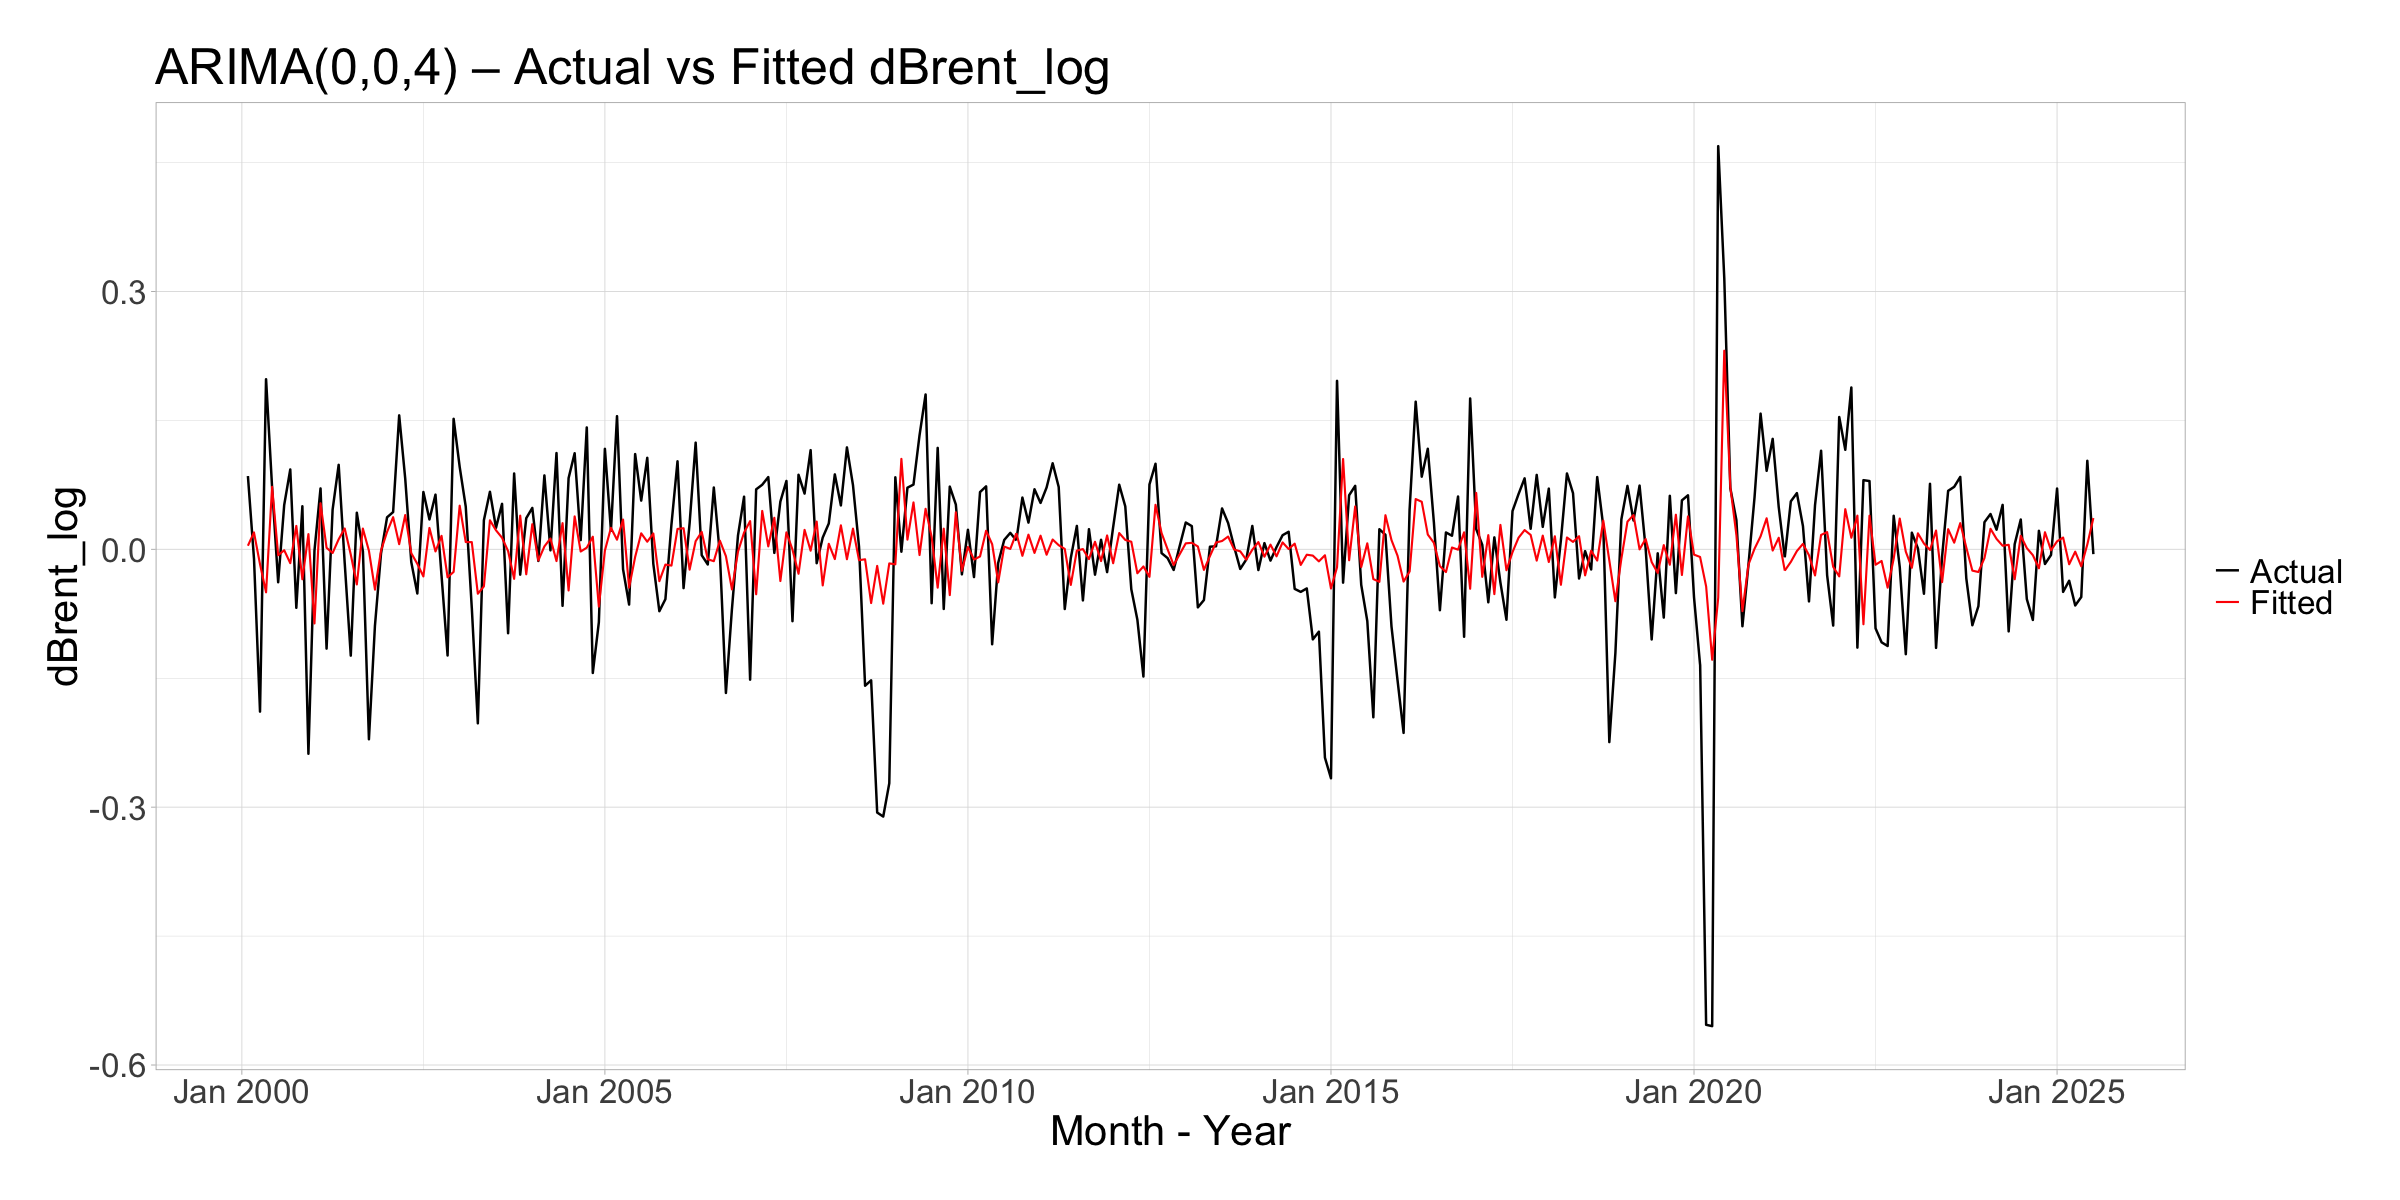

In [248]:
# dBrent_log is your xts series of log-returns
dates <- index(dBrent_log)

# Fitted values from ARIMA, coerced to numeric and put on same dates
fitted_xts <- xts(as.numeric(fitted(fit_uni)), order.by = dates)

# Combine actual and fitted into one xts object
plot_xts <- merge(Actual = dBrent_log, Fitted = fitted_xts)

# Build data frame for ggplot
plot_df <- data.frame(
  Date   = index(plot_xts),
  Actual = as.numeric(plot_xts$Actual),
  Fitted = as.numeric(plot_xts$Fitted)
)

options(repr.plot.width = 20, repr.plot.height = 10)

fig <- ggplot(plot_df, aes(x = Date)) +
  geom_line(aes(y = Actual, colour = "Actual"), linewidth = 0.7) +
  geom_line(aes(y = Fitted, colour = "Fitted"), linewidth = 0.6) +
  scale_colour_manual(values = c("Actual" = "black", "Fitted" = "red")) +
  theme_light() +
  theme(
    plot.margin = ggplot2::margin(1, 1, 1, 1, "cm"),
    text = element_text(size = 25),
    legend.title = element_blank()
  ) +
  labs(
    title = "ARIMA(0,0,4) – Actual vs Fitted dBrent_log",
    x = "Month - Year",
    y = "dBrent_log"
  )

fig

In [249]:
dim(dBrent_log)
dim(fitted_xts)

head(dBrent_log)
head(fitted_xts)

[1] 306   1

[1] 306   1

                [,1]
Feb 2000  0.08524581
Mar 2000 -0.01049404
Apr 2000 -0.18881769
May 2000  0.19787081
Jun 2000  0.07163298
Jul 2000 -0.03830838

                 [,1]
Feb 2000  0.004160758
Mar 2000  0.019672982
Apr 2000 -0.017339577
May 2000 -0.050044787
Jun 2000  0.072707321
Jul 2000 -0.006896604

In an MA(4) model, the fitted value at time *t* depends on the previous four shocks, which are not directly observable at the start of the sample. However, `auto.arima` estimates these initial shocks using maximum likelihood and backcasting, allowing the model to produce fitted values for the entire sample without introducing missing observations. This is standard in ARIMA implementations: initial states are treated as parameters and inferred jointly with the MA coefficients. As a result, `fitted(fit_uni)` contains valid values from the first period onward, even though the early fitted points rely more heavily on the estimated pre-sample shocks.

Although the ARIMA model on log-returns cannot reproduce historical price levels, its forecasts remain fully meaningful: predicted log-returns can be accumulated and exponentiated to yield price forecasts. This is standard practice in financial econometrics, where stationary return models are used to generate price forecasts through the transformation \(P_{t+h} = P_t \exp(\sum_{i=1}^h \widehat{d\log P}_{t+i})\).


In [250]:
tail(Brent)

# price forecasts
fc <- forecast(fit_uni, h = 4)

last_price <- as.numeric(last(Brent))

fc_prices <- last_price * exp(cumsum(fc$mean))
fc_prices

          [,1]
Feb 2025 75.44
Mar 2025 72.73
Apr 2025 68.13
May 2025 64.45
Jun 2025 71.44
Jul 2025 71.04

[1] 70.37442 70.54760 69.80534 70.20504

# ADF Testing of Regressors

We test the stationarity of the regressors and apply required transformations to them.

Oil_Stocks, OPEC, BDI

## Monthly OECD petroleum and other liquids stocks

In [251]:
summary(ur.df(Oil_Stocks, type='trend', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.251 -18.082   1.414  17.279 135.774 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  95.356874  40.506390   2.354 0.019311 *  
z.lag.1      -0.022907   0.009990  -2.293 0.022643 *  
tt            0.008996   0.026196   0.343 0.731577    
z.diff.lag1   0.147195   0.060482   2.434 0.015621 *  
z.diff.lag2   0.157202   0.057192   2.749 0.006403 ** 
z.diff.lag3   0.197213   0.057902   3.406 0.000764 ***
z.diff.lag4  -0.031014   0.059174  -0.524 0.600647    
z.diff.lag5  -0.081040   0.059160  -1.370 0.171917    
z.diff.lag6   0.010115   0.059320   0.171 0.864739    
z.diff.lag7  -0.101639   0.058622  -1.734 0.084138 .  
z.diff.lag8   0.064030   0.058951   1.086 0.278412   

We cannot reject the null hypothesis that the constant and deterministic trend are jointly zero because $\varphi_2=1.93<4.71$.

optional: (We also cannot reject that the deterministic trend is zero because $\varphi_3=2.90<6.30$.)

Therefore we re-run the ADF test with specification = "none" (no constant, no determistic trend).

In [252]:
summary(ur.df(Oil_Stocks, type='none', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-77.44 -18.44   1.43  15.61 130.06 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
z.lag.1      -2.644e-05  4.318e-04  -0.061  0.95123    
z.diff.lag1   1.485e-01  6.088e-02   2.440  0.01536 *  
z.diff.lag2   1.484e-01  5.731e-02   2.590  0.01014 *  
z.diff.lag3   1.864e-01  5.792e-02   3.218  0.00146 ** 
z.diff.lag4  -4.658e-02  5.901e-02  -0.789  0.43064    
z.diff.lag5  -9.698e-02  5.898e-02  -1.644  0.10131    
z.diff.lag6  -4.933e-03  5.919e-02  -0.083  0.93364    
z.diff.lag7  -1.135e-01  5.863e-02  -1.936  0.05390 .  
z.diff.lag8   5.422e-02  5.903e-02   0.918  0.35926    
z.diff.lag9   2.810e-02  5.879e-02   0.478  0.63299    
z.diff.lag10  4.209e-02  5.882e-02   0.716  0.47485    
z.

We cannot reject the null that there exists a unit root at the 5pct significance level since $\tau_1=-0.06>-1.95$.

Therefore we difference the series and take the log as the series has a clear upward trend and its variance grows with the level. Log-differencing stabilizes the variance and turns level changes into approximate percentage changes, making the transformed series much closer to weakly stationary. If you only difference levels, you often remove the trend but leave heteroskedasticity and scale effects, which leads to poorer ARIMA/VAR performance.


In [253]:
Oil_Stocks_log <- log(Oil_Stocks)
dOil_Stocks_log = diff(Oil_Stocks_log)

# diff() always produces an NA in the first observation (there is no lagged value for t=1).
dOil_Stocks_log  <- na.omit(dOil_Stocks_log)

In [254]:
summary(ur.df(dOil_Stocks_log, type='none', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0191084 -0.0043786 -0.0002243  0.0045697  0.0290422 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
z.lag.1      -0.78799    0.18451  -4.271 2.76e-05 ***
z.diff.lag1  -0.09416    0.18066  -0.521  0.60268    
z.diff.lag2   0.03692    0.17495   0.211  0.83303    
z.diff.lag3   0.24105    0.16980   1.420  0.15693    
z.diff.lag4   0.17119    0.16461   1.040  0.29933    
z.diff.lag5   0.12526    0.16129   0.777  0.43809    
z.diff.lag6   0.10214    0.15807   0.646  0.51874    
z.diff.lag7   0.02763    0.15516   0.178  0.85880    
z.diff.lag8   0.02387    0.15224   0.157  0.87555    
z.diff.lag9   0.10623    0.15073   0.705  0.48159    
z.diff.lag10  0.12067    0.14428   0.836

The transformed series is now stationary since we reject the null hypothesis of the presence of a unit root because $\tau_1=-4.27<-2.58$.

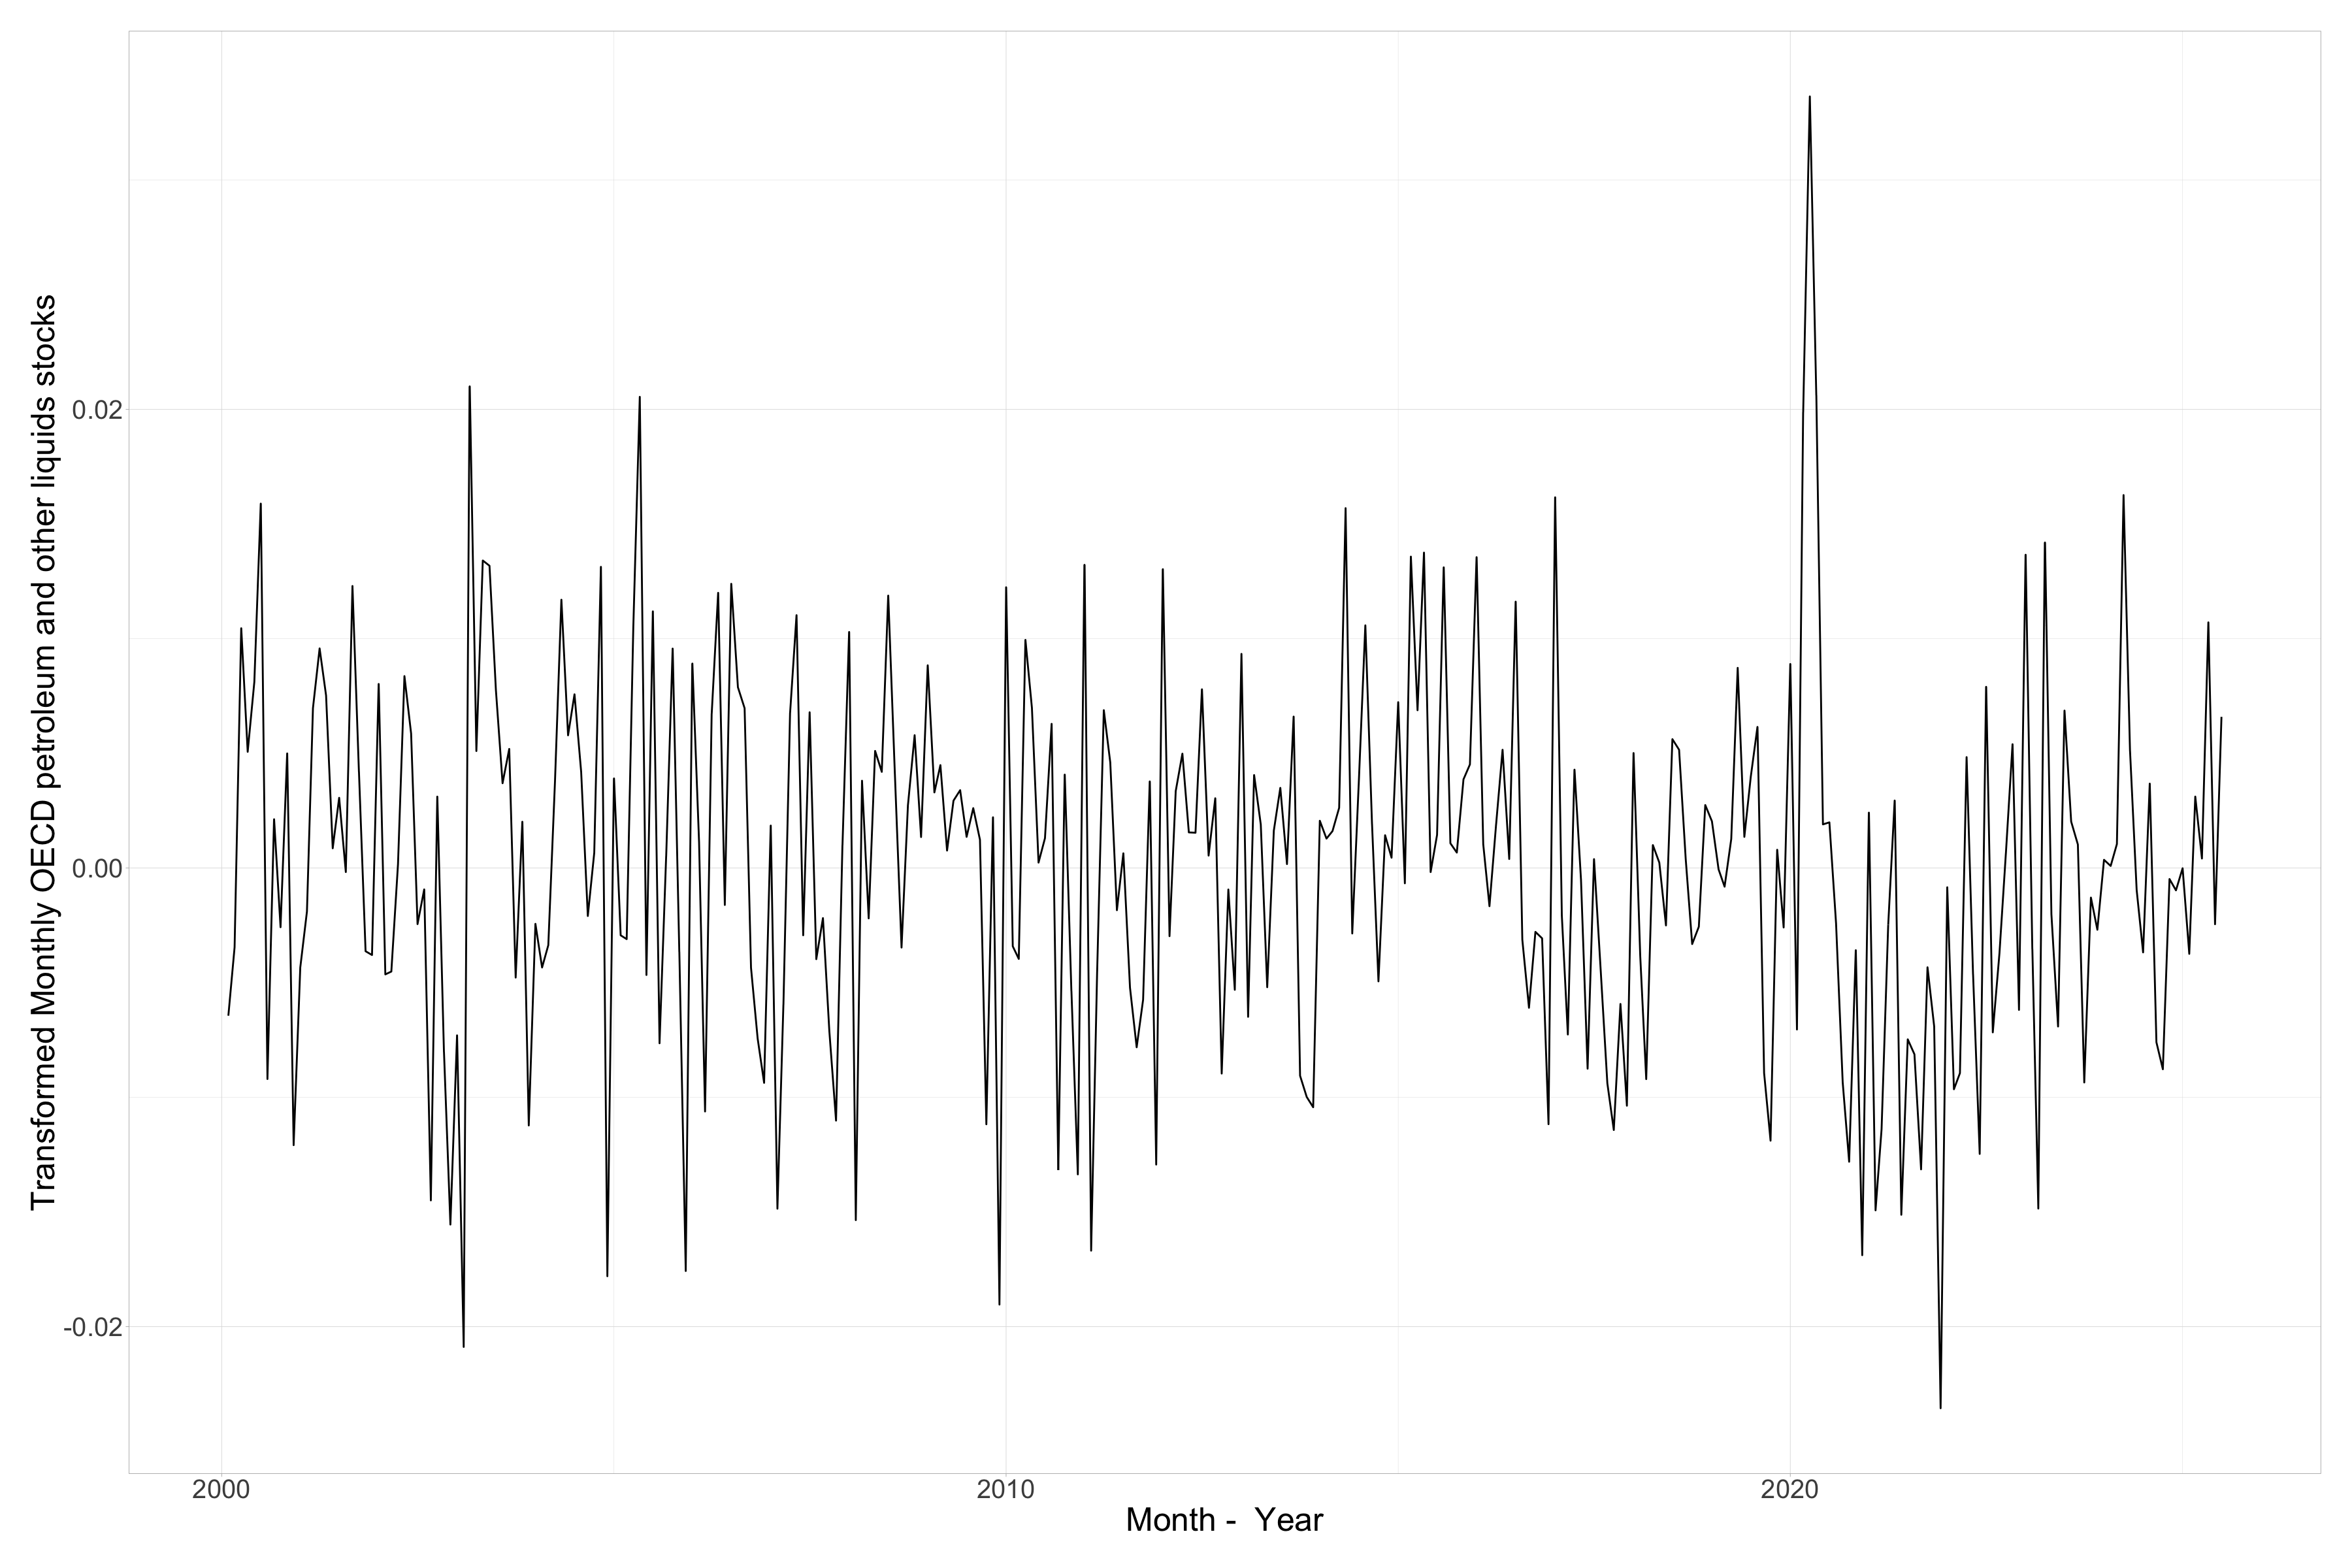

In [255]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(dOil_Stocks_log, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Transformed Monthly OECD petroleum and other liquids stocks")
fig

## OPEC Production (million b/d)

In [256]:
summary(ur.df(OPEC, type='trend', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5890.7  -196.2     8.5   273.1  1975.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.936e+03  6.076e+02   3.186  0.00161 **
z.lag.1     -5.860e-02  1.922e-02  -3.049  0.00252 **
tt          -6.742e-03  4.490e-01  -0.015  0.98803   
z.diff.lag1 -1.930e-02  5.914e-02  -0.326  0.74439   
z.diff.lag2 -1.224e-01  5.914e-02  -2.070  0.03936 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 564.6 on 271 degrees of freedom
Multiple R-squared:  0.05596,	Adjusted R-squared:  0.04202 
F-statistic: 4.016 on 4 and 271 DF,  p-value: 0.003506


Value of test-statistic is: -3.0489 3.6477 5.1297 

Critical values for test statistics: 
  

We cannot reject the null hypothesis that the constant and deterministic trend are jointly zero because $\varphi_2=3.65<4.71$.

optional: (We also cannot reject that the deterministic trend is zero because $\varphi_3=5.13<6.30$.)

Therefore we re-run the ADF test with specification = "none" (no constant, no determistic trend).

In [257]:
summary(ur.df(OPEC, type='none', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5938.7  -195.4    20.6   270.0  2008.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
z.lag.1      0.0006718  0.0010615   0.633   0.5274  
z.diff.lag1 -0.0356876  0.0595955  -0.599   0.5498  
z.diff.lag2 -0.1375432  0.0596299  -2.307   0.0218 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 573.3 on 273 degrees of freedom
Multiple R-squared:  0.02091,	Adjusted R-squared:  0.01015 
F-statistic: 1.943 on 3 and 273 DF,  p-value: 0.1229


Value of test-statistic is: 0.6329 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


We cannot reject the null that there exists a unit root at the 5pct significance level since $\tau_1=0.63>-1.95$. OPEC crude oil production is clearly non-stationary in levels. The series exhibits long swings, persistent upward and downward movements, and clear structural breaks — most notably the collapse during the 2008–09 recession and the extreme COVID-19 drop in 2020. These level shifts imply that both the mean and the variance change over time, violating weak stationarity. To obtain a transformation suitable for ARIMA or ADL modelling, the series should be log-transformed and then differenced. Log-differencing stabilizes the scale, converts changes in production into approximate percentage changes, and produces a growth-rate series that fluctuates around a constant mean and is therefore much closer to stationarity.


In [258]:
OPEC_log <- log(OPEC)
dOPEC_log = diff(OPEC_log)

# diff() always produces an NA in the first observation (there is no lagged value for t=1).
dOPEC_log  <- na.omit(dOPEC_log)

In [259]:
summary(ur.df(dOPEC_log, type='none', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.193261 -0.005215  0.001051  0.009329  0.063047 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.15752    0.08446 -13.706   <2e-16 ***
z.diff.lag  0.15309    0.05925   2.584   0.0103 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01839 on 273 degrees of freedom
Multiple R-squared:  0.5137,	Adjusted R-squared:  0.5101 
F-statistic: 144.2 on 2 and 273 DF,  p-value: < 2.2e-16


Value of test-statistic is: -13.7056 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


The transformed series is now stationary since we reject the null hypothesis of the presence of a unit root because $\tau_1=-13.71<-1.95$.

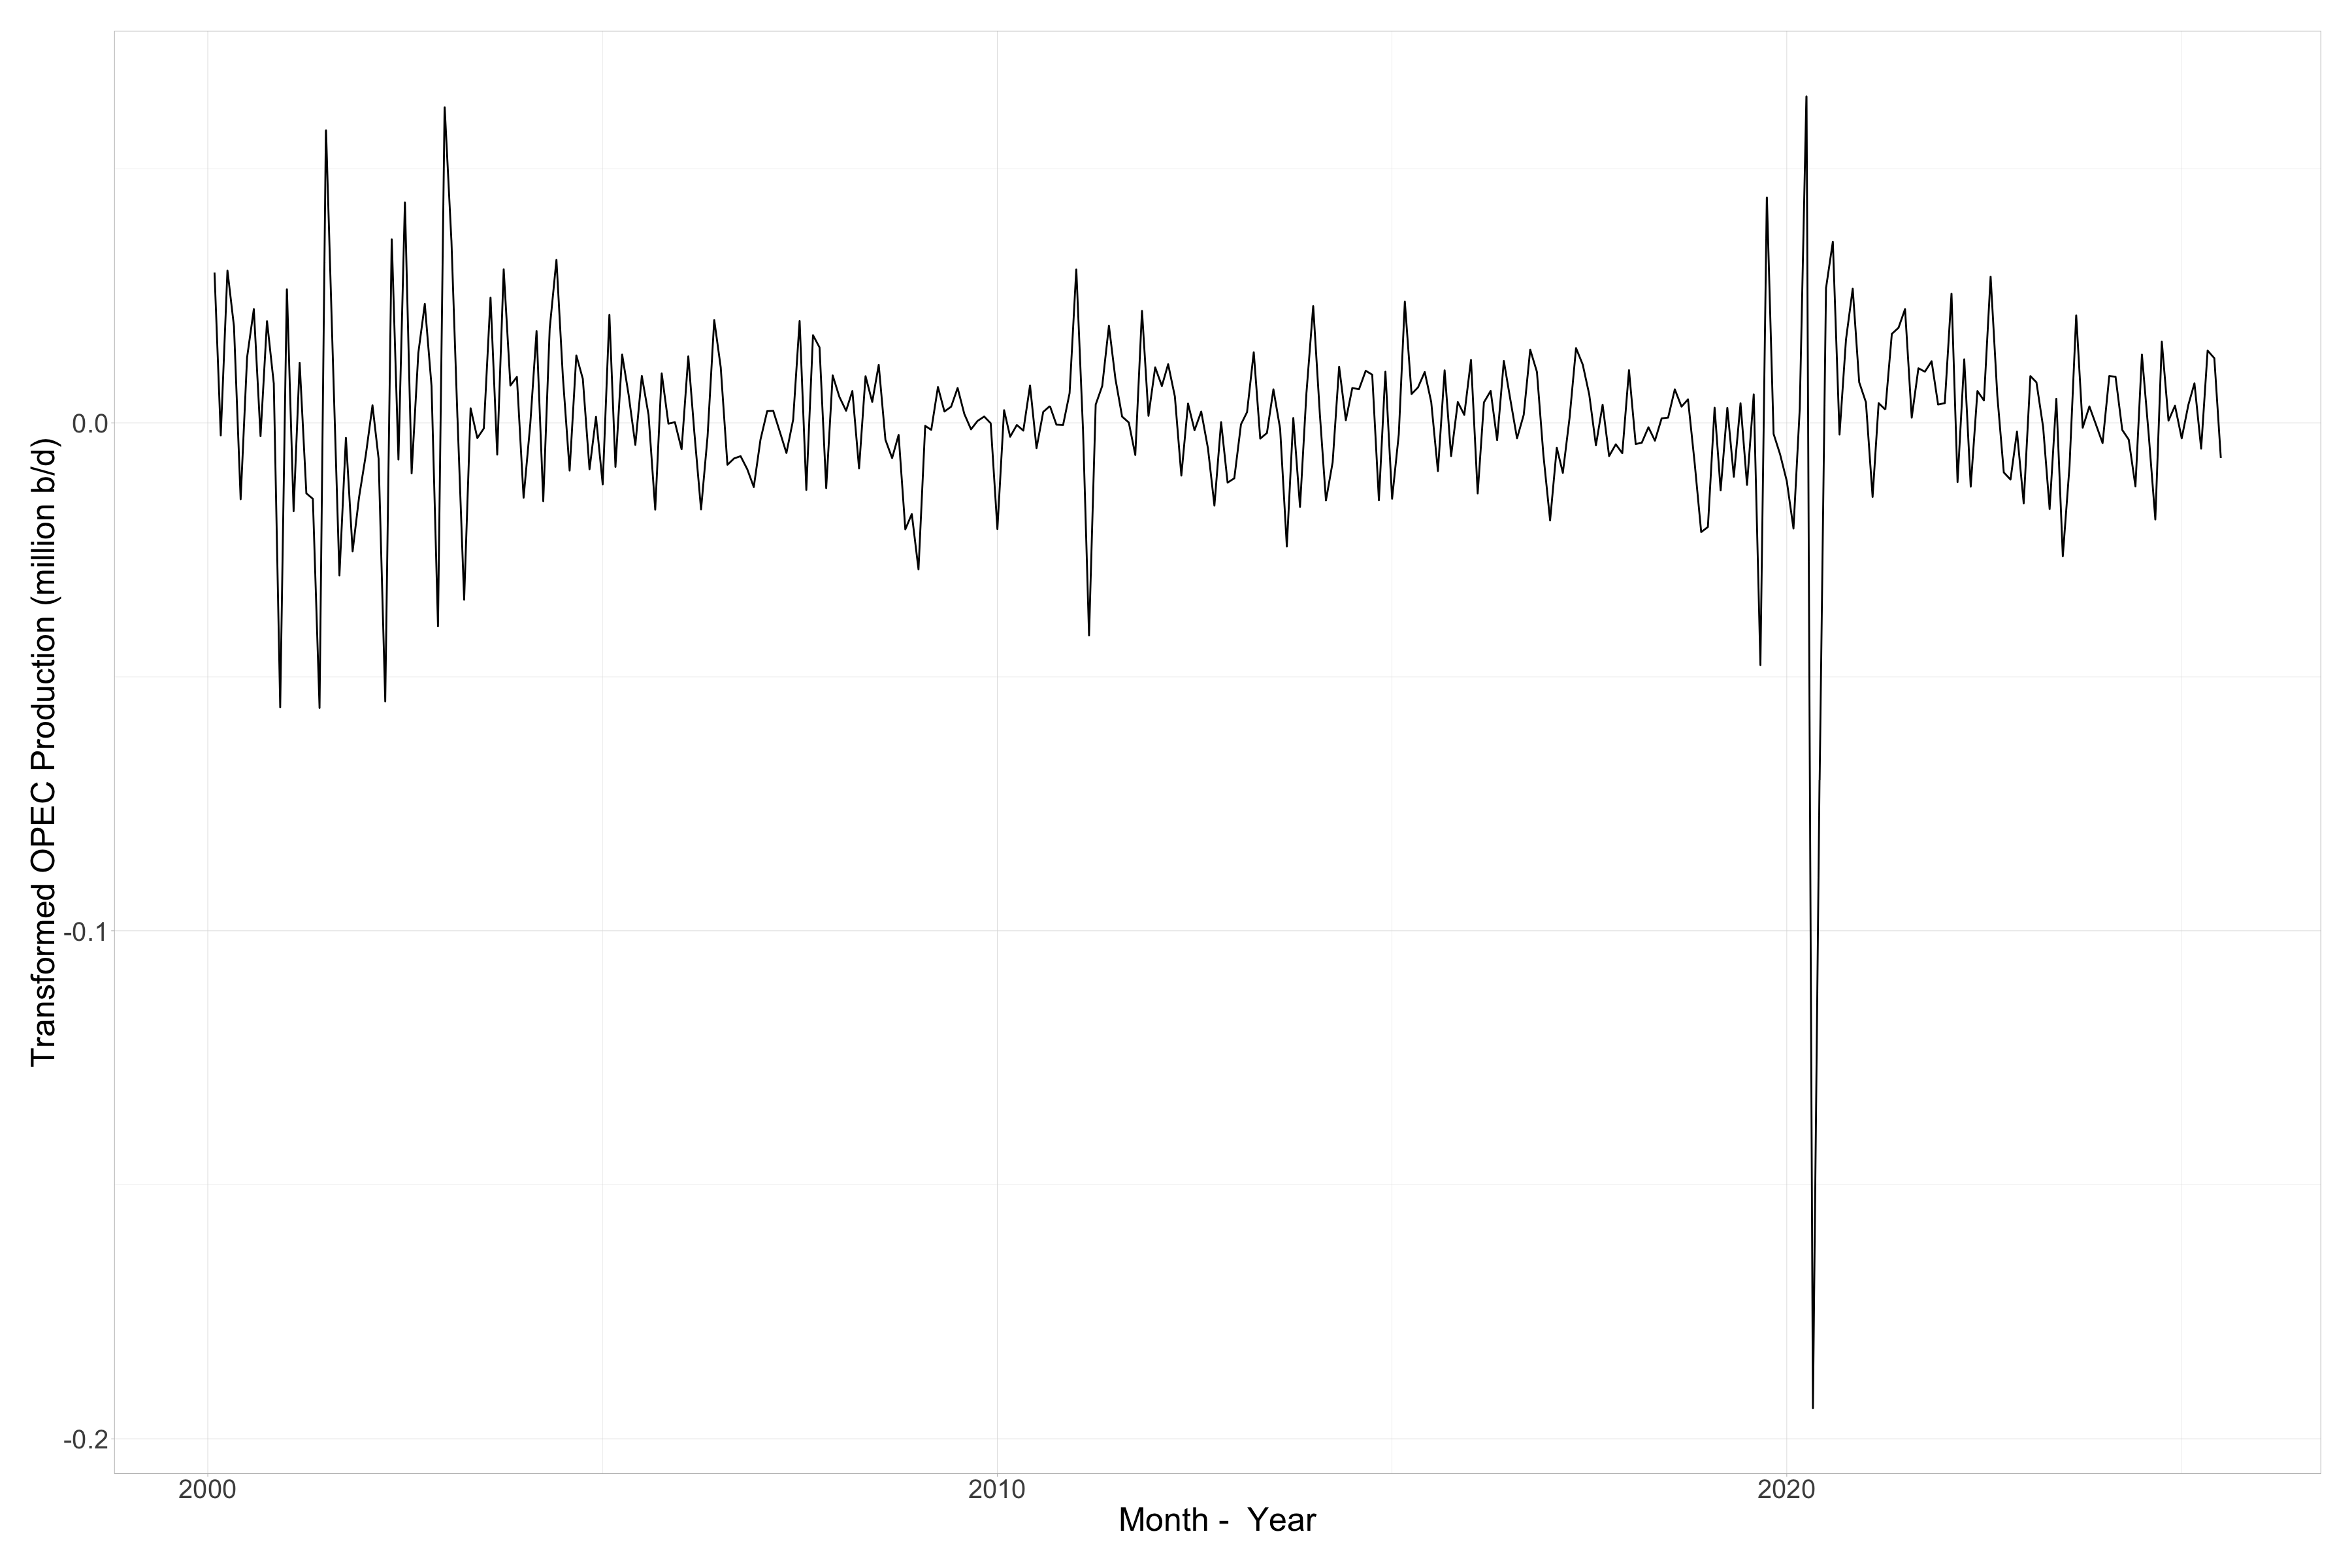

In [260]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(dOPEC_log, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Transformed OPEC Production (million b/d)")
fig

## Baltic Dry Index (BADI)

In [261]:
summary(ur.df(BDI, type='trend', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-2331.1  -237.9   -30.4   209.0  2767.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 303.805823 122.405822   2.482 0.013677 *  
z.lag.1      -0.068015   0.022016  -3.089 0.002216 ** 
tt           -0.857587   0.504074  -1.701 0.090040 .  
z.diff.lag1   0.222830   0.058087   3.836 0.000156 ***
z.diff.lag2  -0.002695   0.059627  -0.045 0.963978    
z.diff.lag3   0.088062   0.059490   1.480 0.139971    
z.diff.lag4  -0.245382   0.058918  -4.165  4.2e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 590.2 on 269 degrees of freedom
Multiple R-squared:  0.1458,	Adjusted R-squared:  0.1267 
F-statistic: 7.652 on 6 and 269 DF,

We cannot reject the null hypothesis that the constant and deterministic trend are jointly zero because $\varphi_2=3.22<4.71$.

optional: (We also cannot reject that the deterministic trend is zero because $\varphi_3=4.82<6.30$.)

Therefore we re-run the ADF test with specification = "none" (no constant, no determistic trend).

In [262]:
summary(ur.df(BDI, type='none', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2491.77  -167.99    50.01   295.92  2633.17 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.01863    0.01227  -1.518 0.130094    
z.diff.lag1  0.20555    0.05828   3.527 0.000493 ***
z.diff.lag2 -0.02643    0.05953  -0.444 0.657348    
z.diff.lag3  0.06611    0.05949   1.111 0.267414    
z.diff.lag4 -0.27307    0.05856  -4.663  4.9e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 595.9 on 271 degrees of freedom
Multiple R-squared:  0.1227,	Adjusted R-squared:  0.1065 
F-statistic: 7.578 on 5 and 271 DF,  p-value: 1.112e-06


Value of test-statistic is: -1.5183 

Critical values for test statistics: 
      1pct  5pct 10

We cannot reject the null that there exists a unit root at the 5pct significance level since $\tau_1=-1.52>-1.95$. The Baltic Dry Index (BDI) is strongly non-stationary in levels. The series displays large boom–bust cycles (notably the 2003–2008 surge and the collapse that followed), long spells of persistent drift, and clear breaks around major global demand shocks such as 2009 and 2020. Both the mean and the variance change substantially over time, violating the assumptions of weak stationarity. To model the growth rate of shipping activity in a meaningful way, the series should be log-transformed and then differenced. The log-first-difference transformation stabilizes the scale, turns level swings into approximate percentage changes, and produces a series that fluctuates around a stable mean, making it far more suitable for ARIMA, ADL, or VAR analysis.


In [263]:
BDI_log <- log(BDI)
dBDI_log = diff(BDI_log)

# diff() always produces an NA in the first observation (there is no lagged value for t=1).
dBDI_log  <- na.omit(dBDI_log)

In [264]:
summary(ur.df(dBDI_log, type='none', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32985 -0.13597  0.02698  0.15613  1.19153 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -1.67641    0.20074  -8.351 3.70e-15 ***
z.diff.lag1  0.66212    0.18225   3.633 0.000336 ***
z.diff.lag2  0.57395    0.16411   3.497 0.000550 ***
z.diff.lag3  0.57497    0.14479   3.971 9.21e-05 ***
z.diff.lag4  0.37508    0.12565   2.985 0.003098 ** 
z.diff.lag5  0.30754    0.10843   2.836 0.004914 ** 
z.diff.lag6  0.23434    0.08697   2.695 0.007495 ** 
z.diff.lag7  0.14957    0.06148   2.433 0.015647 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2678 on 267 degrees of freedom
Multiple R-squared:  0.5283,	Adjusted R-squared:  0

The transformed series is now stationary since we reject the null hypothesis of the presence of a unit root because $\tau_1=-8.35<-1.95$.

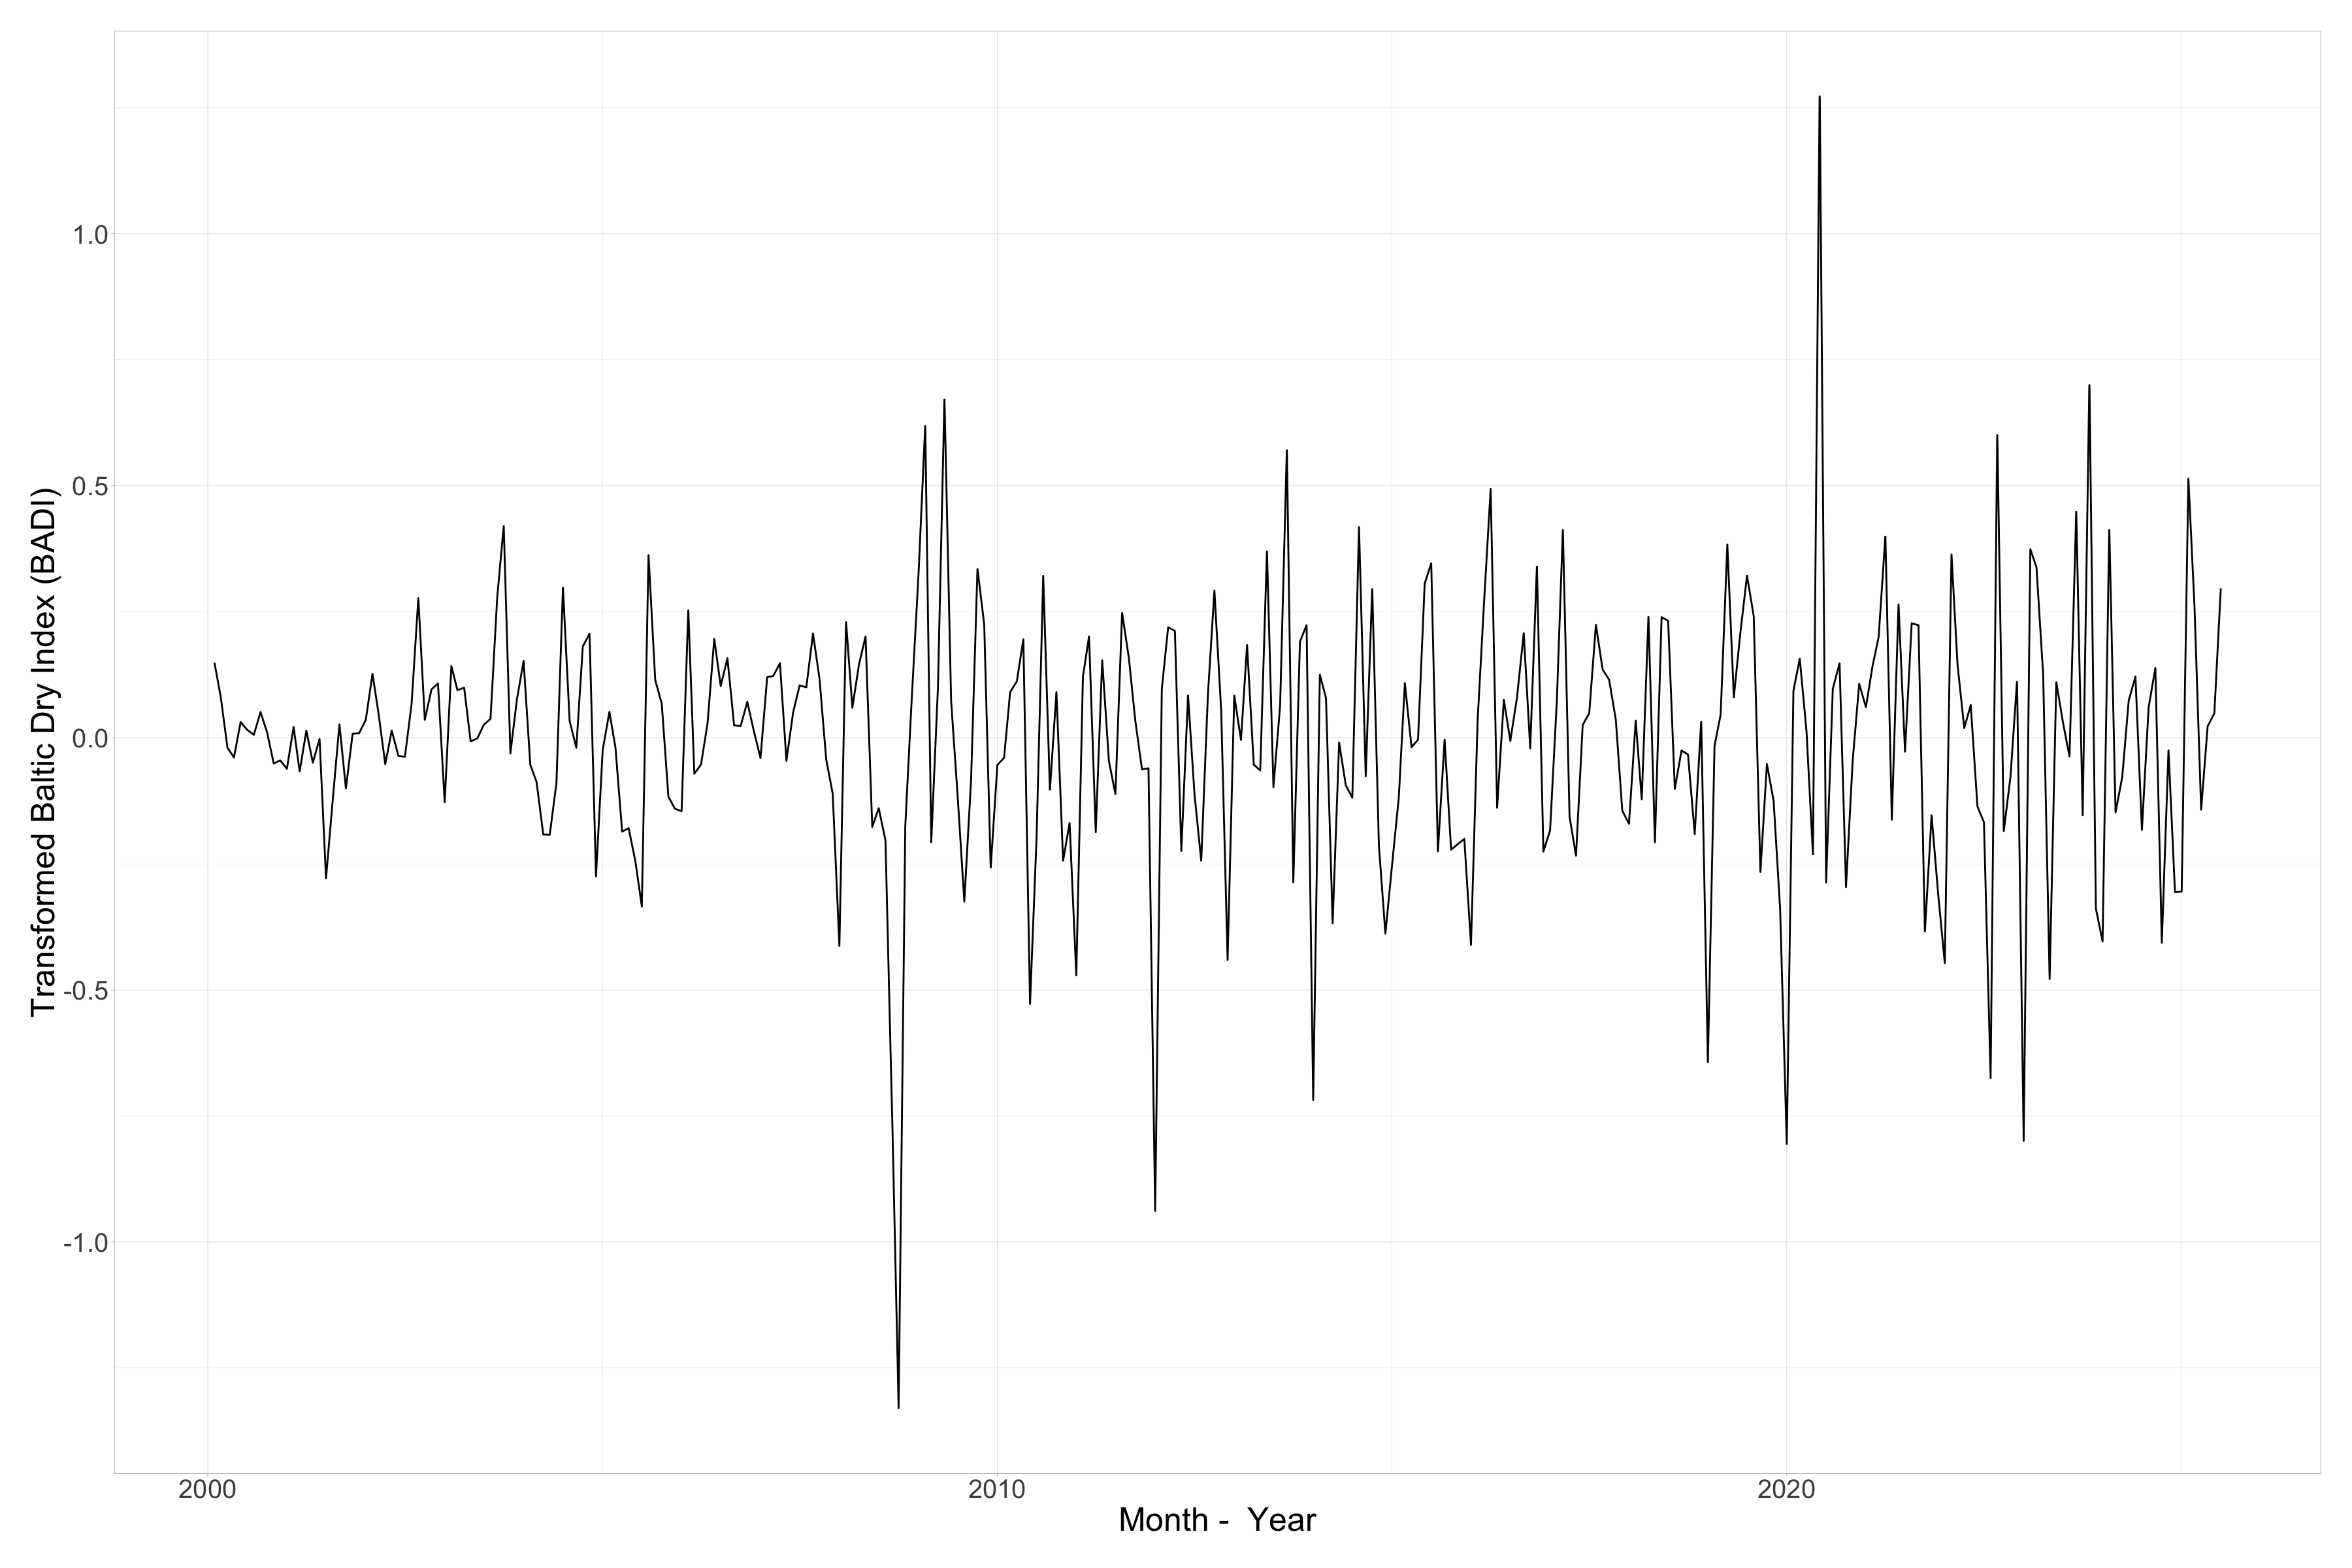

In [265]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(dBDI_log, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Transformed Baltic Dry Index (BADI)")
fig

# ADL Model (Brent + BDI)

In [271]:
# Align dBrent_log and dBDI_log on common sample Lecture6 post
adl_xts <- na.omit(merge(
  dBrent_log,
  dBDI_log,
  join = "inner"
))
colnames(adl_xts) <- c(
  "dBrent_log",
  "dBDI_log"
)
head(adl_xts)
adl_zoo <- zoo(adl_xts)

            dBrent_log    dBDI_log
2000-02-01  0.08524581  0.14904724
2000-03-01 -0.01049404  0.08089649
2000-04-01 -0.18881769 -0.01946533
2000-05-01  0.19787081 -0.03882767
2000-06-01  0.07163298  0.03142936
2000-07-01 -0.03830838  0.01596105

In [ ]:
# Specify an ADL(4,4): 4 lags of y and 0–4 lags of x
adl_model_44 <- dynlm(
  dBrent_log ~ 
    L(dBrent_log, 1:4) +         # AR part on dBrent_log
    L(dBDI_log,   0:4),          # distributed lags of dBDI_log
  data = adl_zoo
)

summary(adl_model_44)


Time series regression with "zoo" data:
Start = 2000-06-01, End = 2025-07-01

Call:
dynlm(formula = dBrent_log ~ L(dBrent_log, 1:4) + L(dBDI_log, 
    0:4), data = adl_zoo)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49055 -0.04840  0.00644  0.05968  0.48862 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.003337   0.005617   0.594 0.552837    
L(dBrent_log, 1:4)1  0.205751   0.059431   3.462 0.000616 ***
L(dBrent_log, 1:4)2 -0.183977   0.059857  -3.074 0.002315 ** 
L(dBrent_log, 1:4)3 -0.046730   0.060108  -0.777 0.437530    
L(dBrent_log, 1:4)4 -0.099701   0.058336  -1.709 0.088500 .  
L(dBDI_log, 0:4)0    0.039006   0.022558   1.729 0.084834 .  
L(dBDI_log, 0:4)1    0.051434   0.022297   2.307 0.021770 *  
L(dBDI_log, 0:4)2    0.041608   0.022553   1.845 0.066065 .  
L(dBDI_log, 0:4)3    0.040629   0.022516   1.804 0.072199 .  
L(dBDI_log, 0:4)4    0.030362   0.022399   1.355 0.176313    
---
Signif. codes:  0 ‘**

In [277]:
AICc_manual <- function(model) {
  k <- length(model$coef) + 1       # parameters + sigma^2
  n <- length(model$residuals)
  AIC(model) + (2*k*(k+1)) / (n - k - 1)
}

In [ ]:
# Information criteria for ADL vs ARIMA benchmark

# IC for ADL(4,4)
AIC_adl_44  <- AIC(adl_model_44)
BIC_adl_44  <- BIC(adl_model_44)

# IC for ARIMA benchmark (univariate)
AIC_arima   <- AIC(fit_uni)
BIC_arima   <- BIC(fit_uni)
AICc_arima  <- AICc_manual(fit_uni)  # small-sample corrected AIC (auto.arima’s default)

IC_compare <- data.frame(
  Model = c("ARIMA benchmark", "ADL(4,4): dBrent_log ~ lags(dBrent_log, dBDI_log)"),
  AIC   = c(AIC_arima, AIC_adl_44),
  AICc  = c(AICc_arima, NA),
  BIC   = c(BIC_arima, BIC_adl_44)
)
IC_compare


# AICc is almost identical to AIC because we have enough observations.

Model                                             AIC       AICc     
1 ARIMA benchmark                                   -538.7494 -538.5494
2 ADL(4,4): dBrent_log ~ lags(dBrent_log, dBDI_log) -537.7906        NA
  BIC      
1 -520.1315
2 -496.9759

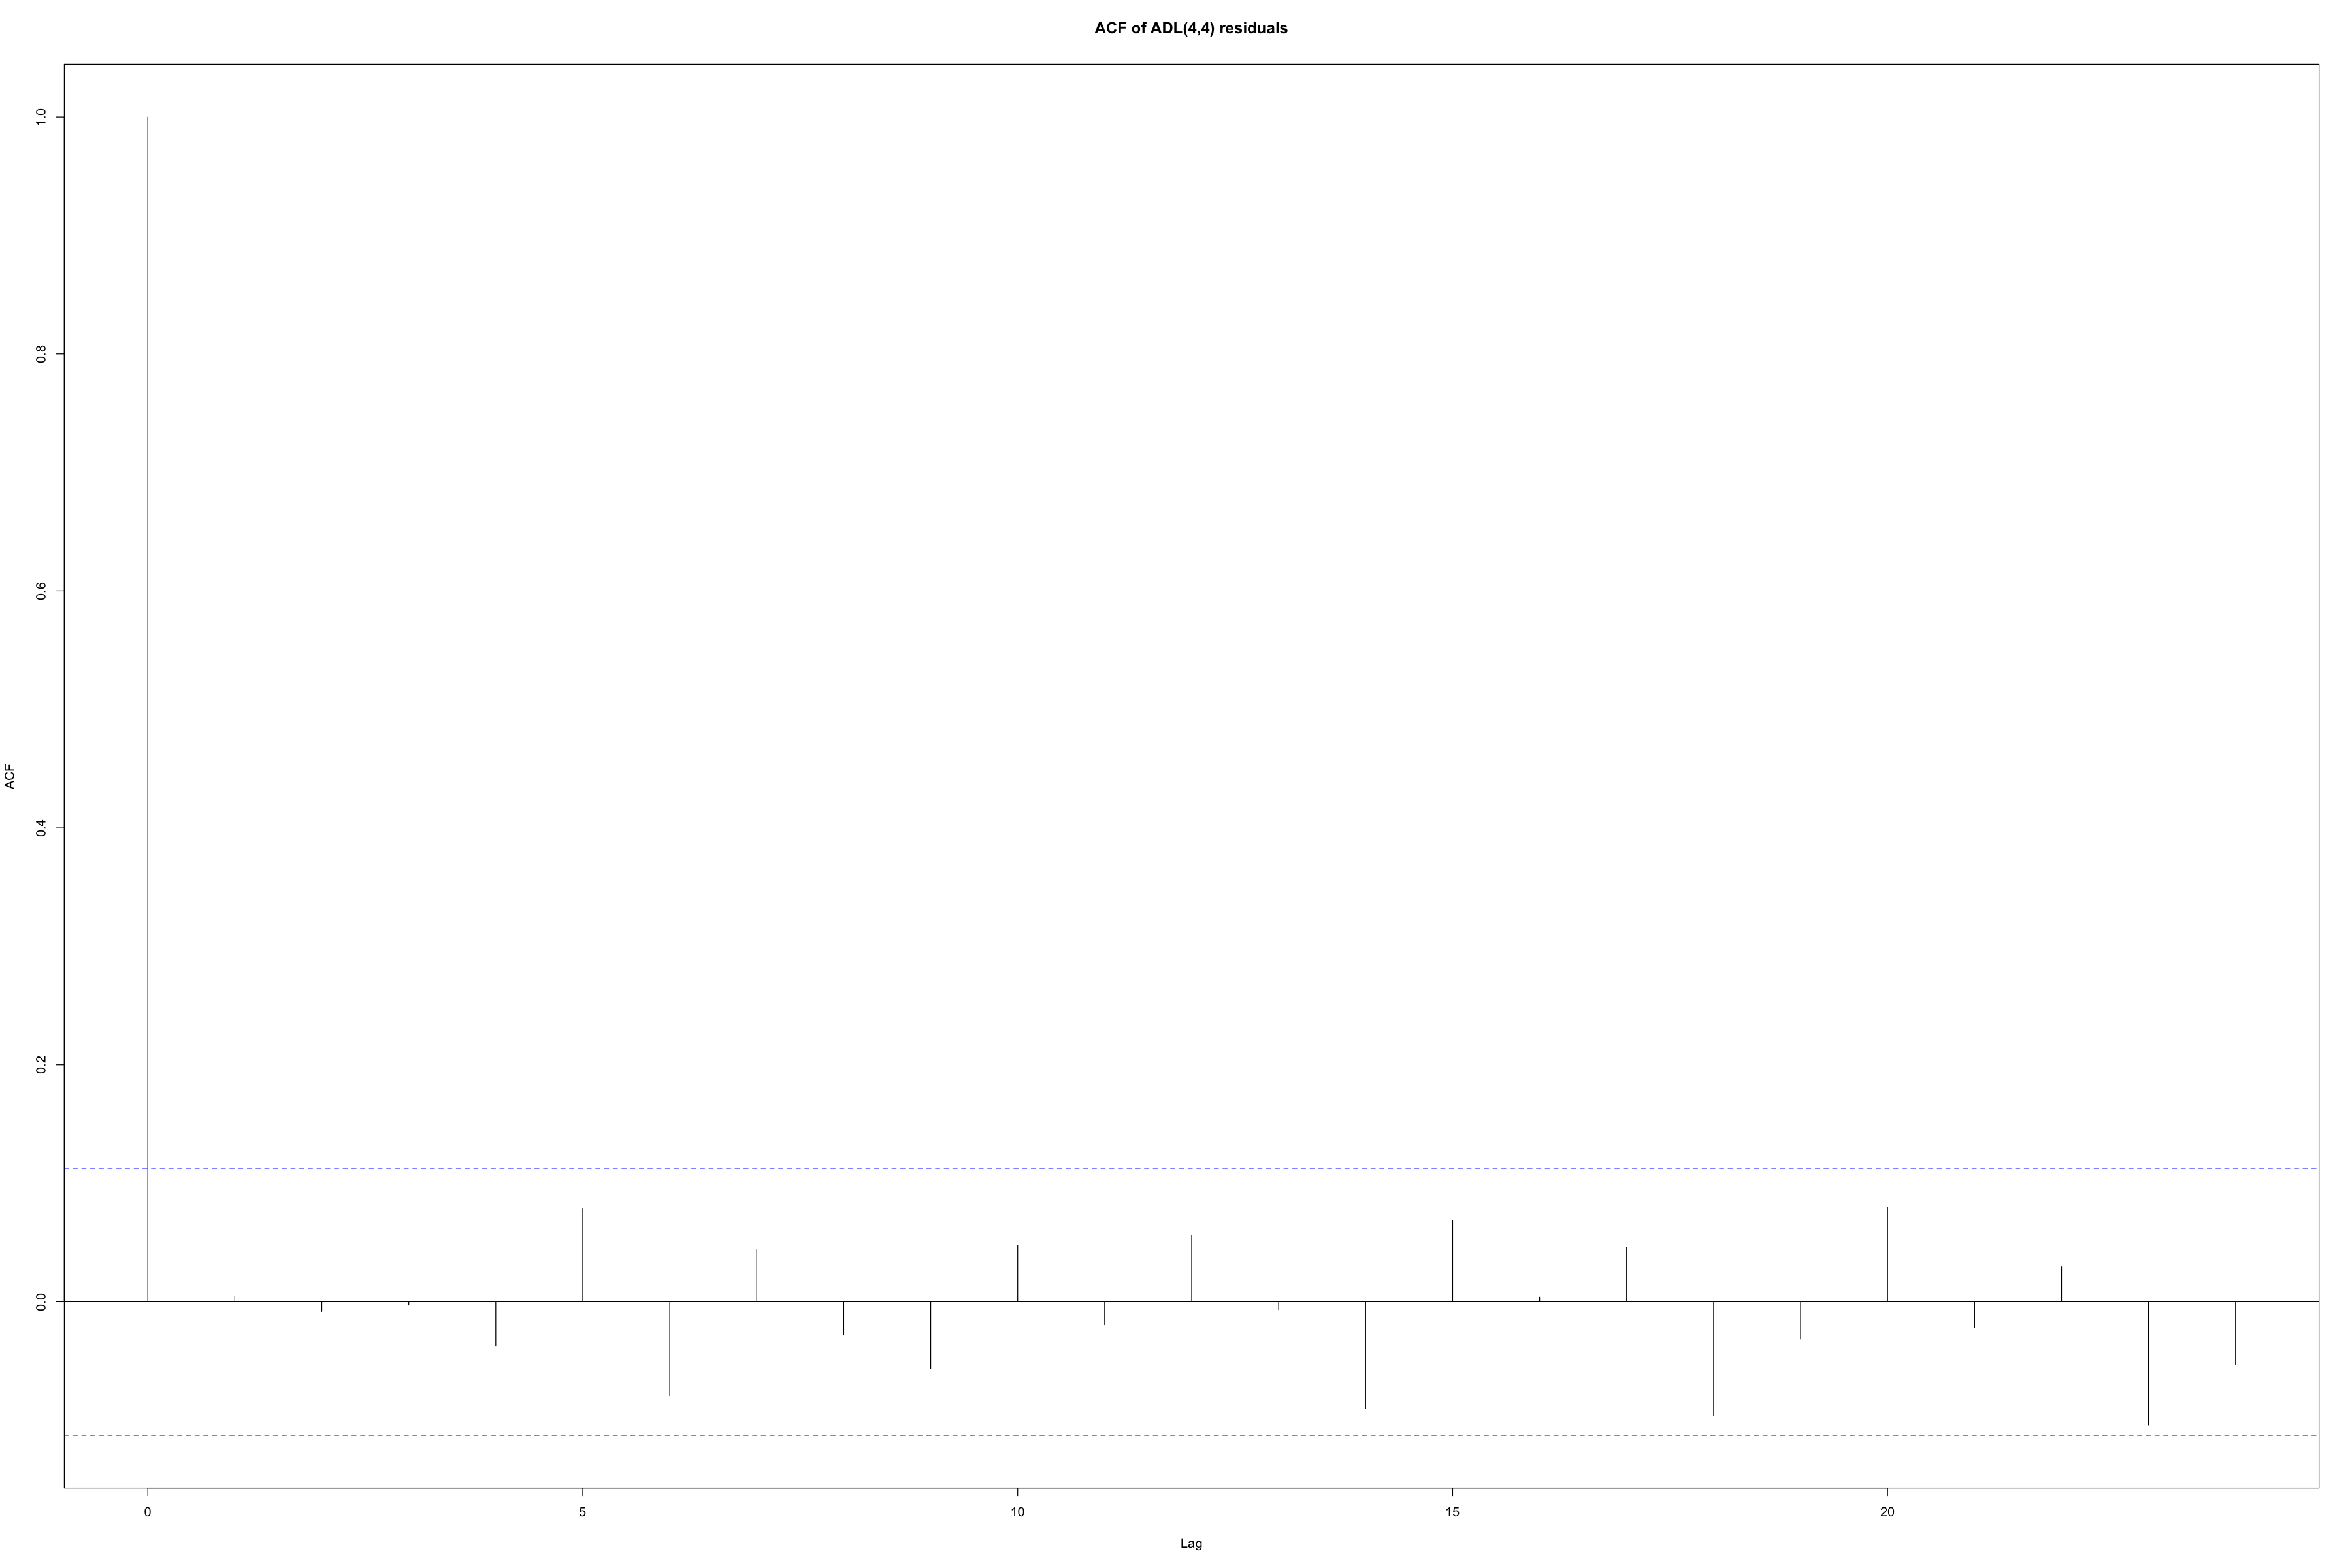

In [287]:
# Diagnostics: In-sample fitted values & residuals for ADL
adl_fitted   <- fitted(adl_model_44)
adl_resid    <- residuals(adl_model_44)

res <- zoo(adl_resid)
res_clean <- na.omit(as.numeric(res))
acf(res_clean, main = "ACF of ADL(4,4) residuals")

Good, all lags after 0 are small and stay inside the blue +-95 CI bands.

In [ ]:


## 5. OPTIONAL: simple in-sample accuracy comparison (NOT directly from lectures)
##    This uses forecast::accuracy() on the stationary target dBrent_log.
##    Marking this clearly as an extension beyond the slides.
# ---- NOT from lectures: extra accuracy comparison code ----
common_idx <- index(adl_xts)

# align ARIMA fitted values on same dates
dates_arima <- index(dBrent_log)
fitted_arima_xts <- xts(as.numeric(fitted(fit_uni)), order.by = dates_arima)
merged_fit <- na.omit(merge(
  Actual = adl_xts$dBrent_log,
  ADL    = xts(as.numeric(adl_fitted),   order.by = index(adl_fitted)),
  ARIMA  = fitted_arima_xts
))

acc_adl   <- accuracy(merged_fit$ADL,   merged_fit$Actual)
acc_arima <- accuracy(merged_fit$ARIMA, merged_fit$Actual)

acc_adl
acc_arima
# -----------------------------------------------------------

## 6. OPTIONAL: conditional 1-step-ahead forecast from ADL at the last date
##    This uses dynlm’s predict with the last observed lags.
##    Again, this is *not* coded explicitly in the lecture, so we flag it.
# ---- NOT from lectures: simple 1-step conditional forecast ----
# extract the last 5 observations to build lagged regressors manually
lag_k <- 4
last_block <- tail(adl_xts, lag_k + 1)  # last 5 obs

# Build a one-row data.frame with required lagged values:
# dynlm with L(y,1:4) and L(x,0:4) expects columns named as in the formula,
# so we construct a zoo/xts row with the appropriate lags.
newdata_1step <- zoo(
  data.frame(
    dBrent_log       = last_block$dBrent_log[lag_k + 1],            # y_t (for L(y,0) if needed)
    L.dBrent_log.1   = last_block$dBrent_log[lag_k],                # y_{t-1}
    L.dBrent_log.2   = last_block$dBrent_log[lag_k - 1],            # y_{t-2}
    L.dBrent_log.3   = last_block$dBrent_log[lag_k - 2],            # y_{t-3}
    L.dBrent_log.4   = last_block$dBrent_log[lag_k - 3],            # y_{t-4}
    L.dBDI_log.0     = last_block$dBDI_log[lag_k + 1],              # x_t
    L.dBDI_log.1     = last_block$dBDI_log[lag_k],                  # x_{t-1}
    L.dBDI_log.2     = last_block$dBDI_log[lag_k - 1],              # x_{t-2}
    L.dBDI_log.3     = last_block$dBDI_log[lag_k - 2],              # x_{t-3}
    L.dBDI_log.4     = last_block$dBDI_log[lag_k - 3]               # x_{t-4}
  ),
  order.by = index(last_block)[lag_k + 1]
)

# 1-step-ahead conditional forecast of dBrent_log (given last observed dBDI_log)
fc_adl_1step <- predict(adl_model_44, newdata = newdata_1step)
fc_adl_1step
# -----------------------------------------------------------

## Summary of how to use this in the report:
## - Use summary(adl_model_44) + IC_compare table to discuss:
##   * which lags of BDI matter for Brent returns
##   * whether ADL(4,4) improves AIC/BIC vs ARIMA benchmark
## - Quote AIC/BIC from IC_compare in the text.
## - If you want, mention that any extra accuracy / forecasting
##   comparisons (accuracy(), fc_adl_1step) are standard extensions
##   beyond what was implemented line-by-line in the lecture slides.


# VAR model

A VAR model is preferred when analyzing multiple interdependent time series, as it allows for feedback and mutual interactions among variables, unlike the single-equation ADL model.

We tested stationarity since it ensures that relationships between variables remain stable over time. Non-stationary data can lead to spurious results, so differencing or a VECM formulation is needed if variables are cointegrated.

In [ ]:
library(vars)

In [ ]:
# We align the series on a common monthly sample

var_xts <- na.omit(merge(
  dBrent_log,
  dOil_Stocks_log,
  dOPEC_log,
  dBDI_log,
  join = "inner"
))
colnames(var_xts) <- c(
  "dBrent_log",
  "dOilStocks_log",
  "dOPEC_log",
  "dBDI_log"
)

In [ ]:
start_year  <- as.numeric(format(start(var_xts), "%Y"))
start_month <- as.numeric(format(start(var_xts), "%m"))

cat(sprintf("Start of sample: %04d-%02d (%s %d)\n",
            start_year, start_month, month.name[start_month], start_year))

Start of sample: 2000-02 (February 2000)


In [ ]:
# convert to ts object with monthly frequency
var_ts <- ts(
  coredata(var_xts),
  start = c(start_year, start_month),
  frequency = 12
)

In [ ]:
head(var_ts)

dBrent_log  dOilStocks_log dOPEC_log    dBDI_log   
Feb 2000  0.08524581 -0.006439707    0.029577253  0.14904724
Mar 2000 -0.01049404 -0.003459225   -0.002475462  0.08089649
Apr 2000 -0.18881769  0.010456029    0.029984056 -0.01946533
May 2000  0.19787081  0.005068566    0.019043902 -0.03882767
Jun 2000  0.07163298  0.008112659   -0.015040613  0.03142936
Jul 2000 -0.03830838  0.015891403    0.012935399  0.01596105

In [ ]:
# Lag length selection

# we select a max lag of 12 months (1 year)
# the course material mentions "lag.max typically 6–12 for monthly data"
lag_sel <- VARselect(var_ts, lag.max = 12, type = "const") 
lag_sel$selection

# Pick the AIC-optimal lag order:
# p_opt <- lag_sel$selection["AIC(n)"]

AIC(n)  HQ(n)  SC(n) FPE(n) 
     4      2      1      4

Lag selection for the VAR was performed using the information criteria in `VARselect` with a maximum of 12 monthly lags. 

The results were mixed: AIC and FPE preferred the maximal specification (p = 12), HQ selected p = 2, while the Schwarz/BIC criterion selected p = 1. Because our sample contains only ~299 monthly observations and the VAR includes five variables, high-order VAR models would be heavily over-parameterized and prone to overfitting. Following standard practice in macroeconomic VAR analysis, we therefore adopt the more parsimonious specification p = 2, which balances the HQ recommendation with the strict penalization of BIC.


In [ ]:
p_opt <- 4

cat(sprintf("Optimal lag order (p_opt): %d\n", p_opt))

Optimal lag order (p_opt): 4


In [ ]:
# Estimate the VAR(p_opt) with constant (Lecture 6)

var_model <- VAR(
  y    = var_ts,
  p    = p_opt,
  type = "const"
)

summary(var_model)


VAR Estimation Results:
Endogenous variables: dBrent_log, dOilStocks_log, dOPEC_log, dBDI_log 
Deterministic variables: const 
Sample size: 302 
Log Likelihood: 2154.812 
Roots of the characteristic polynomial:
0.7155 0.7155 0.7095 0.7095 0.6437 0.6284 0.6284 0.6045 0.586 0.586 0.5365 0.5365 0.5242 0.5242 0.4975 0.4975
Call:
VAR(y = var_ts, p = p_opt, type = "const")


Estimation results for equation dBrent_log: 
dBrent_log = dBrent_log.l1 + dOilStocks_log.l1 + dOPEC_log.l1 + dBDI_log.l1 + dBrent_log.l2 + dOilStocks_log.l2 + dOPEC_log.l2 + dBDI_log.l2 + dBrent_log.l3 + dOilStocks_log.l3 + dOPEC_log.l3 + dBDI_log.l3 + dBrent_log.l4 + dOilStocks_log.l4 + dOPEC_log.l4 + dBDI_log.l4 + const 

                   Estimate Std. Error t value Pr(>|t|)    
dBrent_log.l1      0.250145   0.059388   4.212  3.4e-05 ***
dOilStocks_log.l1 -0.435797   0.723168  -0.603  0.54724    
dOPEC_log.l1       0.867844   0.318380   2.726  0.00681 ** 
dBDI_log.l1        0.059587   0.022311   2.671  0.00800 ** 
d

In [ ]:
# Basic diagnostics (serial correlation, ARCH, normality)

# Portmanteau test for residual autocorrelation
serial.test(var_model, lags.pt = 12, type = "PT.asymptotic")

# Test for ARCH in the residuals
arch.test(var_model, lags.multi = 5)

# Multivariate normality of residuals
normality.test(var_model)

# Stability (all roots inside unit circle)
roots(var_model)    # moduli should all be < 1


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 208.93, df = 128, p-value = 8.244e-06

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 208.93, df = 128, p-value = 8.244e-06




	ARCH (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 863.25, df = 500, p-value < 2.2e-16

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 863.25, df = 500, p-value < 2.2e-16



$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 749.8, df = 8, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 65.773, df = 4, p-value = 1.769e-13


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 684.03, df = 4, p-value < 2.2e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 749.8, df = 8, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 65.773, df = 4, p-value = 1.769e-13


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 684.03, df = 4, p-value < 2.2e-16




[1] 0.7155145 0.7155145 0.7095167 0.7095167 0.6437441 0.6284090 0.6284090
 [8] 0.6044601 0.5859653 0.5859653 0.5364688 0.5364688 0.5241542 0.5241542
[15] 0.4974660 0.4974660

In [ ]:
# 1–4 step-ahead forecasts for the VAR (Lecture 6)

h <- 4
var_fc <- predict(var_model, n.ahead = h, ci = 0.95)

# Forecasts for dBrent_log (log-returns)
fc_dBrent_log <- var_fc$fcst[["dBrent_log"]][, "fcst"]
fc_dBrent_log


[1] -0.014999904  0.002259038  0.013826816 -0.001826438

In [ ]:
# Transform these forecasts back to Brent price level
# not in the lectures

last_price <- as.numeric(last(Brent))  # last observed Brent price

# Cumulate forecasted log-returns and exponentiate
fc_prices <- last_price * exp(cumsum(fc_dBrent_log))
fc_prices  # 4-month ahead price forecasts

## 8. Plot: actual Brent level vs VAR-based price forecast path

# Build a small time index for the forecast horizon
last_date <- as.yearmon(index(last(Brent)))
fc_dates  <- seq(last_date + 1/12, by = 1/12, length.out = h)

plot_df <- data.frame(
  Date     = c(index(Brent), fc_dates),
  Brent    = c(as.numeric(Brent), rep(NA, h)),
  FcPrice  = c(rep(NA, length(Brent)), fc_prices)
)

[1] 69.98236 70.14063 71.11719 70.98742

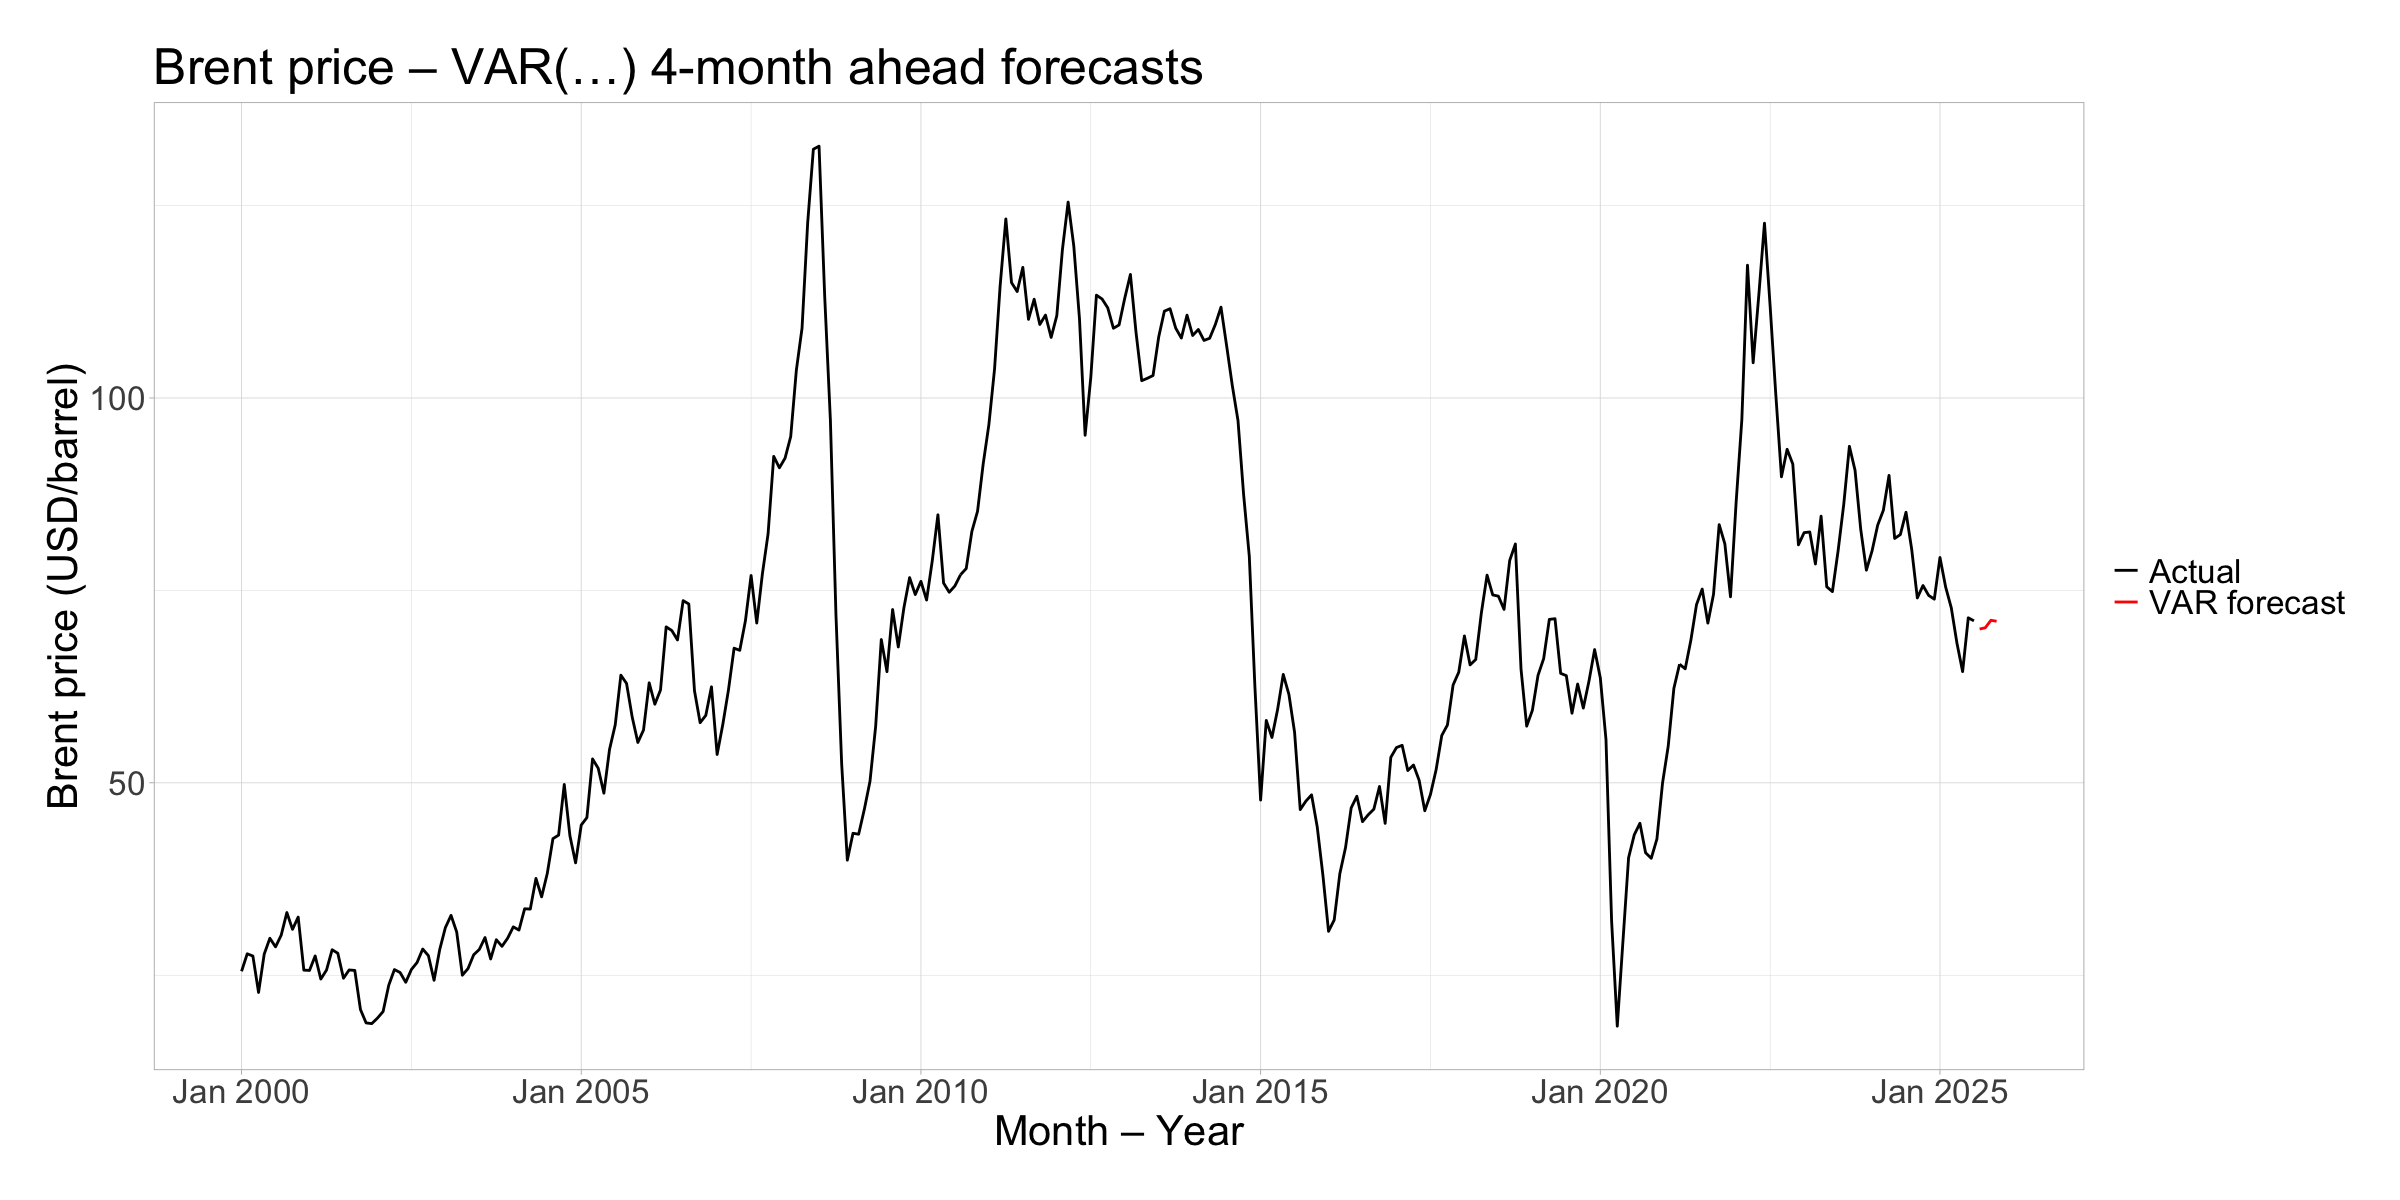

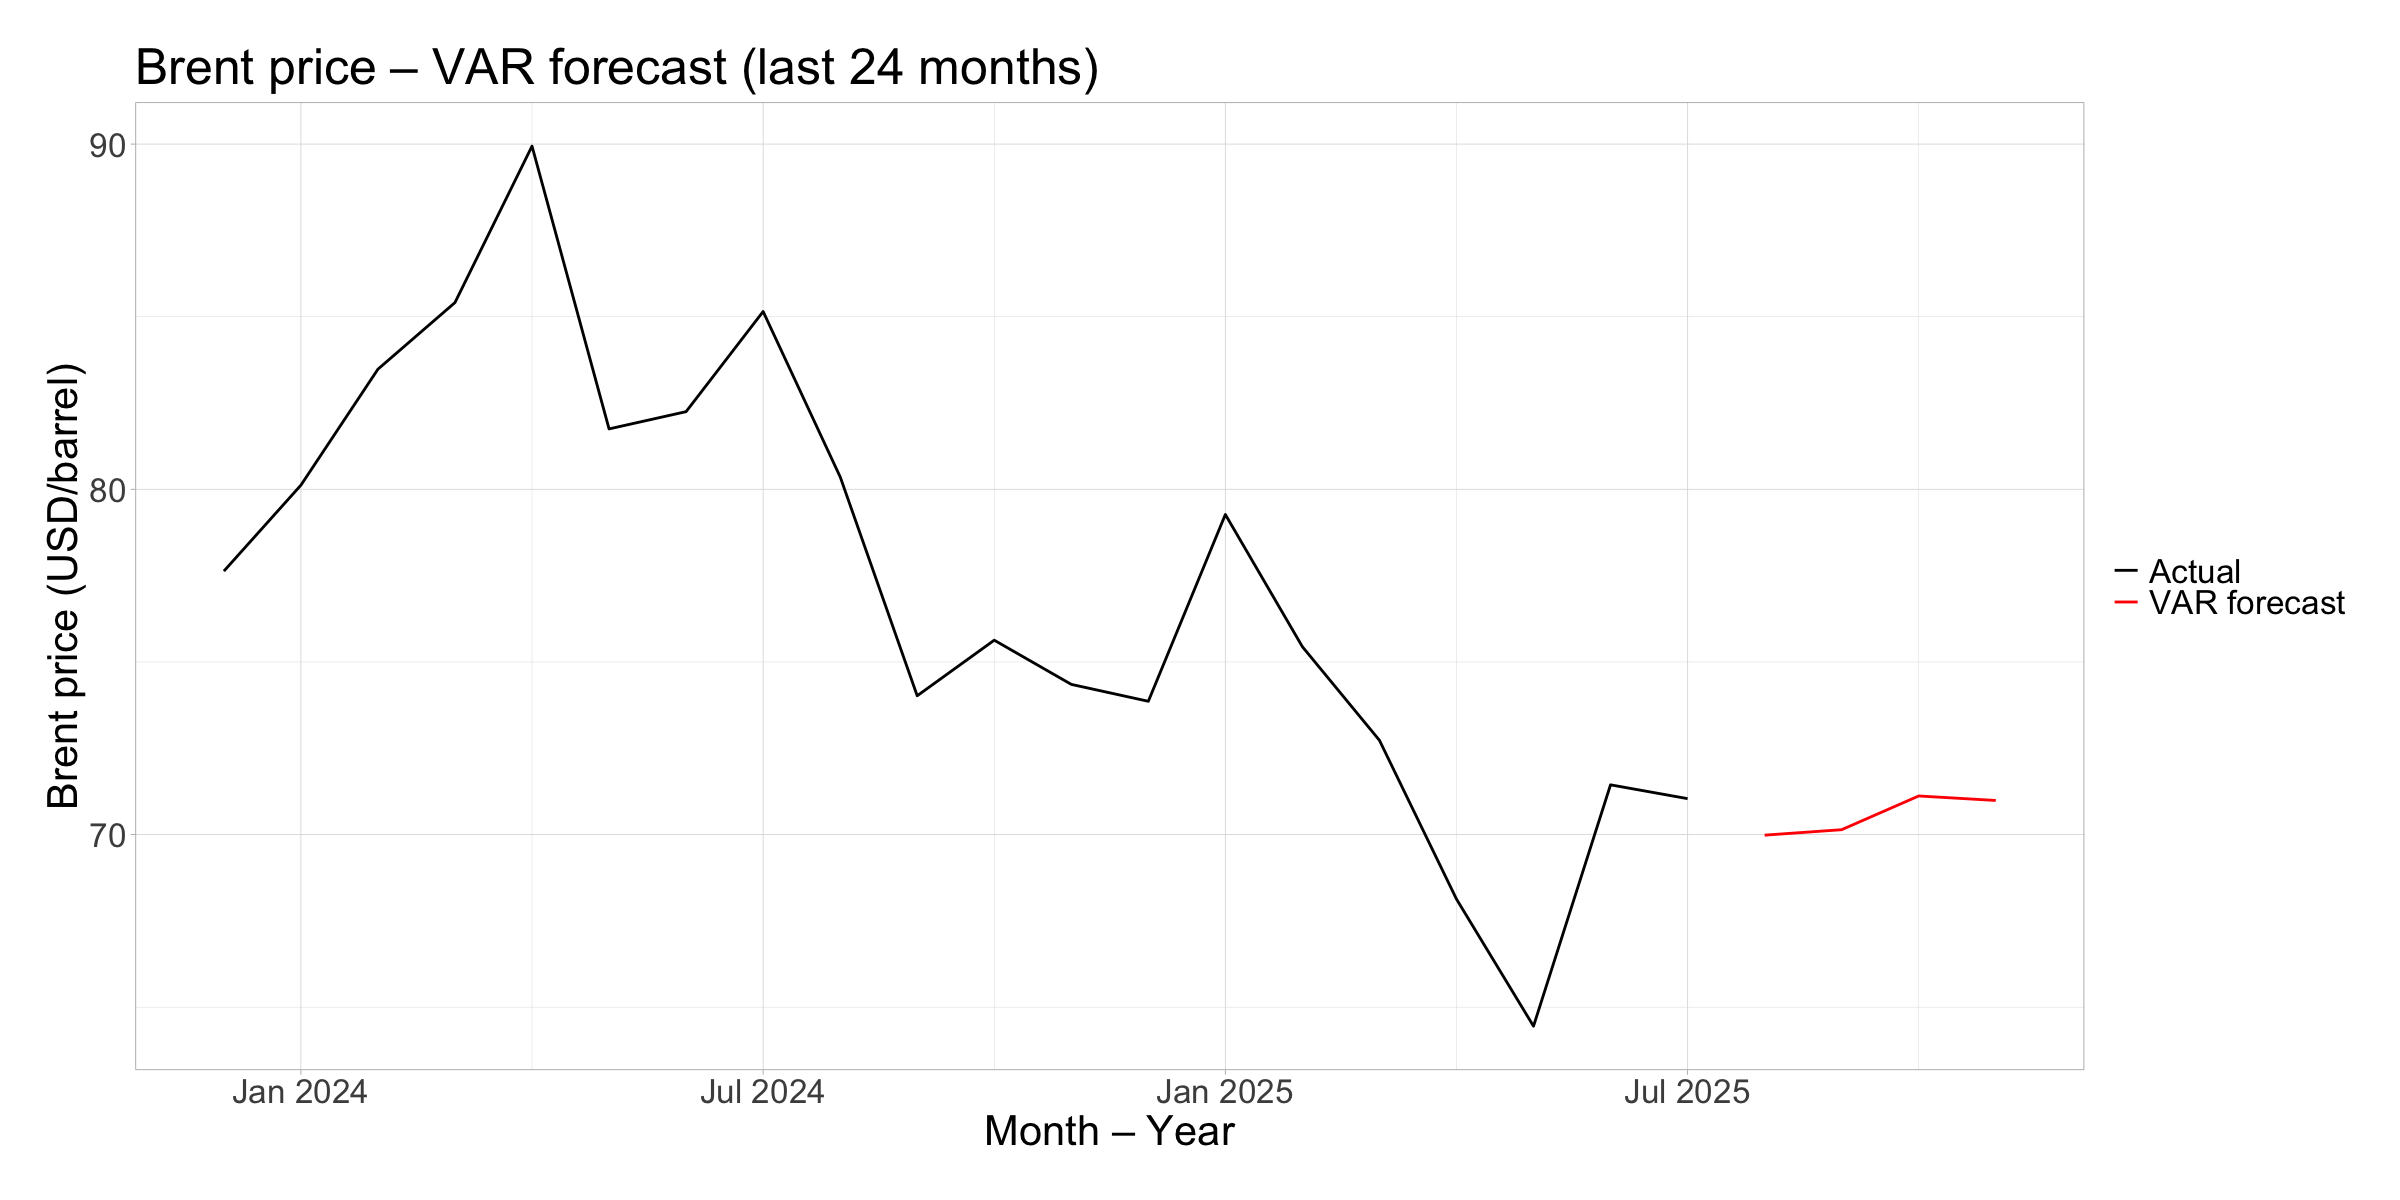

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(plot_df, aes(x = Date)) +
  geom_line(aes(y = Brent,   colour = "Actual"), linewidth = 0.8) +
  geom_line(aes(y = FcPrice, colour = "VAR forecast"), linewidth = 0.8) +
  scale_colour_manual(values = c("Actual" = "black", "VAR forecast" = "red")) +
  theme_light() +
  theme(
    plot.margin = ggplot2::margin(1, 1, 1, 1, "cm"),
    text = element_text(size = 25),
    legend.title = element_blank()
  ) +
  labs(
    title = "Brent price – VAR(…) 4-month ahead forecasts",
    x = "Month – Year",
    y = "Brent price (USD/barrel)"
)


# keep only the last 24 rows (history + forecast)
plot_df_zoom <- tail(plot_df, 24)

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(plot_df_zoom, aes(x = Date)) +
  geom_line(aes(y = Brent,   colour = "Actual"), linewidth = 0.8) +
  geom_line(aes(y = FcPrice, colour = "VAR forecast"), linewidth = 0.8) +
  scale_colour_manual(values = c("Actual" = "black", "VAR forecast" = "red")) +
  theme_light() +
  theme(
    plot.margin = ggplot2::margin(1, 1, 1, 1, "cm"),
    text = element_text(size = 25),
    legend.title = element_blank()
  ) +
  labs(
    title = "Brent price – VAR forecast (last 24 months)",
    x = "Month – Year",
    y = "Brent price (USD/barrel)"
  )


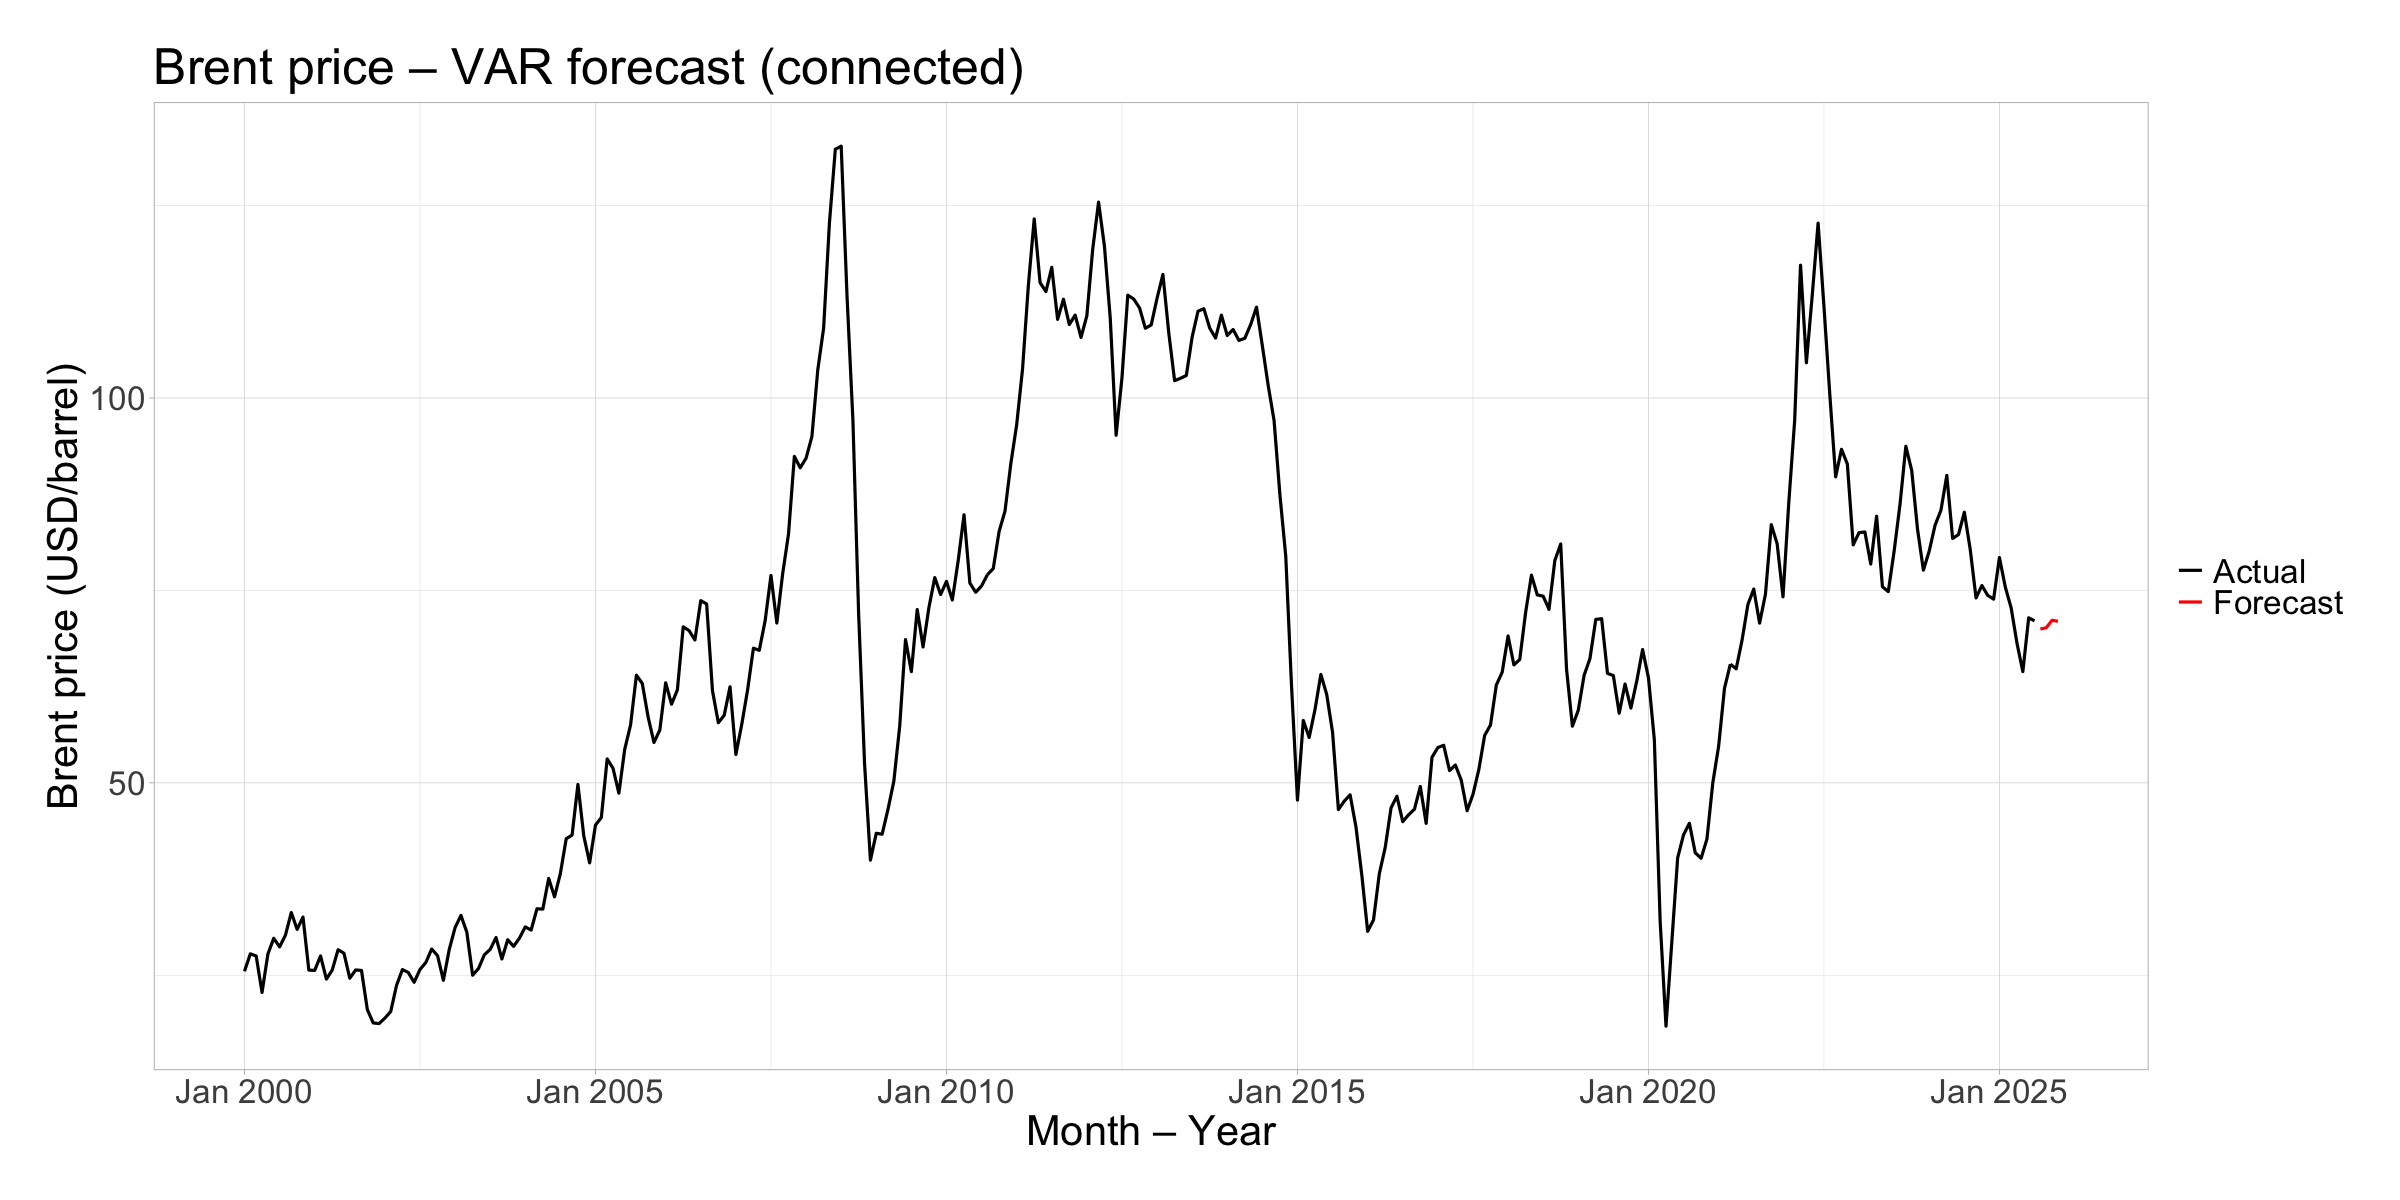

In [ ]:
# Build one continuous series (Actual + Forecast)
comb <- data.frame(
  Date  = c(index(Brent), fc_dates),
  Price = c(as.numeric(Brent), fc_prices),
  Type  = c(rep("Actual", length(Brent)),
            rep("Forecast", length(fc_prices)))
)

options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(comb, aes(x = Date, y = Price)) +
  geom_line(aes(colour = Type), linewidth = 0.9) +
  scale_colour_manual(
    values = c("Actual" = "black", "Forecast" = "red")
  ) +
  theme_light() +
  theme(
    text = element_text(size = 25),
    plot.margin = ggplot2::margin(1,1,1,1,"cm"),
    legend.title = element_blank()
  ) +
  labs(
    title = "Brent price – VAR forecast (connected)",
    x = "Month – Year",
    y = "Brent price (USD/barrel)"
  )


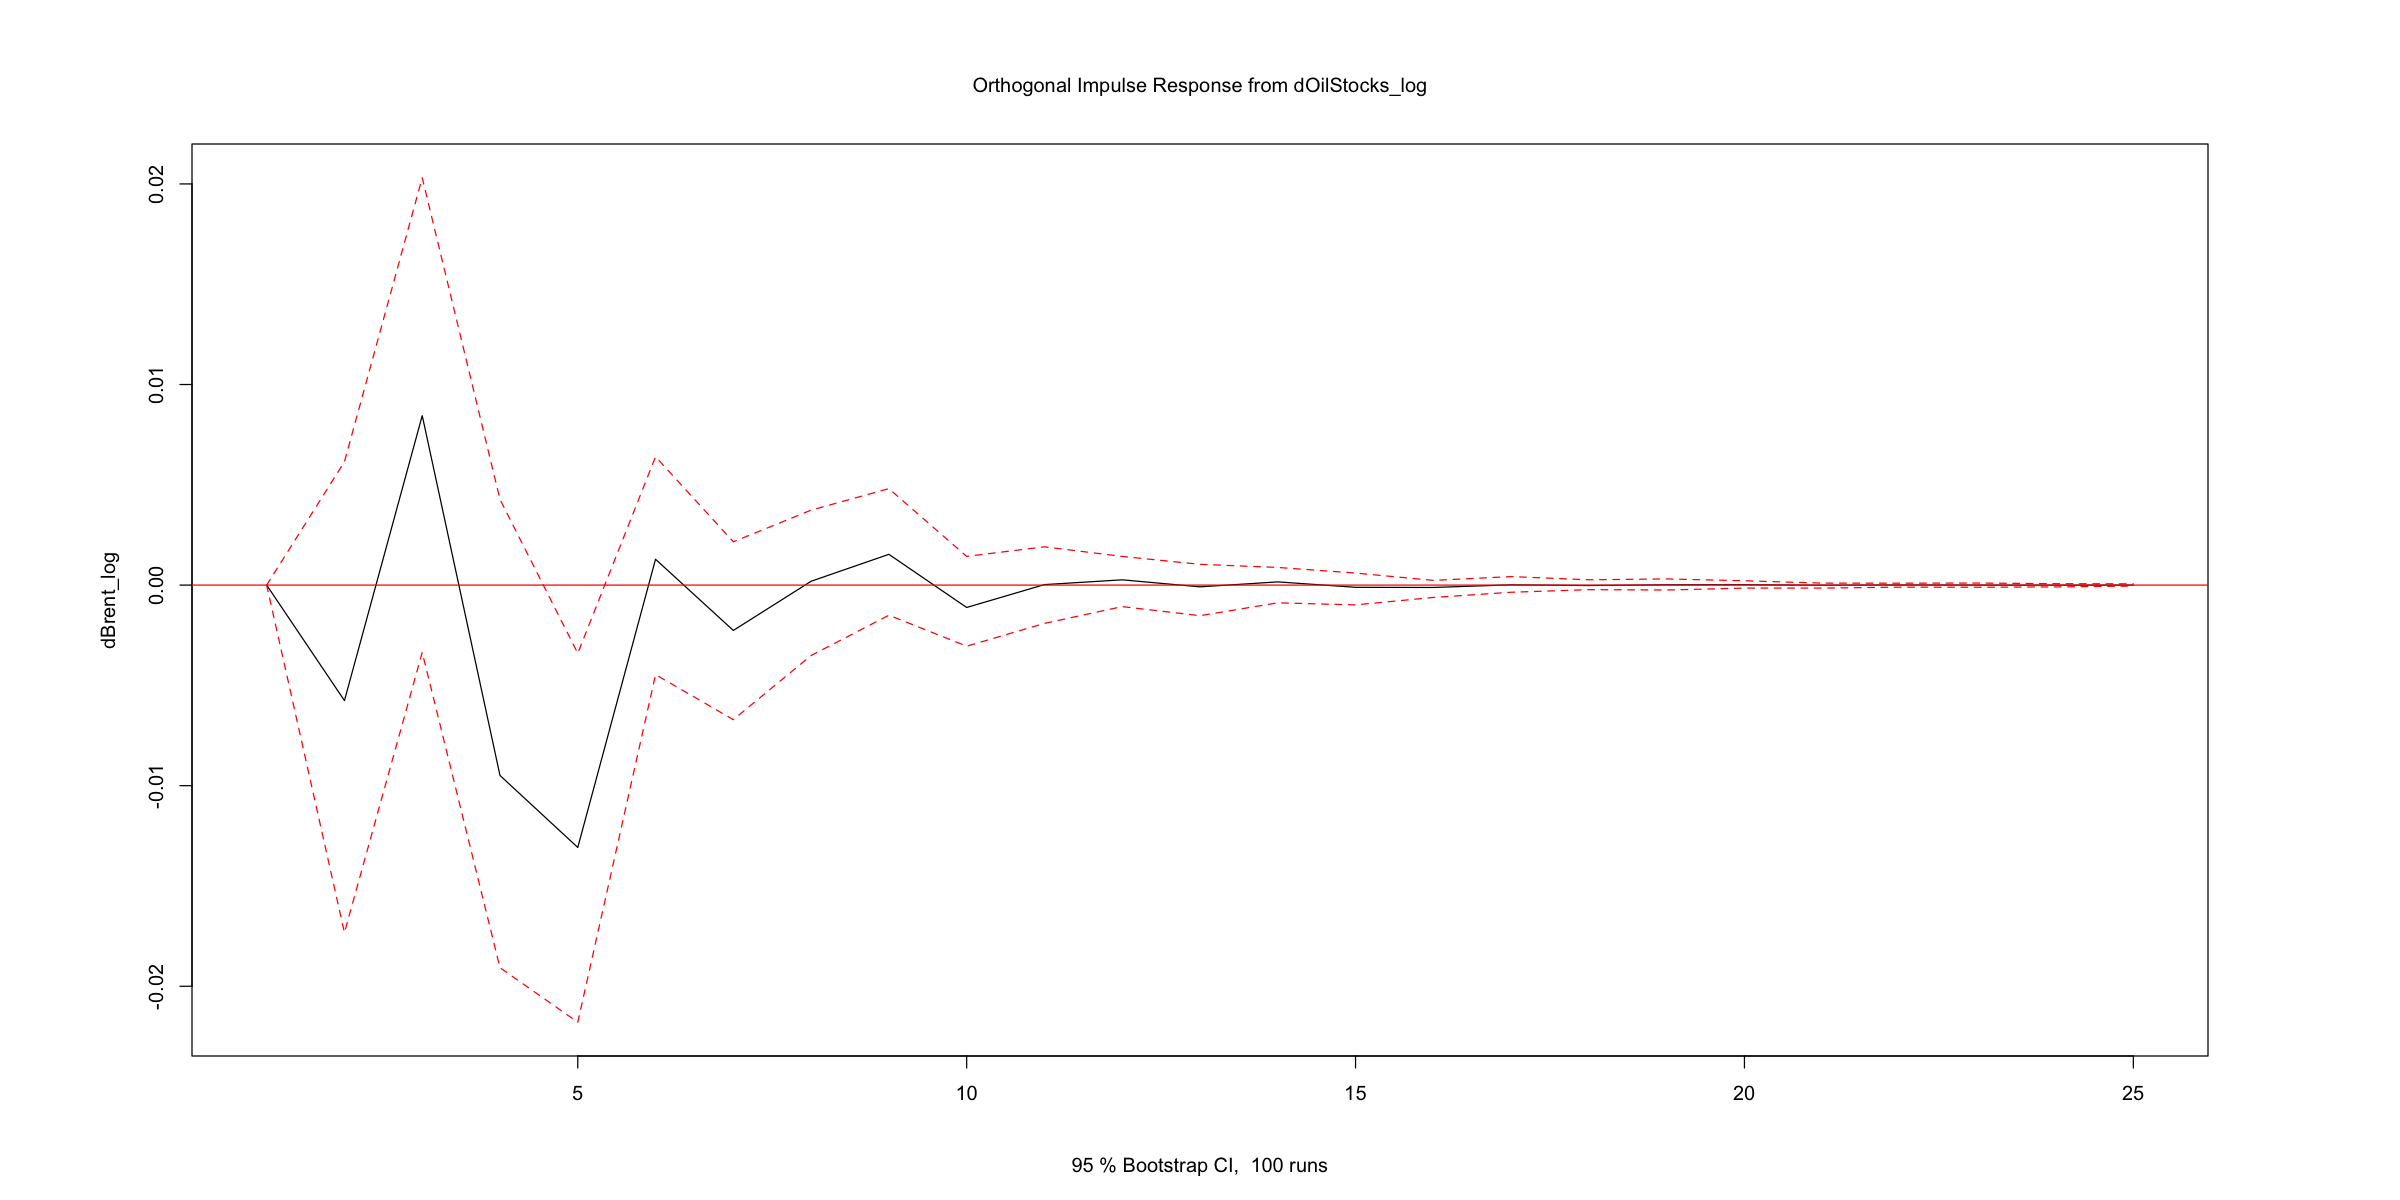

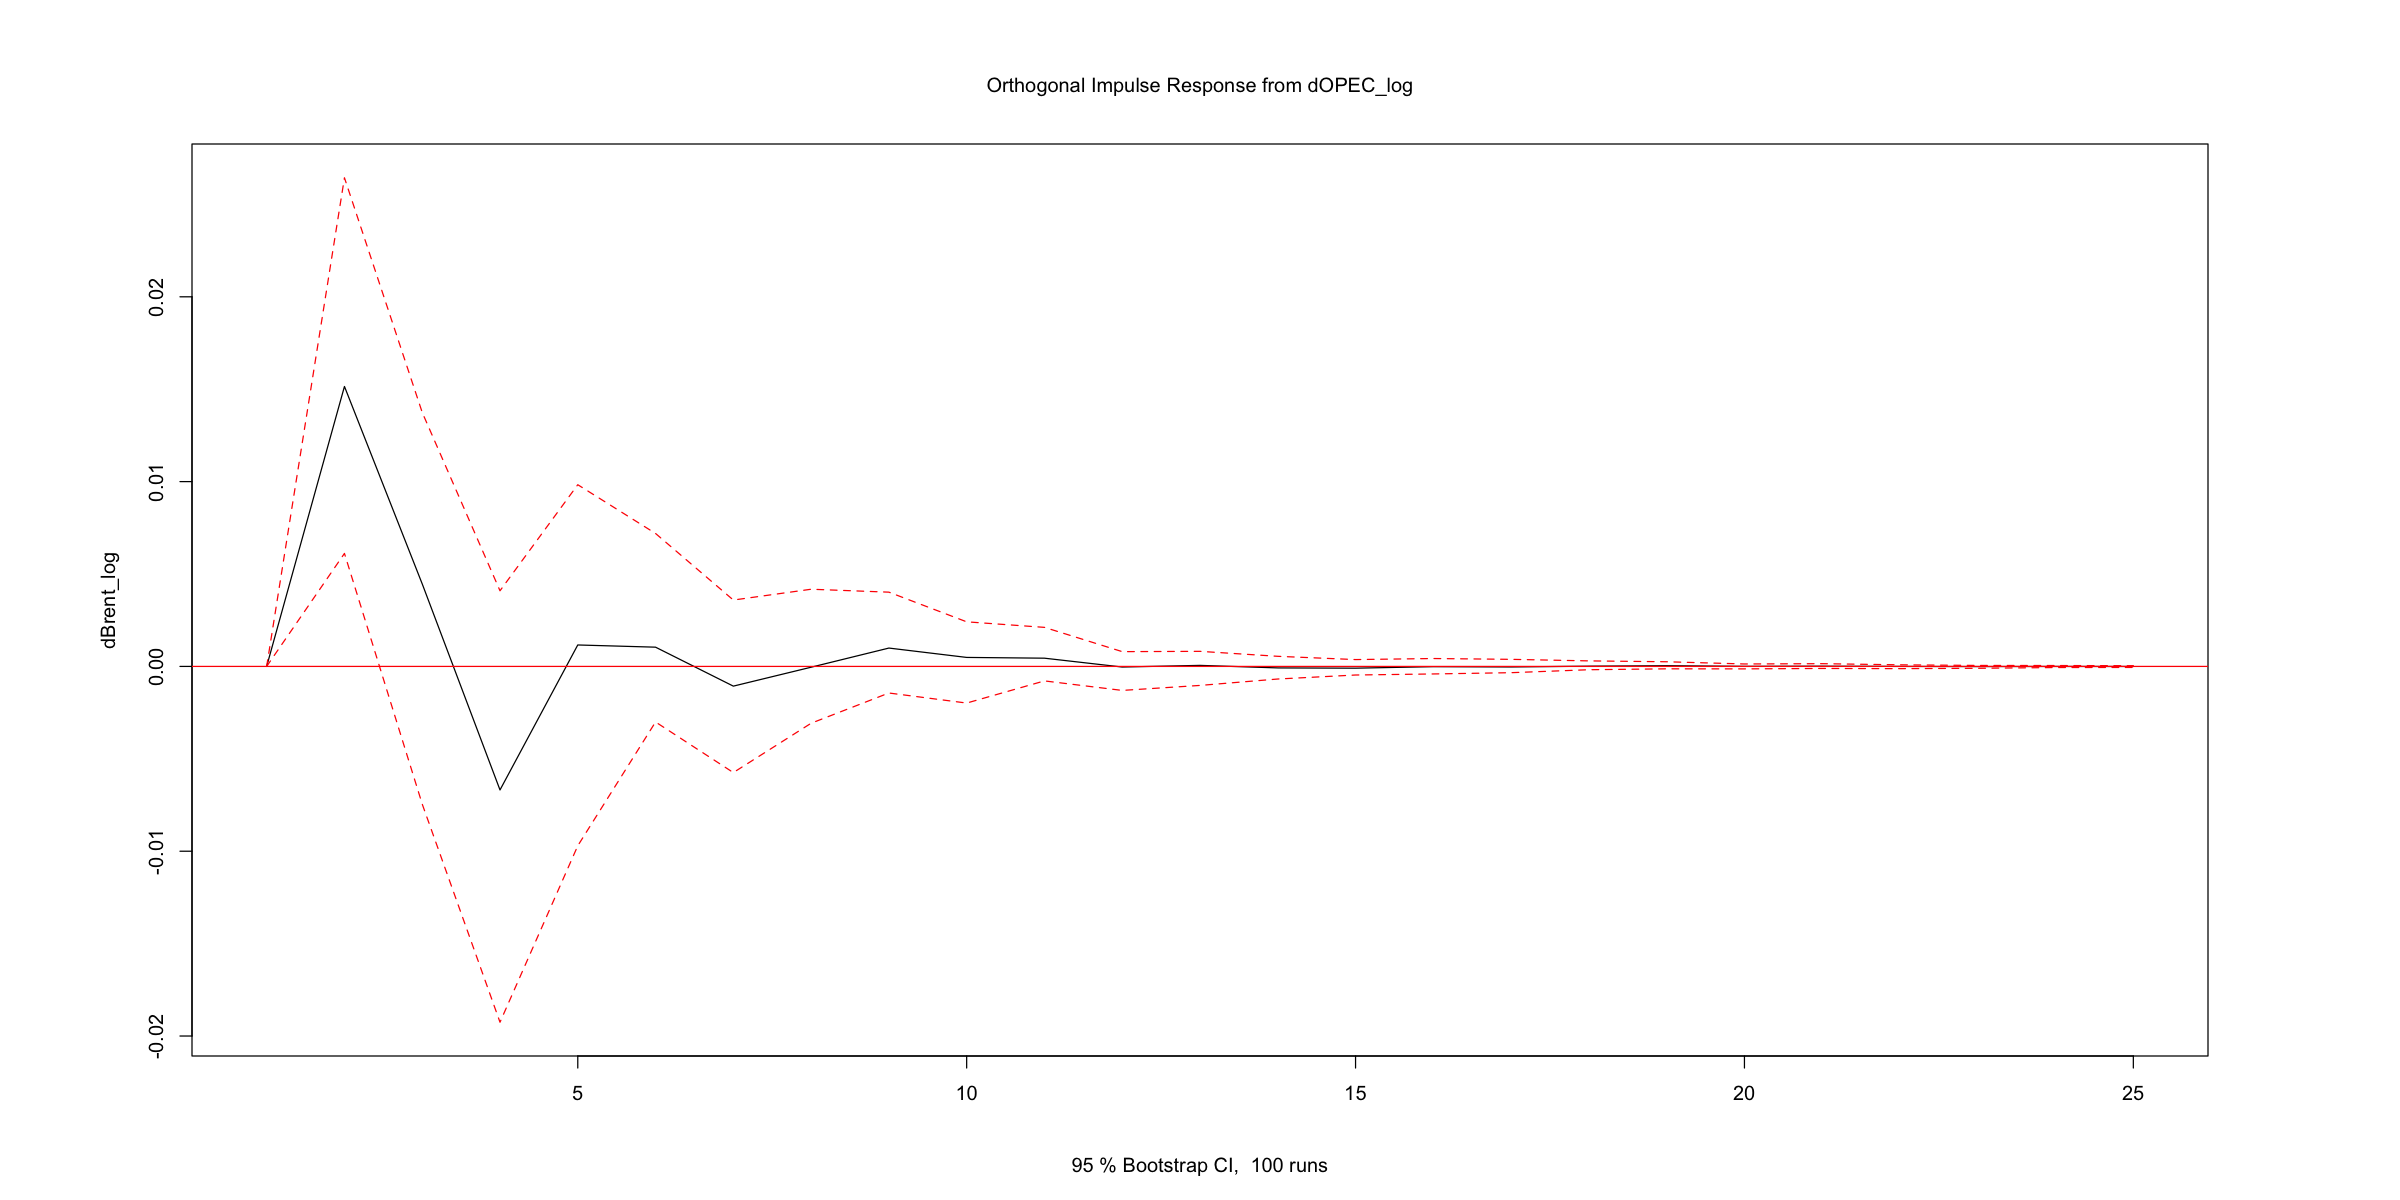

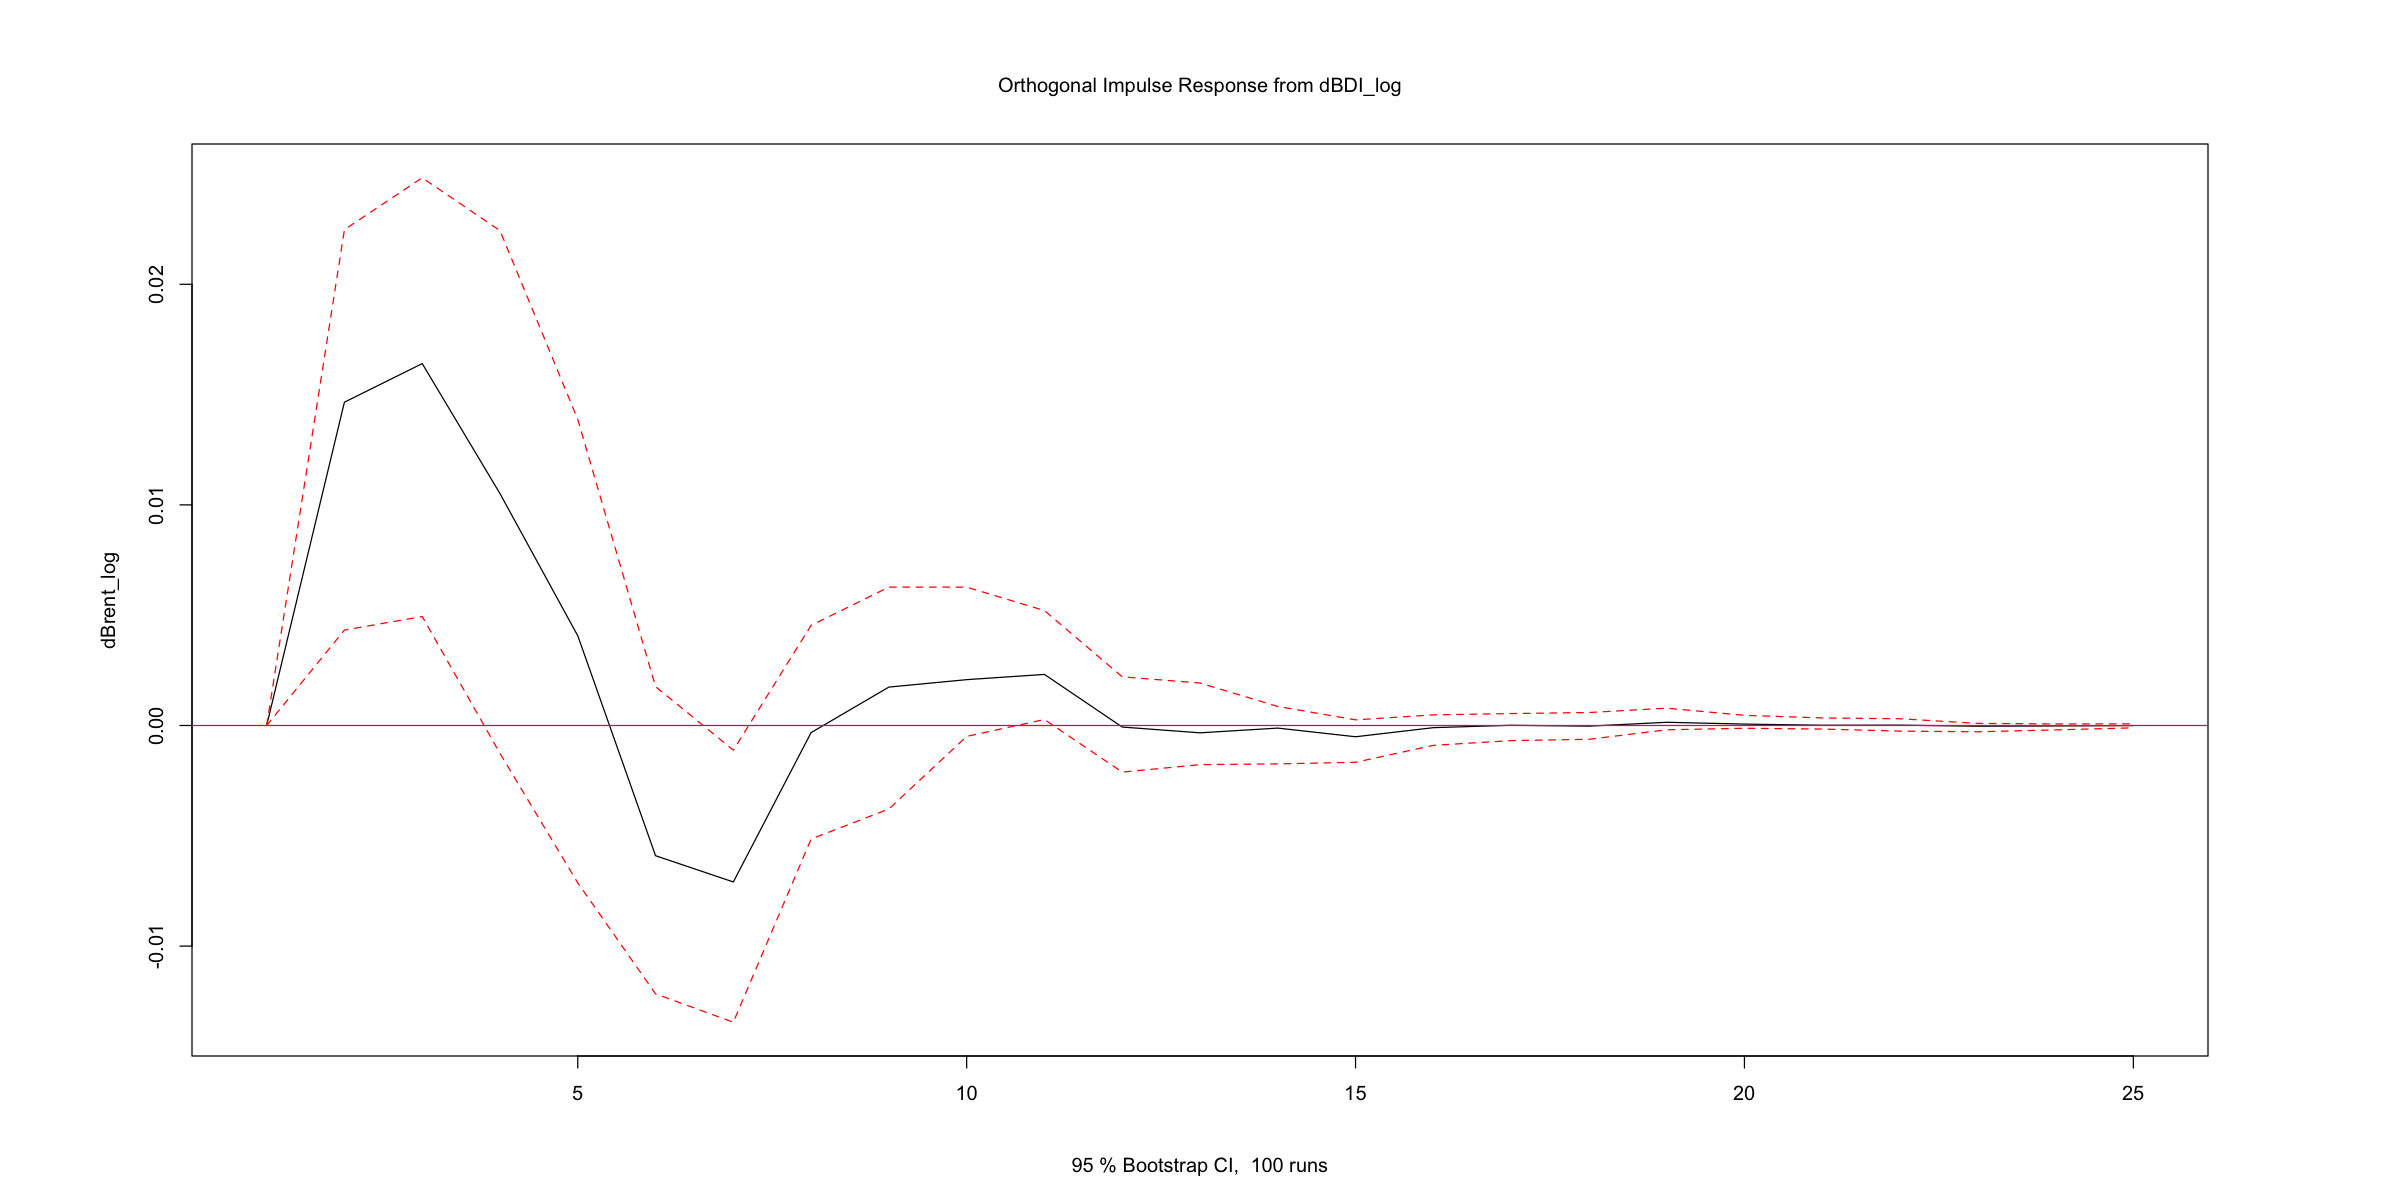

In [ ]:
# Impulse Response Functions (IRF) for the VAR
irf_res <- irf(
  var_model,
  impulse = c("dOPEC_log", "dBDI_log", "dOilStocks_log"),
  response = "dBrent_log",
  n.ahead = 24,
  boot = TRUE,
  ci = 0.95
)
plot(irf_res)
